### 구글 Colab 서버 세팅

In [1]:
# Colab 사양 : Ubuntu 17, CPU 인텔제논 2.2기가 듀얼코어, 메모리 13기가, GPU nvidia-smi

print('===== OS =====')
!cat /etc/issue.net

print('===== CPU =====')
!cat /proc/cpuinfo

print('===== Memory =====')
!cat /proc/meminfo

print('===== Disk =====')
!df -h

print('===== GPU =====')
!nvidia-smi

===== OS =====
Ubuntu 18.04.1 LTS
===== CPU =====
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu fam

In [0]:
import numpy as np
import pandas as pd

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

## 나눔고딕 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

# 한글 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# 나눔 고딕으로 설정을 바꾼다
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨질 경우 대비

!pip3 install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)  # seaborn 최신버전 깔자(기본 설치버전은 0.7)

plt.style.use('ggplot')  # 차트스타일은 원하는 걸로, 난 ggplot

나의 구글 드라이브와 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

---
### Kaggle 스터디 | 산탄데르 은행 금융상품 추천 경진대회

**대회개요 **  
주최자 : 산단데르 은행  
총상금 : $60,000  
문제유형 : Multi-class classification  
평가척도 : Mean-Average Precision @7 https://www.kaggle.com/c/santander-product-recommendation#evaluation  
대회기간 : '16.10.27 ~ '16.12.22(총 66일)  
대회참여자 : 1,787팀  
안내페이지 : https://www.kaggle.com/c/santander-product-recommendation

캐글 제출양식 : 고객번호별 7개 금융상품 추천
<img src='images/result_sample.jpg' style="float:left;width:800px">

### 탐색적 데이터 분석(EDA)

훈련 데이터를 읽는다. 

In [0]:
trn = pd.read_csv('/content/gdrive/My Drive/kaggle/santander/train_ver2.csv')

#### 변수 목록 예시

<img src="images/features.jpg">

In [5]:
# 데이터 건수 확인
trn.shape

(13647309, 48)

In [6]:
trn.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


저자의 데이터 분석노트는 꼭 참조하자~! 

<img src="images/data_note.jpg">

In [6]:
# head()나 tail()은 결과 일부가 '...'으로 생략되므로, 모든 변수를 보고 싶으면
# 컬럼순서 24번까지는 고객정보, 25번부터는 금융상품가입정보(타겟변수, 가공 필요)
for i, col in enumerate(trn.columns):
    print('#{0}:{1}\n'.format(i, trn[col].head()))  

#0:0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

#1:0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

#2:0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

#3:0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

#4:0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

#5:0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

#6:0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

#7:0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

#8:0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

#9:0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

#10:0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

#11:0    1
1    1
2    1
3    1

In [7]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

---

#### 수치형 변수 / 범주형 변수

수치형 변수

In [8]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


텍스트 변수

In [9]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [10]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(col), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 10, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 12, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 15, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

In [0]:
# 1차원 : 텍스트형 건수 집계(고객정보)
cust_features = trn.columns.tolist()[:24]  # 고객 피처
prod_features = trn.columns.tolist()[24:]  # 상품 피처
remove_features = ['ncodpers', 'age', 'renta', 'ult_fec_cli_1t', 'antiguedad'] # 분석 제외

cust_features = [x for x in cust_features if x not in remove_features]
prod_features = [x for x in prod_features if x not in remove_features]

In [0]:
# 집계 함수
def value_counts_add_percent(ser):
    df = pd.DataFrame({'count':ser.value_counts(dropna=False),
                     'percent':ser.value_counts(dropna=False) / len(ser) * 100})
    return df

In [60]:
# 고객피처
for col in cust_features:
    print('-'*50)
    result = value_counts_add_percent(trn[col])
    print('# col {}, \n{}'.format(col, result))

--------------------------------------------------
# col fecha_dato, 
             count   percent
2016-05-28  931453  6.825177
2016-04-28  928274  6.801883
2016-03-28  925076  6.778450
2016-02-28  920904  6.747880
2016-01-28  916269  6.713917
2015-12-28  912021  6.682790
2015-11-28  906109  6.639470
2015-10-28  892251  6.537926
2015-09-28  865440  6.341470
2015-08-28  843201  6.178515
2015-07-28  829817  6.080444
2015-06-28  632110  4.631756
2015-05-28  631957  4.630635
2015-04-28  630367  4.618984
2015-03-28  629209  4.610499
2015-02-28  627394  4.597199
2015-01-28  625457  4.583006
--------------------------------------------------
# col ind_empleado, 
        count    percent
N    13610977  99.733779
NaN     27734   0.203220
B        3566   0.026130
F        2523   0.018487
A        2492   0.018260
S          17   0.000125
--------------------------------------------------
# col pais_residencia, 
        count    percent
ES   13553710  99.314158
NaN     27734   0.203220
FR       51

In [0]:
prod_percents = []
for col in prod_features:
    prod_percents.append( sum(trn[col] == 1) / len(trn))

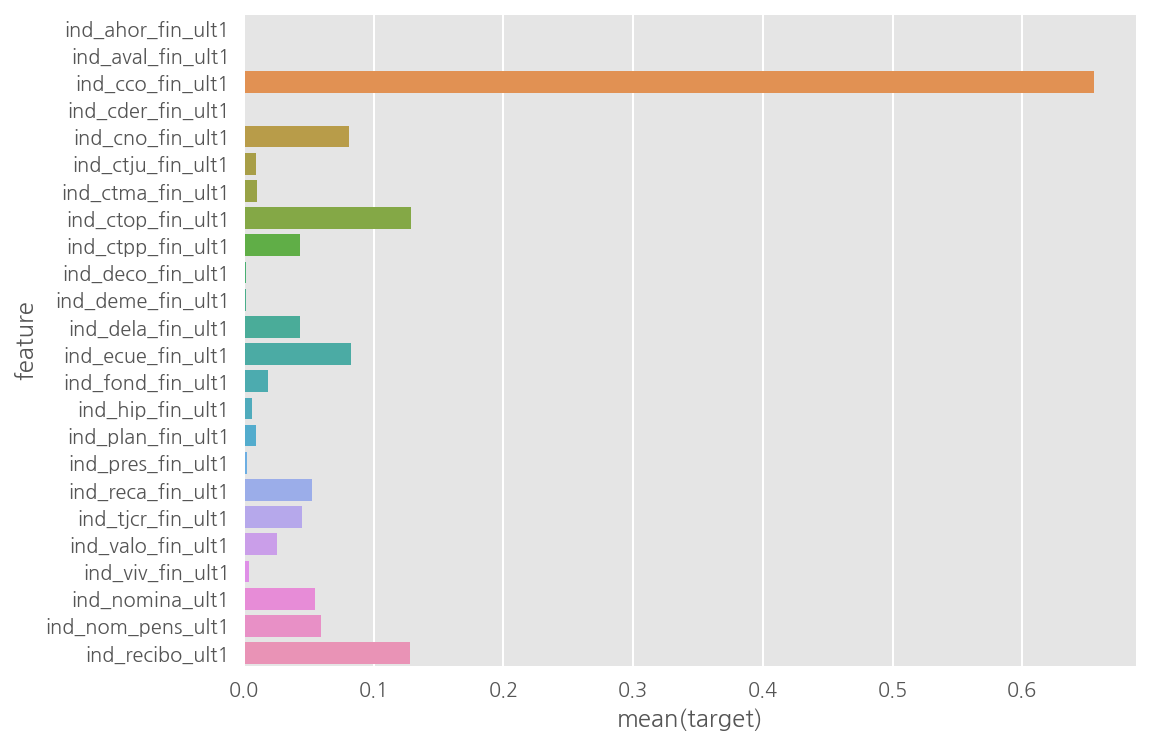

In [14]:
prod_df = pd.DataFrame({'feature':prod_features,
                        'target':prod_percents})

plt.figure(figsize=(8,6))
sns.barplot(x='target', y='feature', data=prod_df)

In [15]:
# 상품피처
for col in prod_features:
    print('-'*50)
    result = value_counts_add_percent(trn[col])
    print('# col {}, \n{}'.format(col, result))

--------------------------------------------------
# col ind_ahor_fin_ult1, 
      count    percent
0  13645913  99.989771
1      1396   0.010229
--------------------------------------------------
# col ind_aval_fin_ult1, 
      count    percent
0  13646993  99.997685
1       316   0.002315
--------------------------------------------------
# col ind_cco_fin_ult1, 
     count    percent
1  8945588  65.548366
0  4701721  34.451634
--------------------------------------------------
# col ind_cder_fin_ult1, 
      count    percent
0  13641933  99.960608
1      5376   0.039392
--------------------------------------------------
# col ind_cno_fin_ult1, 
      count    percent
0  12543689  91.913278
1   1103620   8.086722
--------------------------------------------------
# col ind_ctju_fin_ult1, 
      count    percent
0  13518012  99.052582
1    129297   0.947418
--------------------------------------------------
# col ind_ctma_fin_ult1, 
      count    percent
0  13514567  99.027339
1    1

In [0]:
# 수치형 변수의 특이값과 결측값을 -99로 대체하고, 정수형으로 변환한다.
age_ser = trn['age'].sample(n=10000).replace(' NA', -99)
age_ser = age_ser.astype(np.int8) 
age_ser = age_ser[ age_ser > 0]   # NA는 그래프에서 지우자

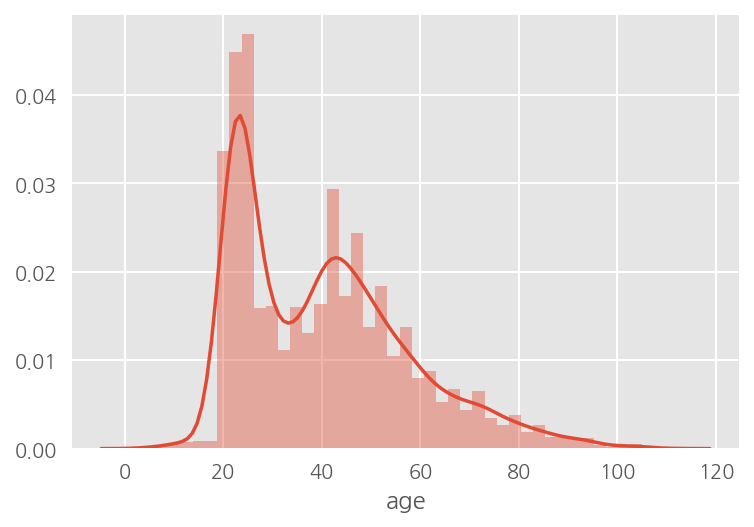

In [17]:
# 분포 확인 : 오래걸리니 1만개 샘플링
sns.distplot(age_ser)

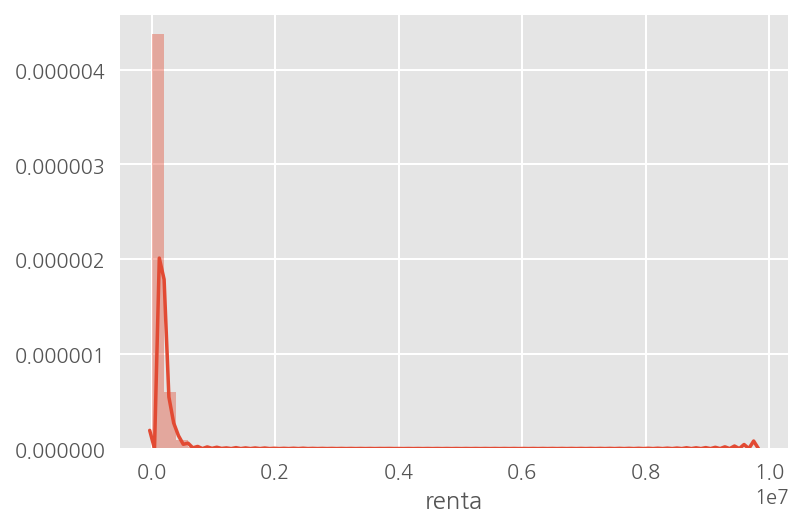

In [18]:
sns.distplot(trn['renta'].sample(n=10000).dropna())

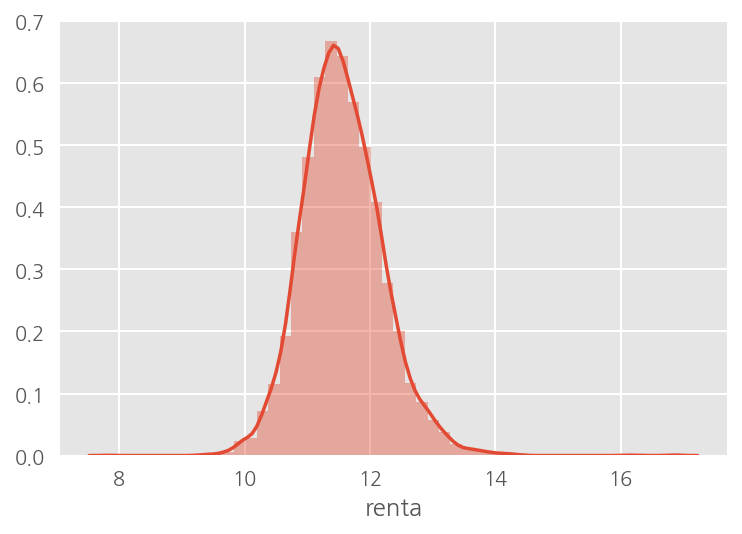

In [19]:
sns.distplot(np.log(trn['renta'].sample(n=10000).dropna()))

변수를 시각화 표현

--------------------------------------------------
col :  fecha_dato


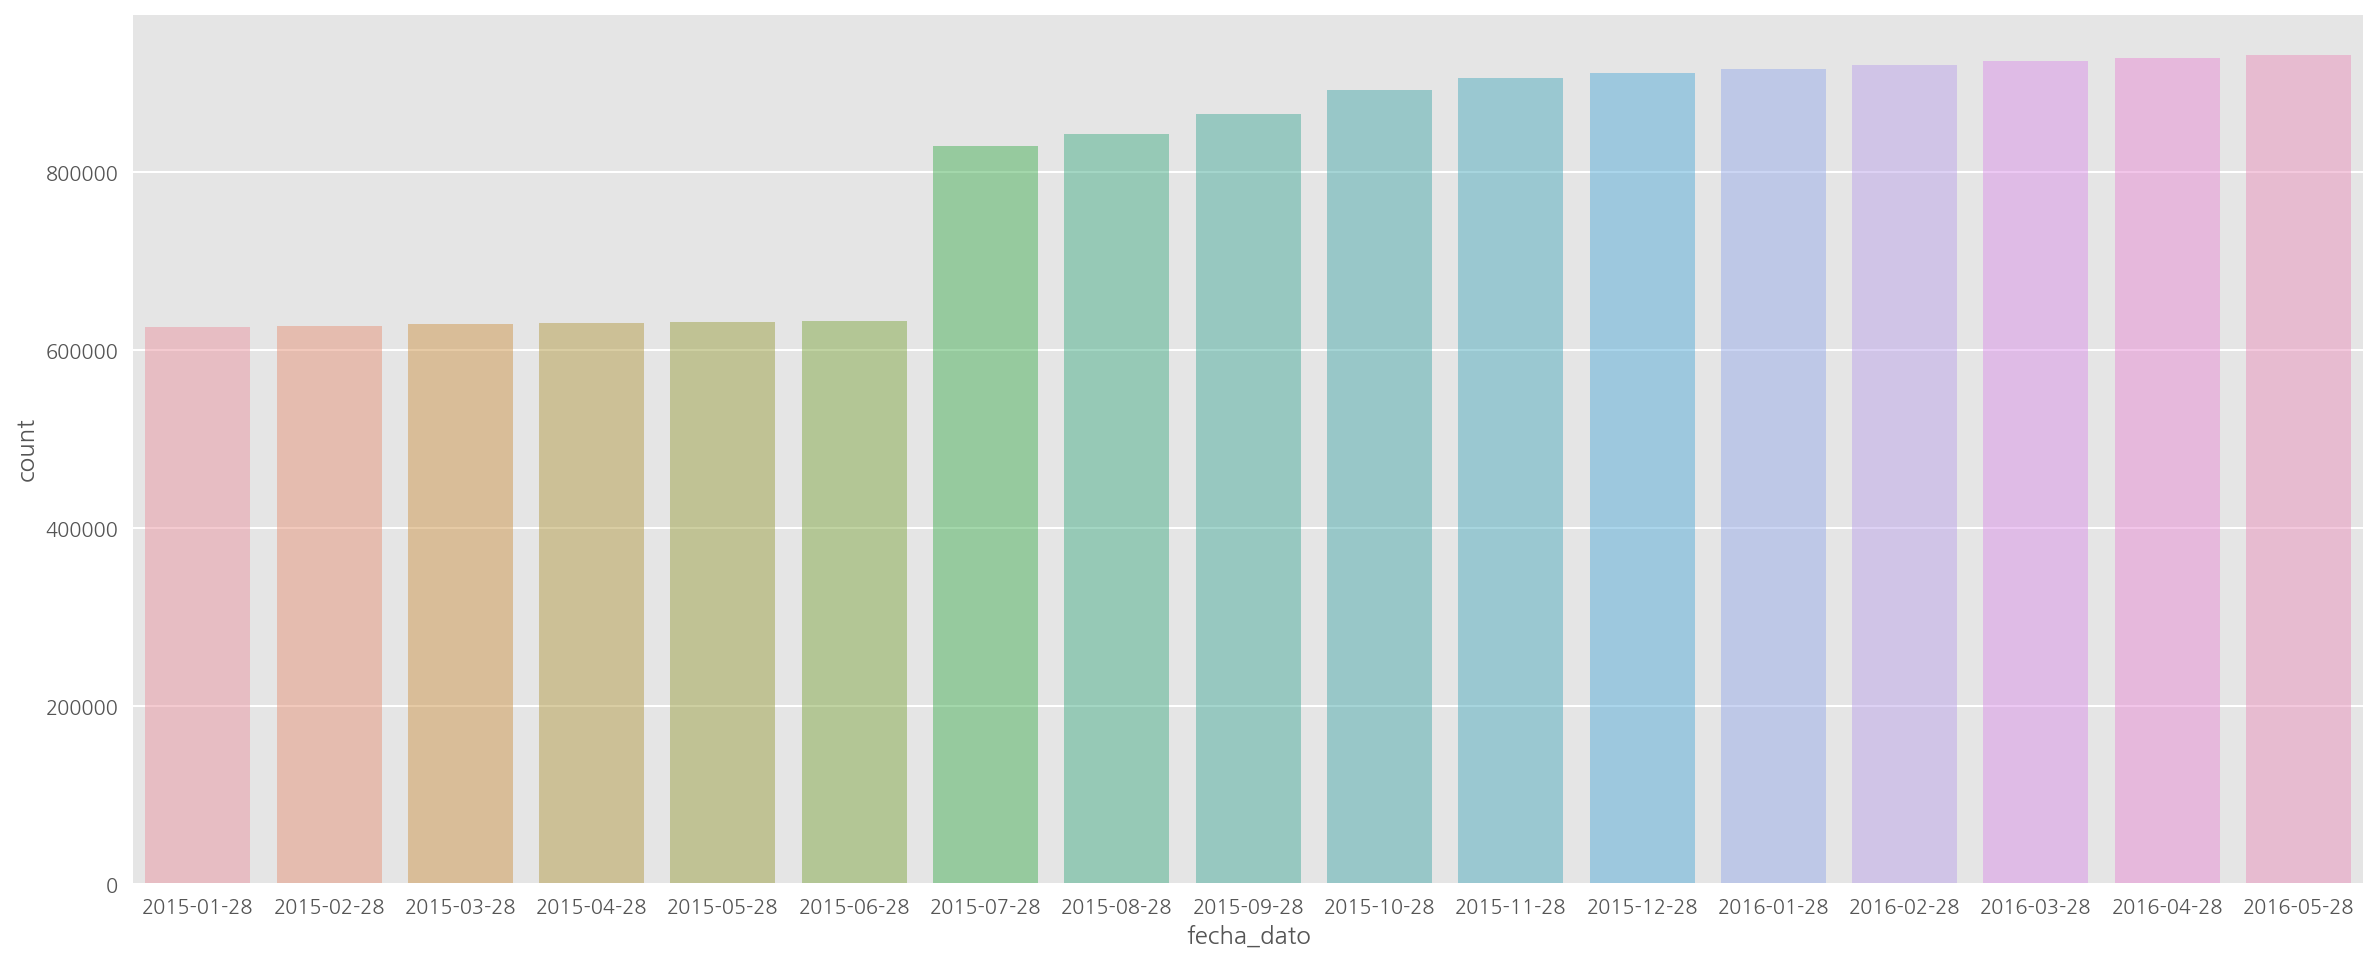

--------------------------------------------------
col :  ind_empleado


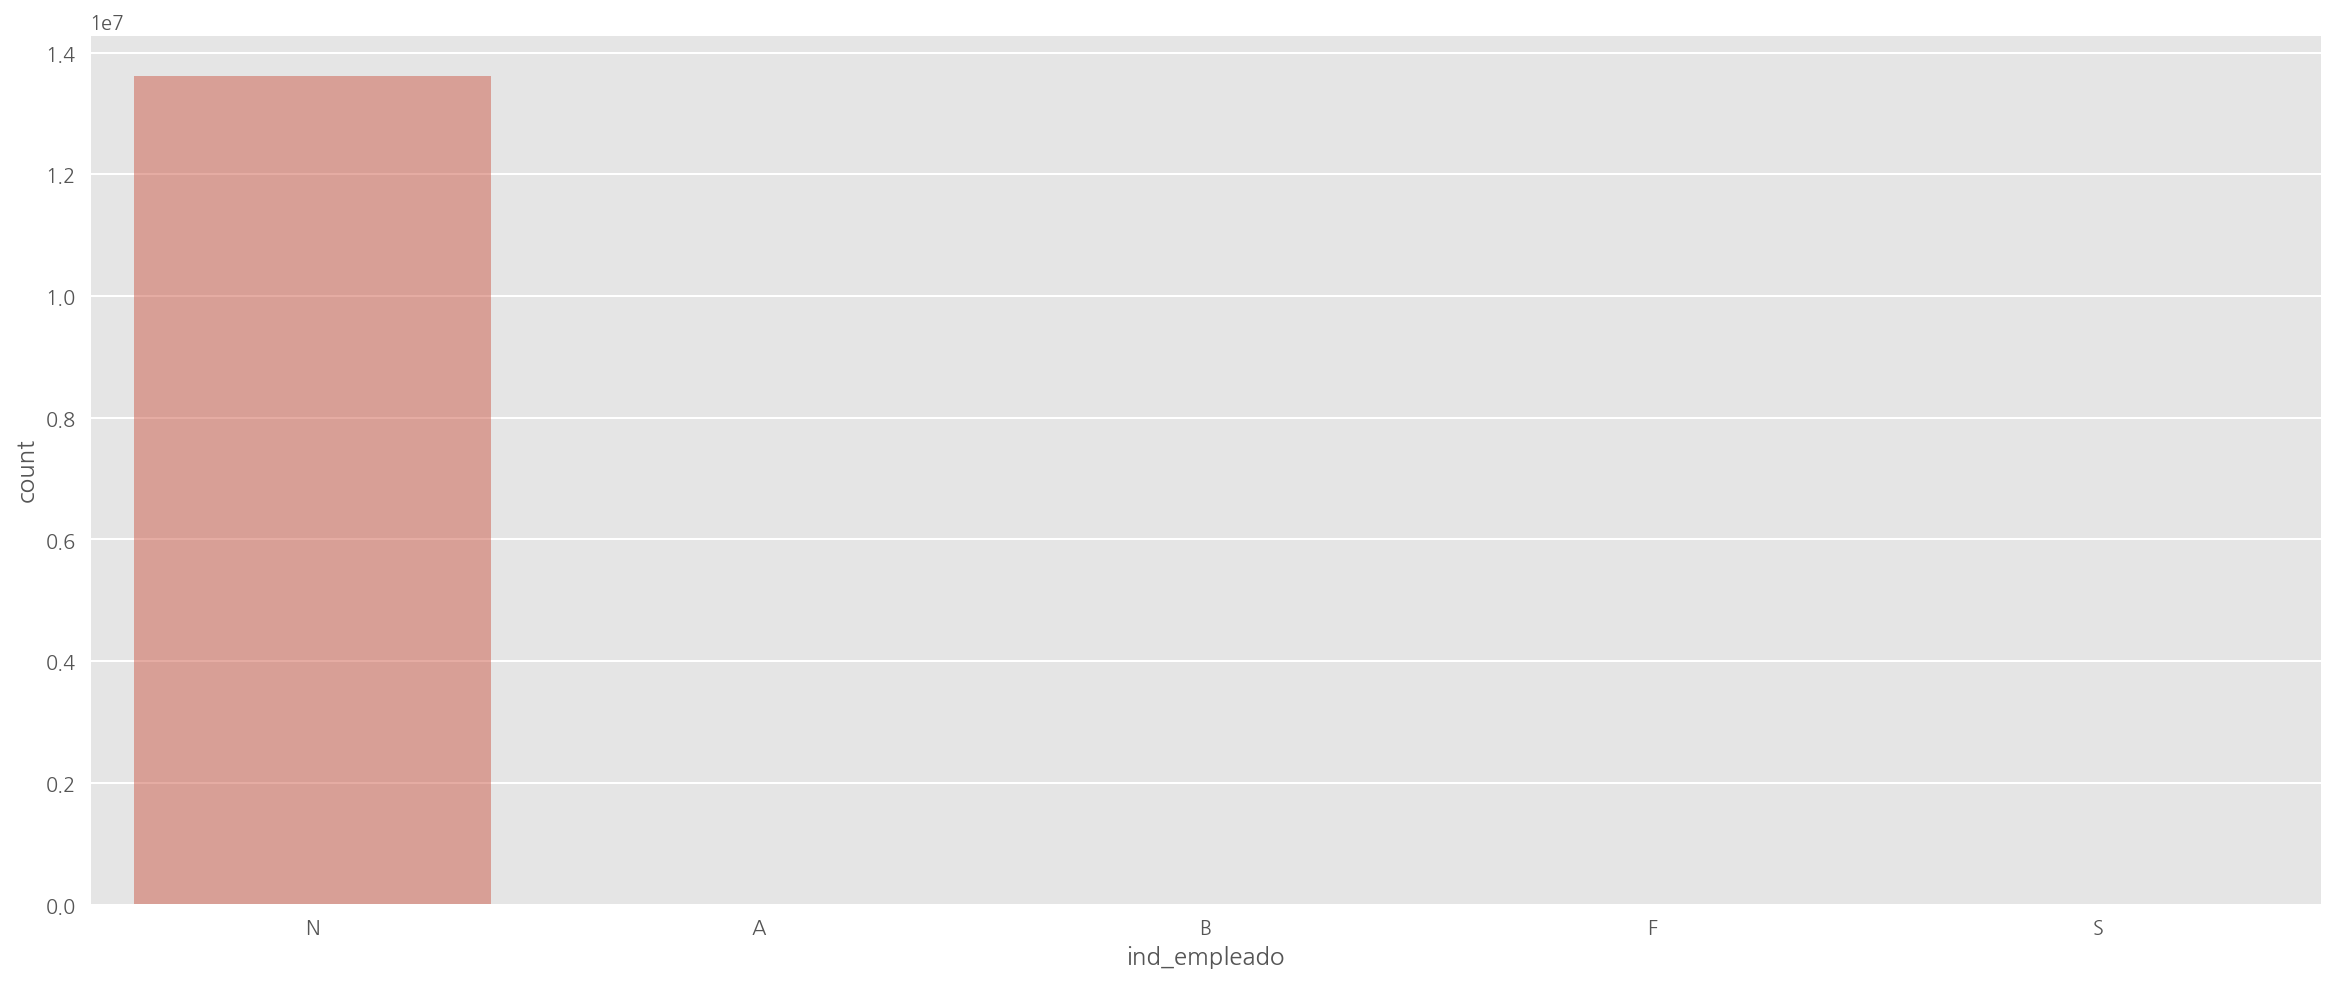

--------------------------------------------------
col :  pais_residencia


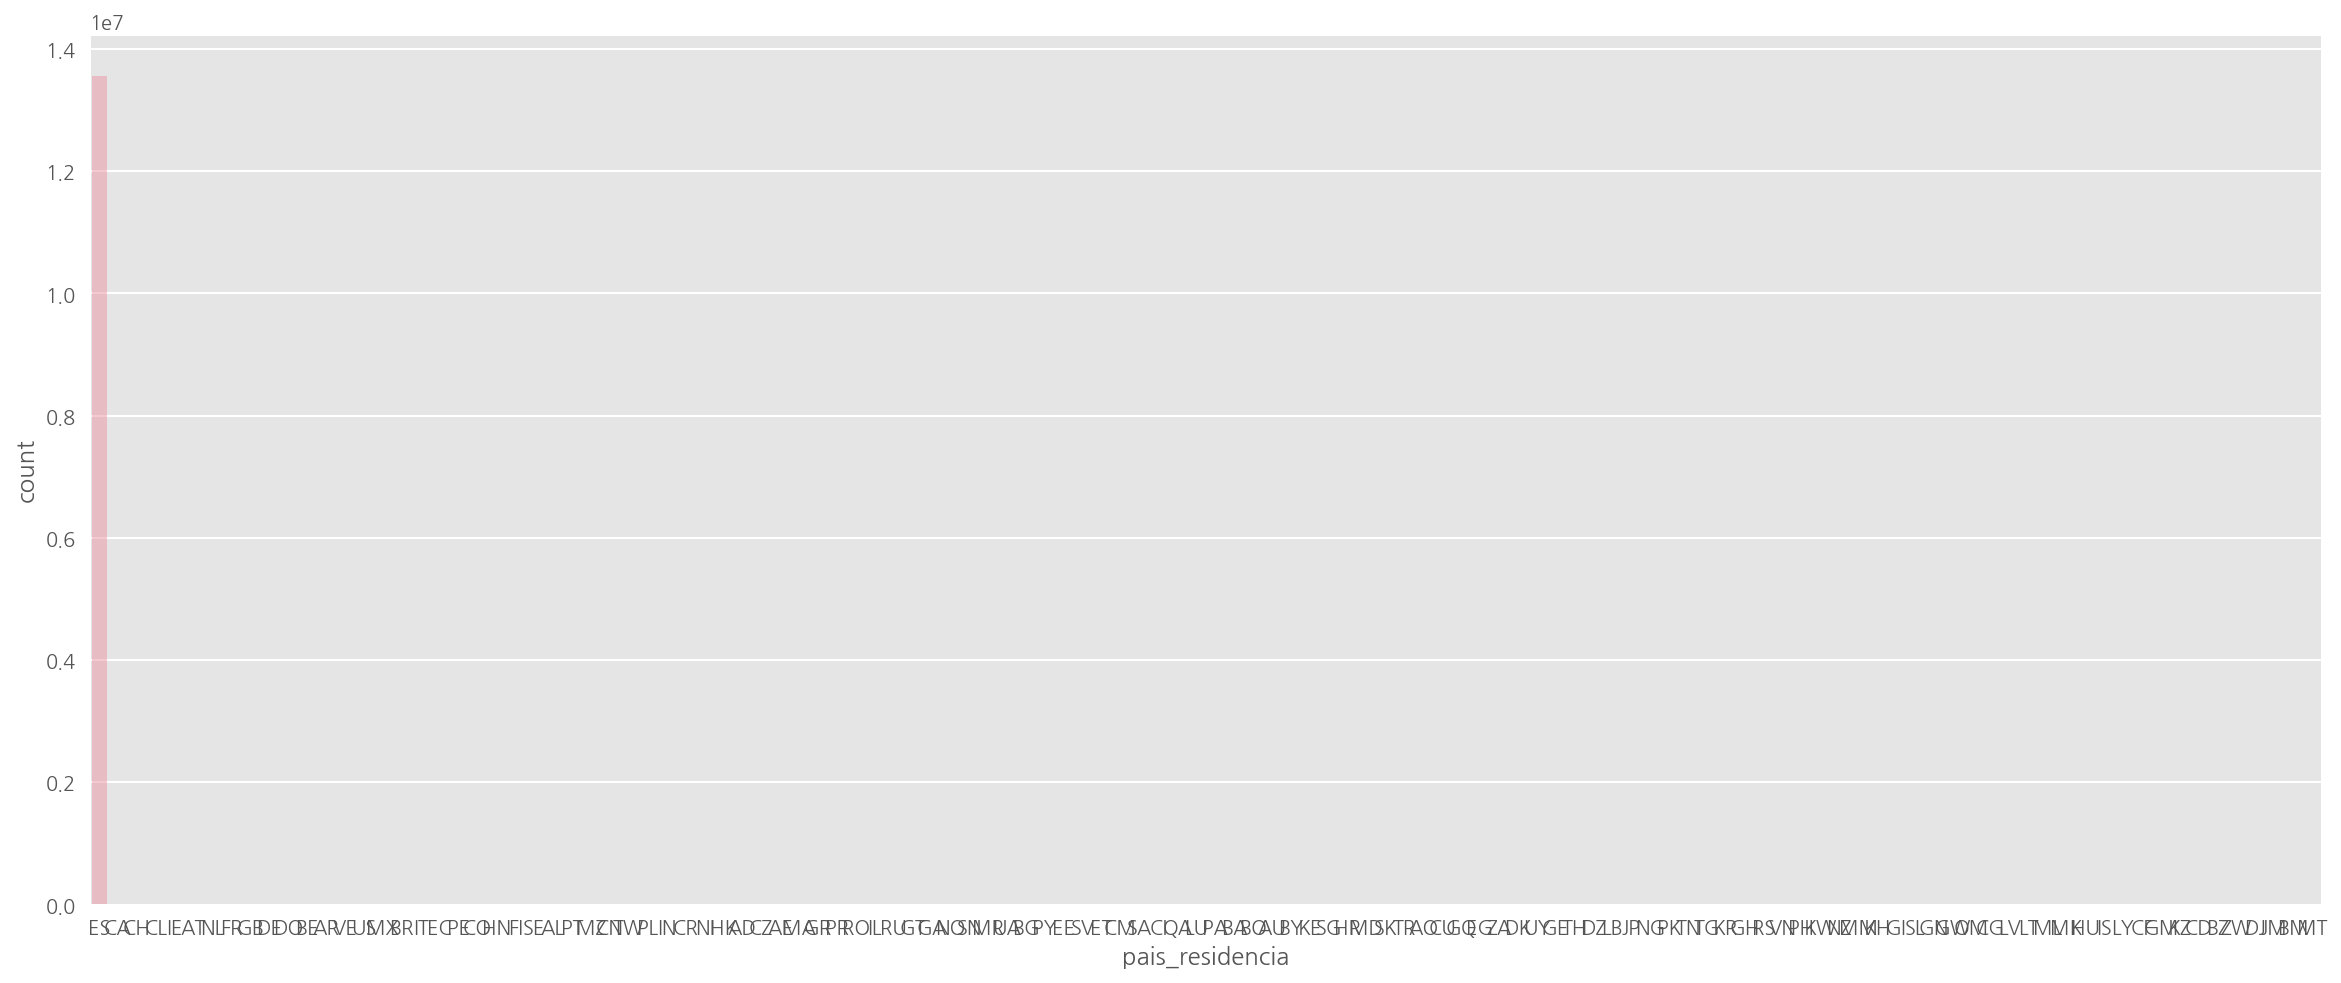

--------------------------------------------------
col :  sexo


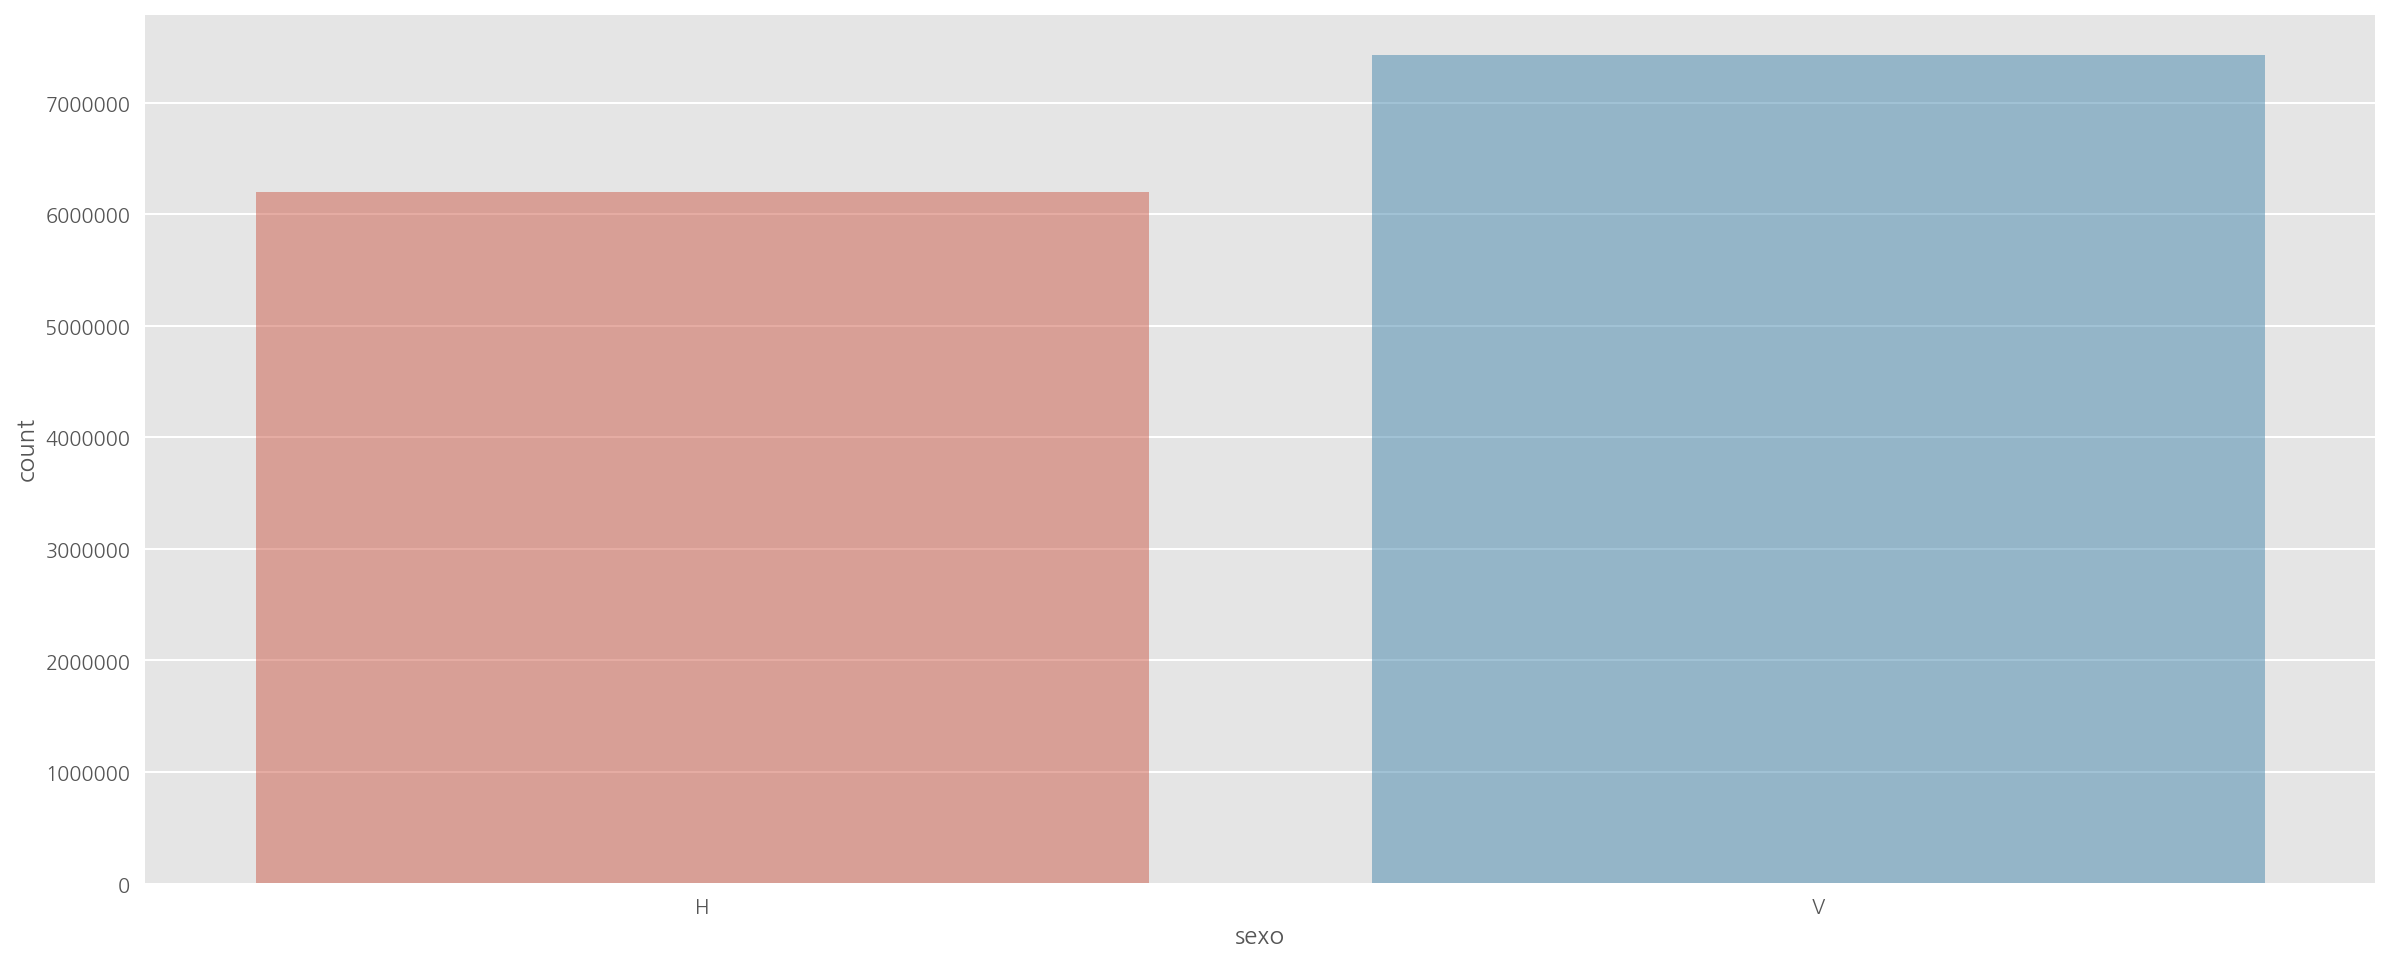

--------------------------------------------------
col :  age


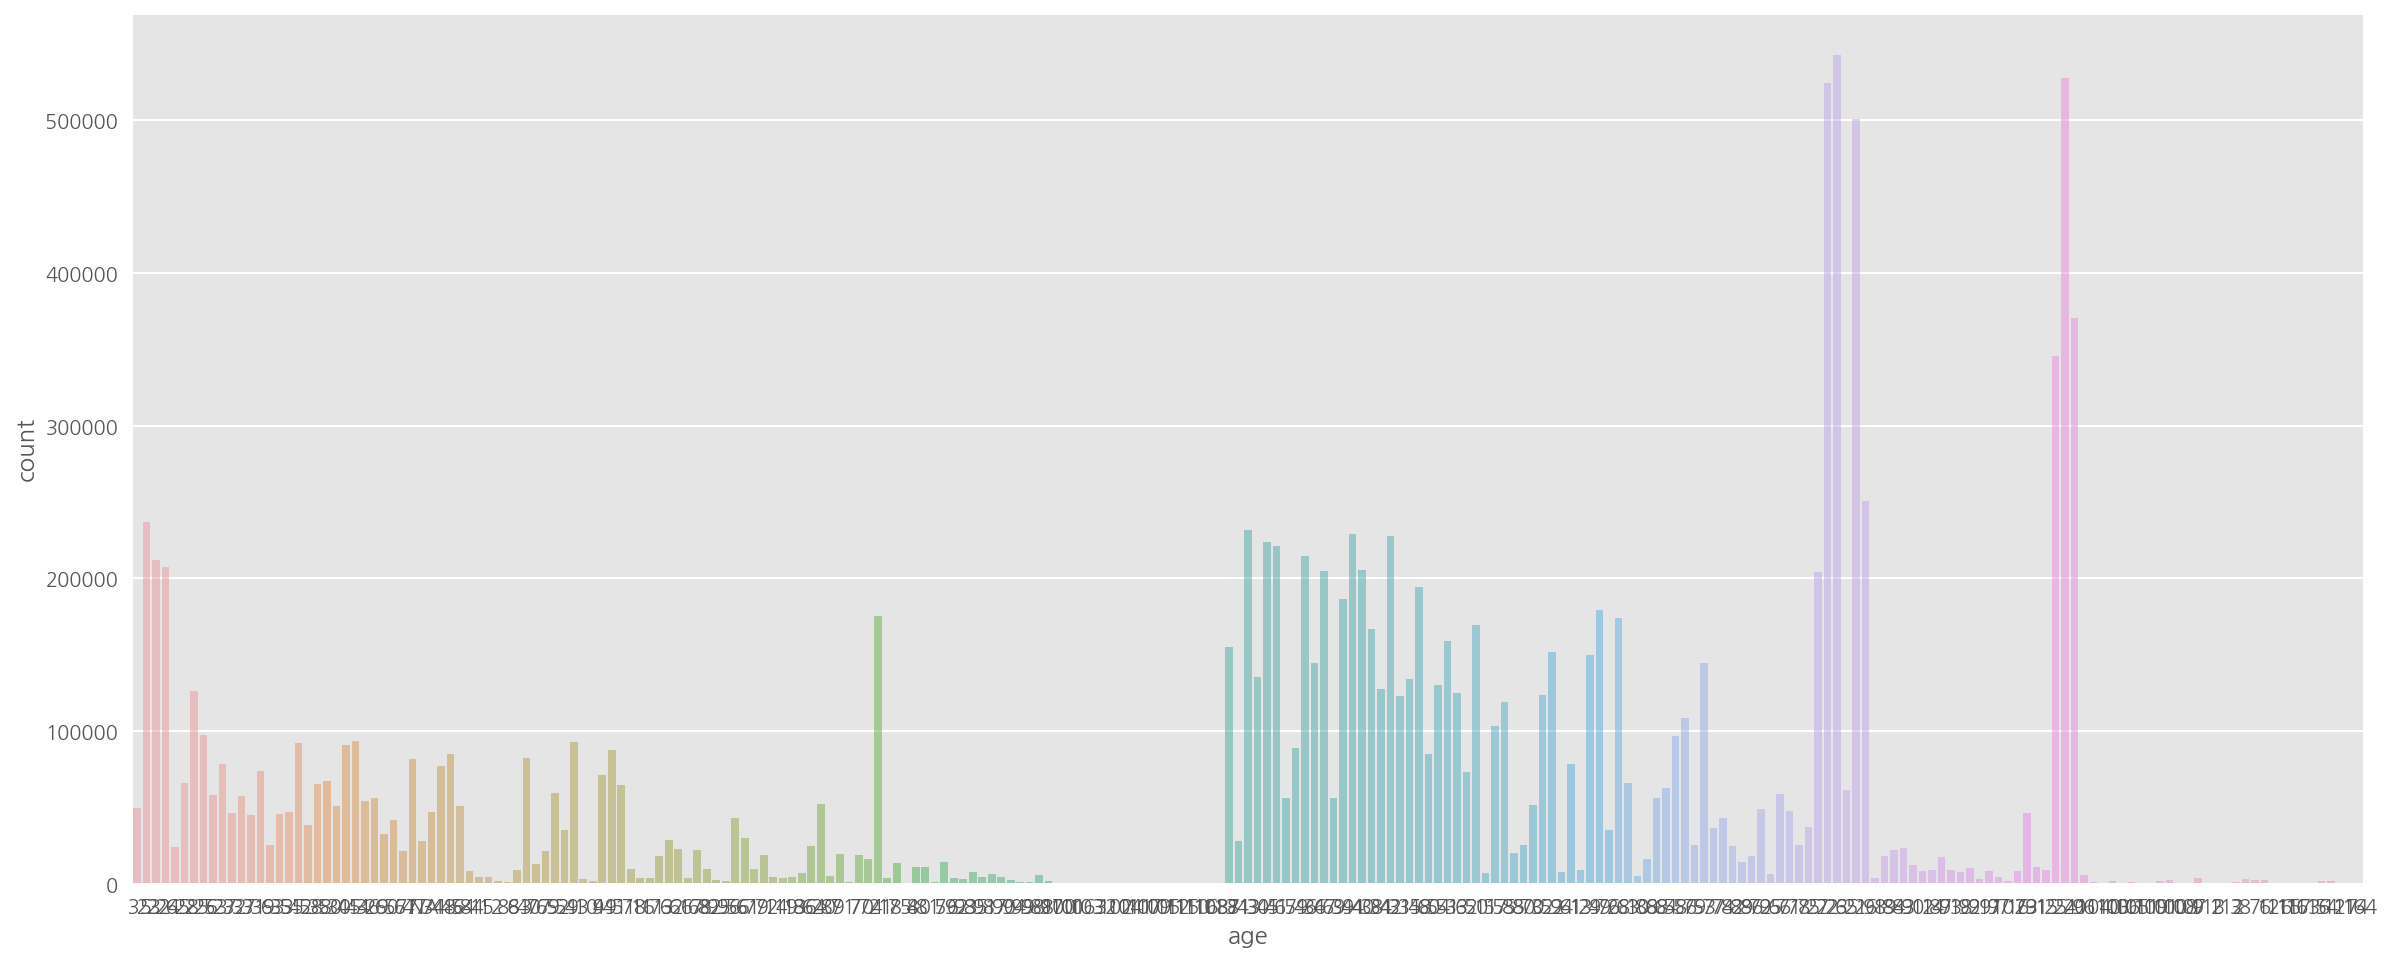

--------------------------------------------------
col :  fecha_alta


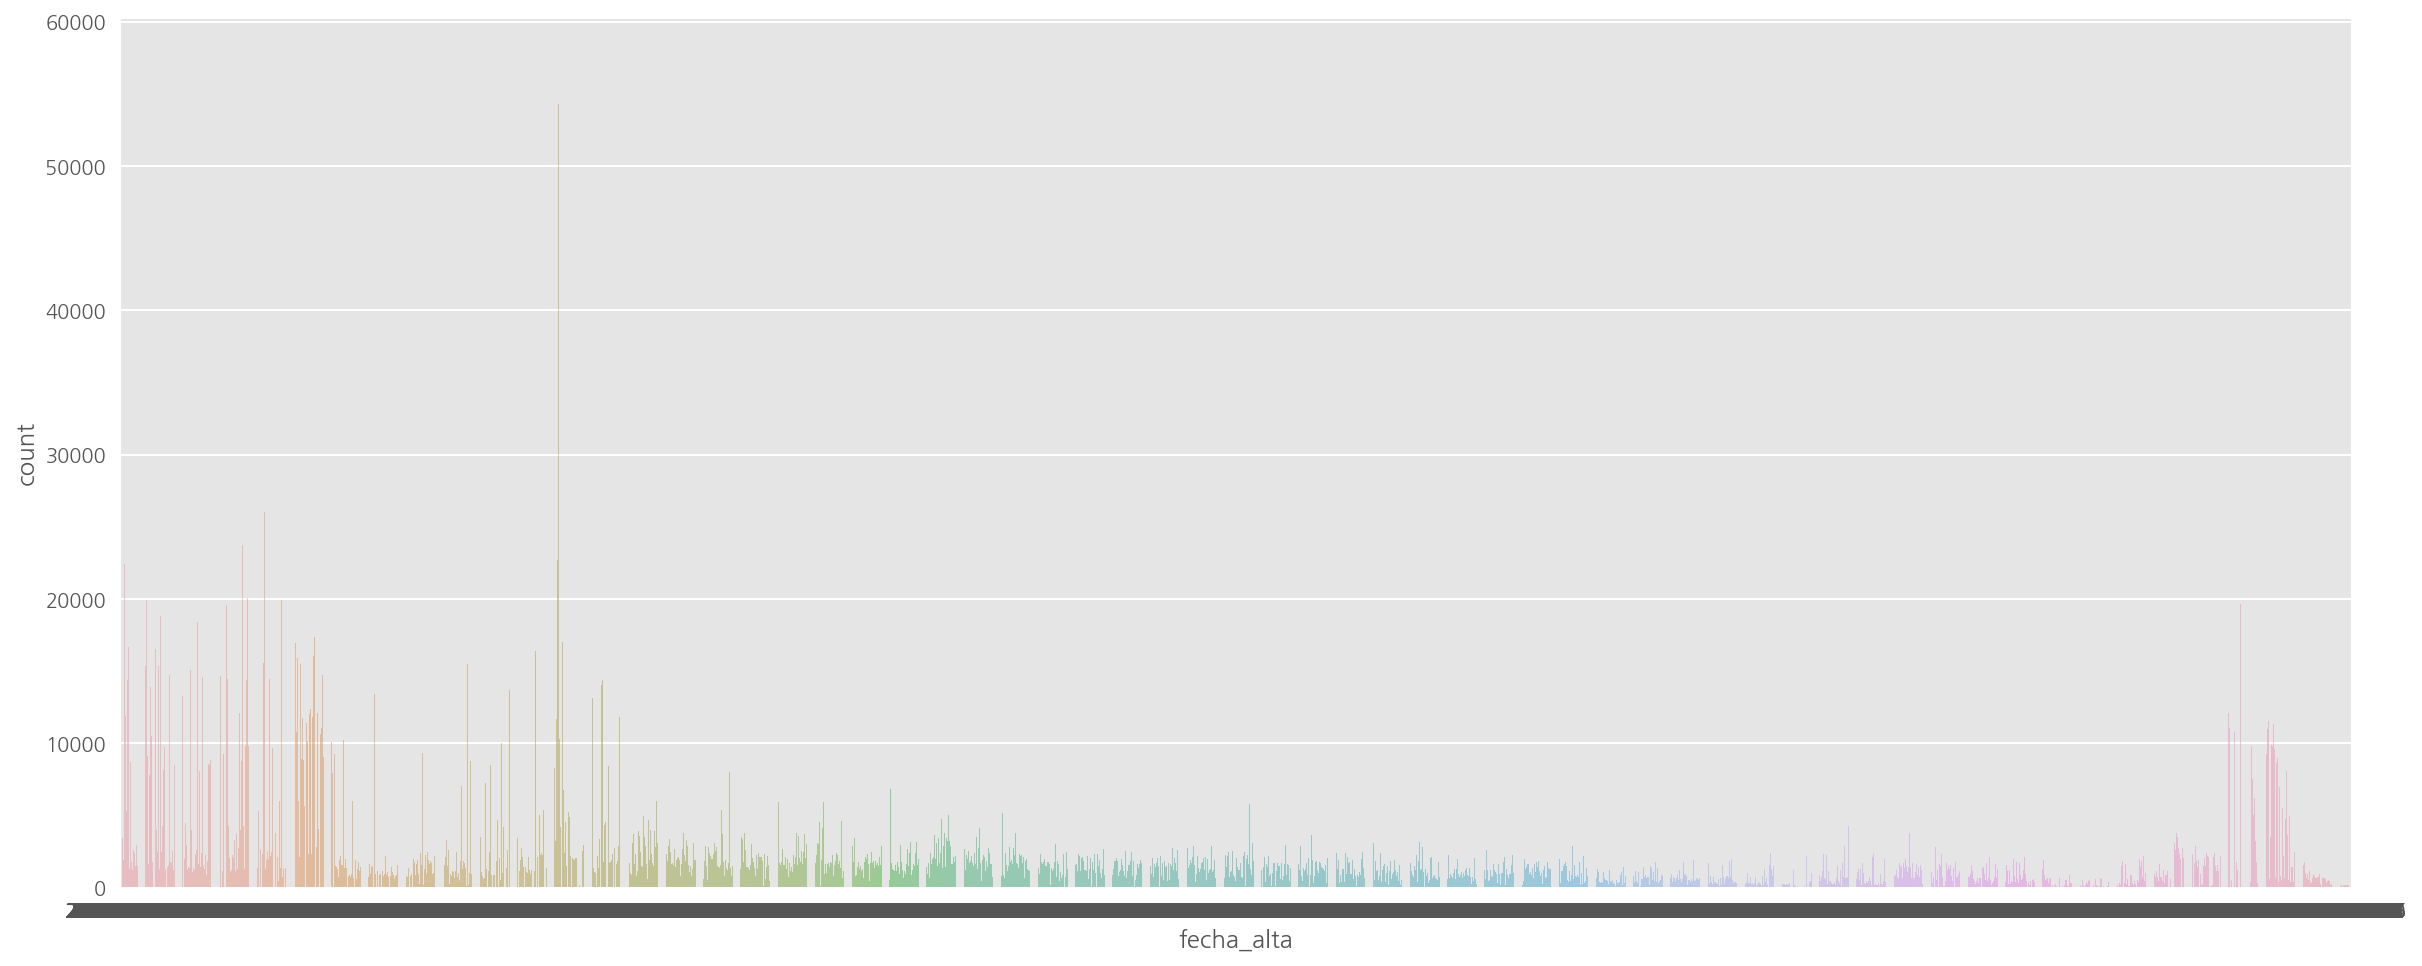

--------------------------------------------------
col :  ind_nuevo


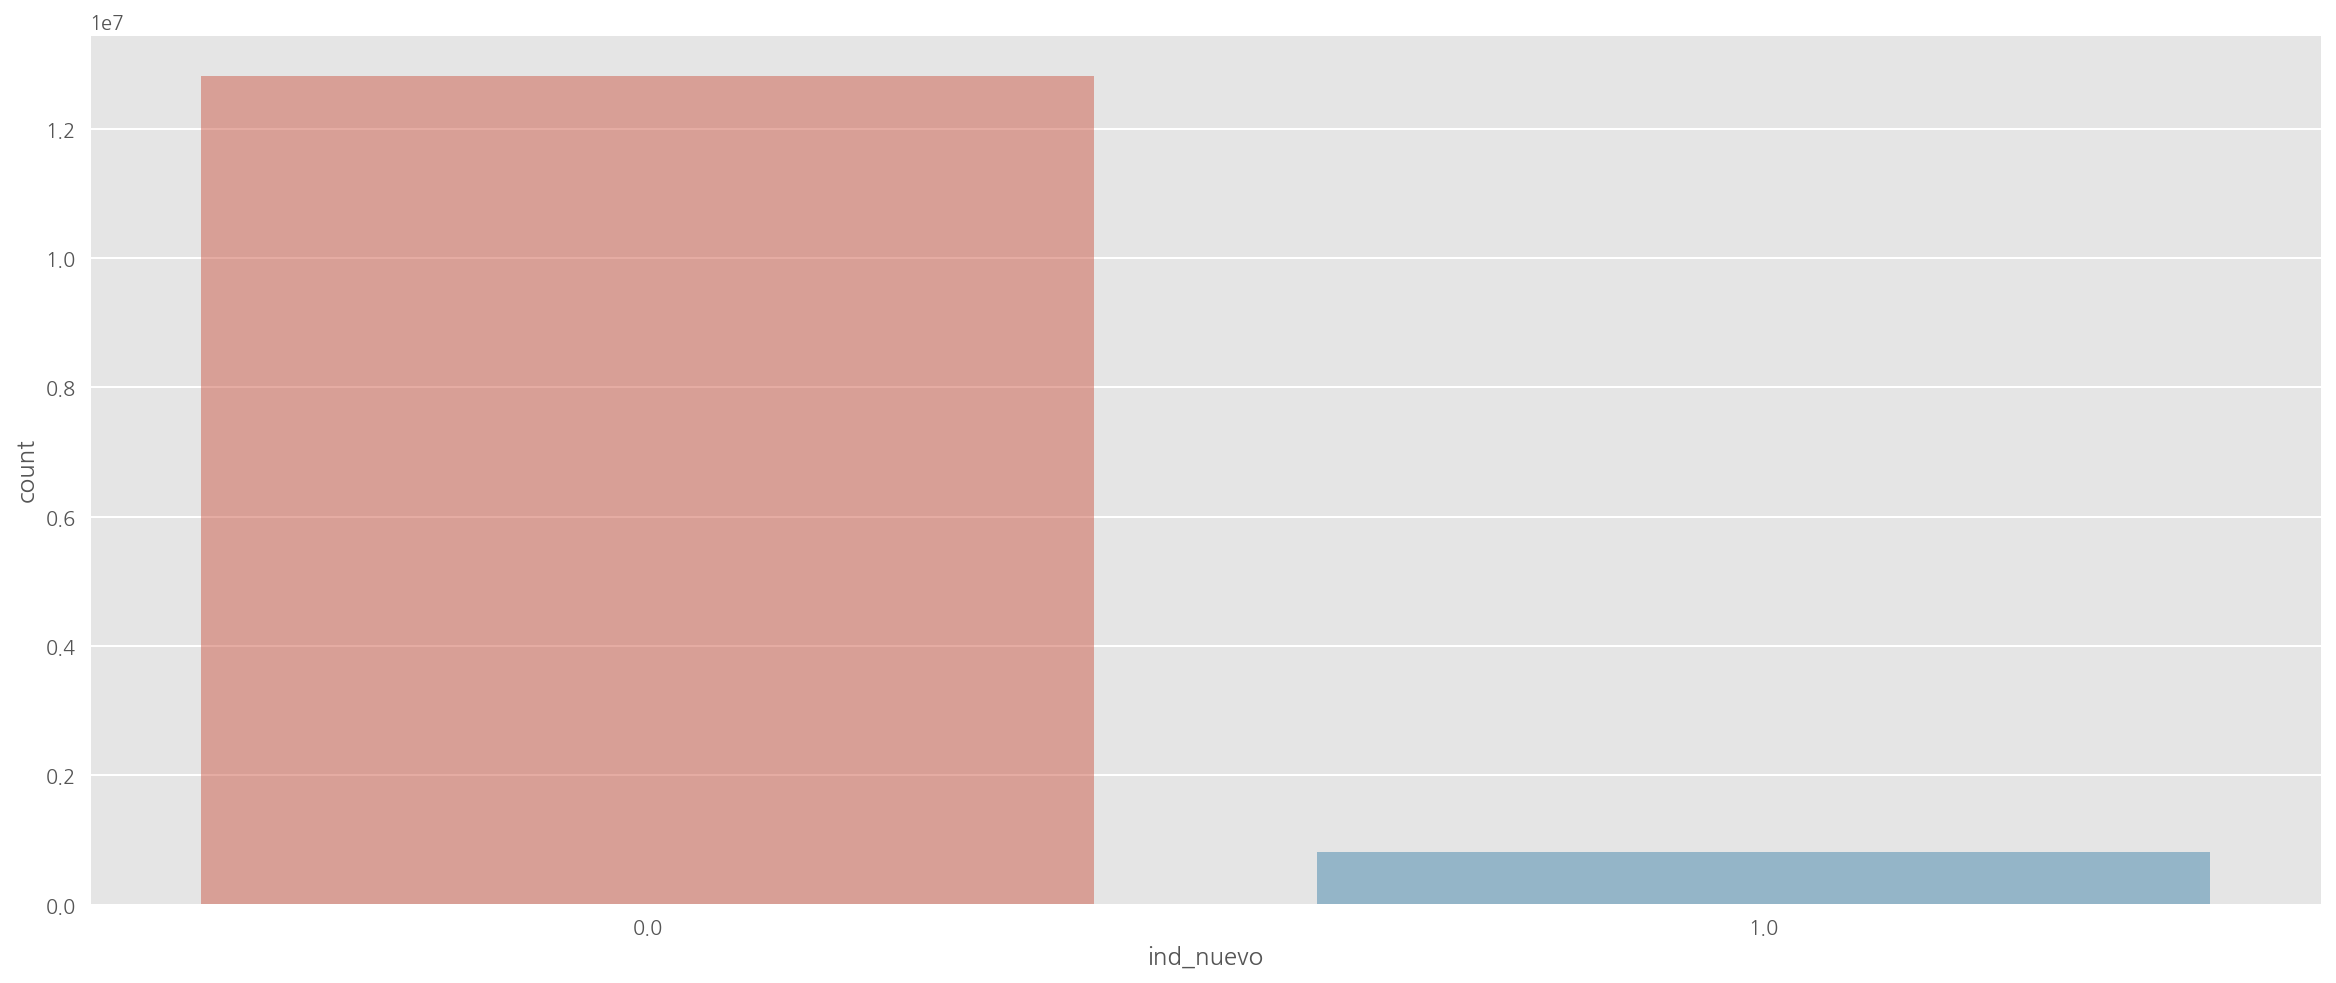

--------------------------------------------------
col :  antiguedad


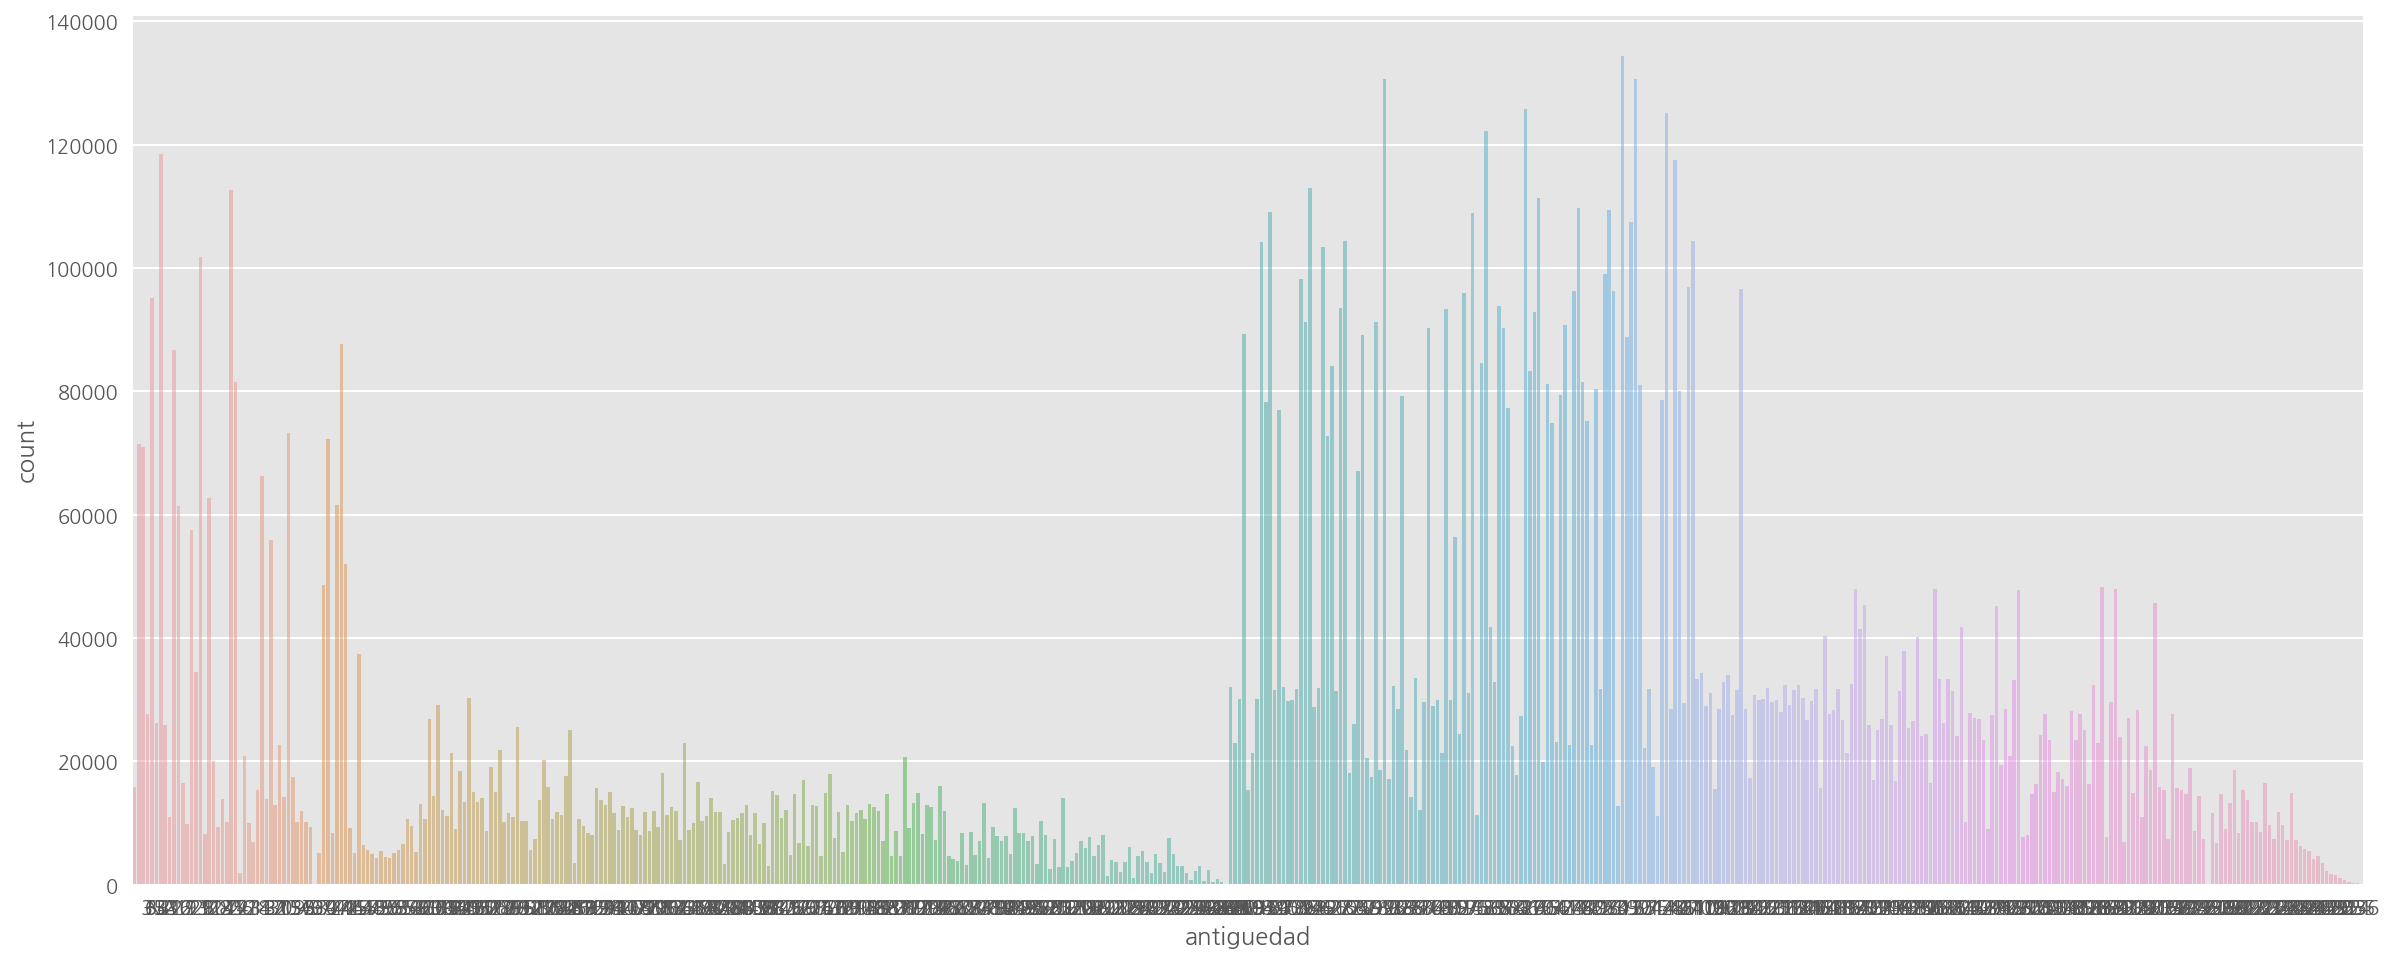

--------------------------------------------------
col :  indrel


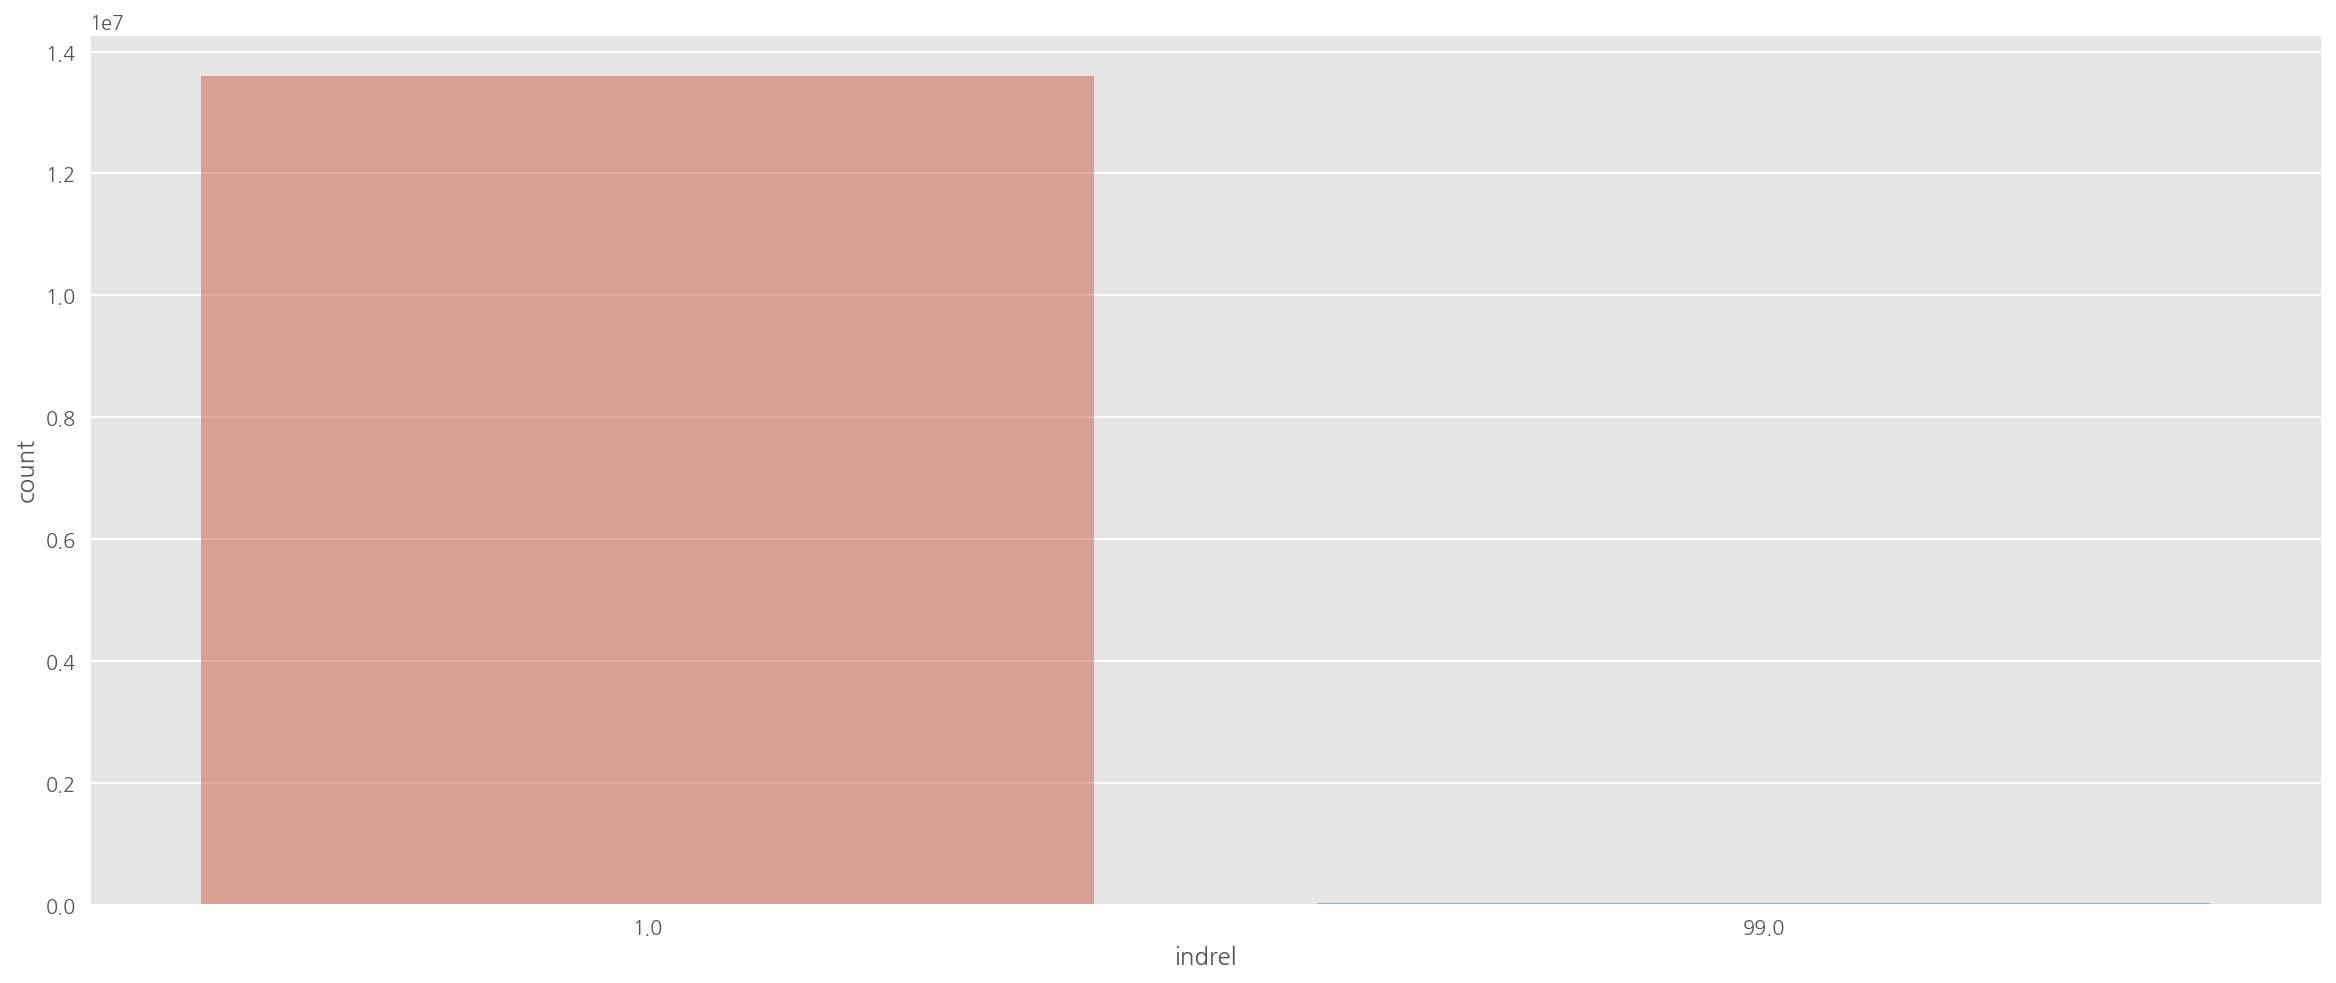

--------------------------------------------------
col :  ult_fec_cli_1t


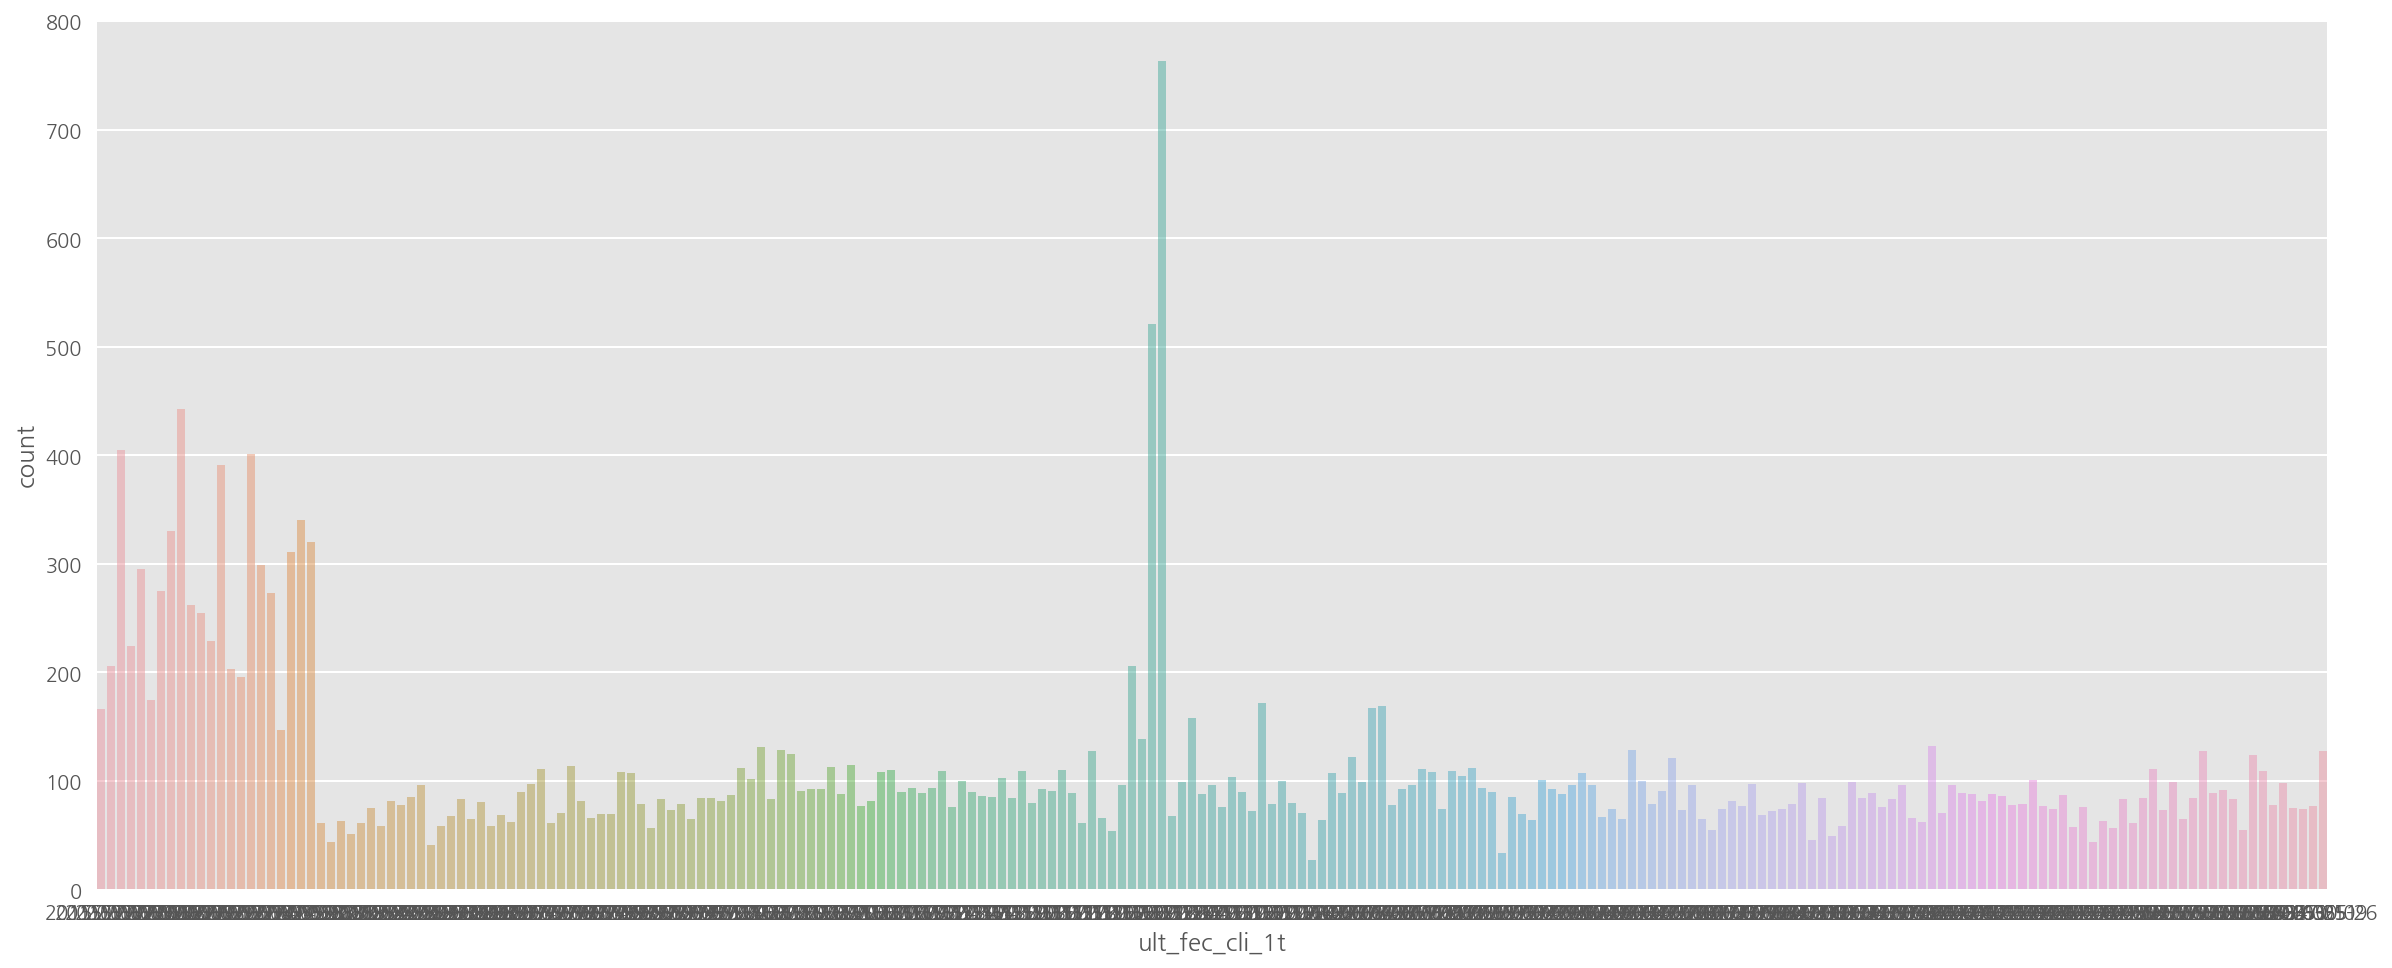

--------------------------------------------------
col :  indrel_1mes


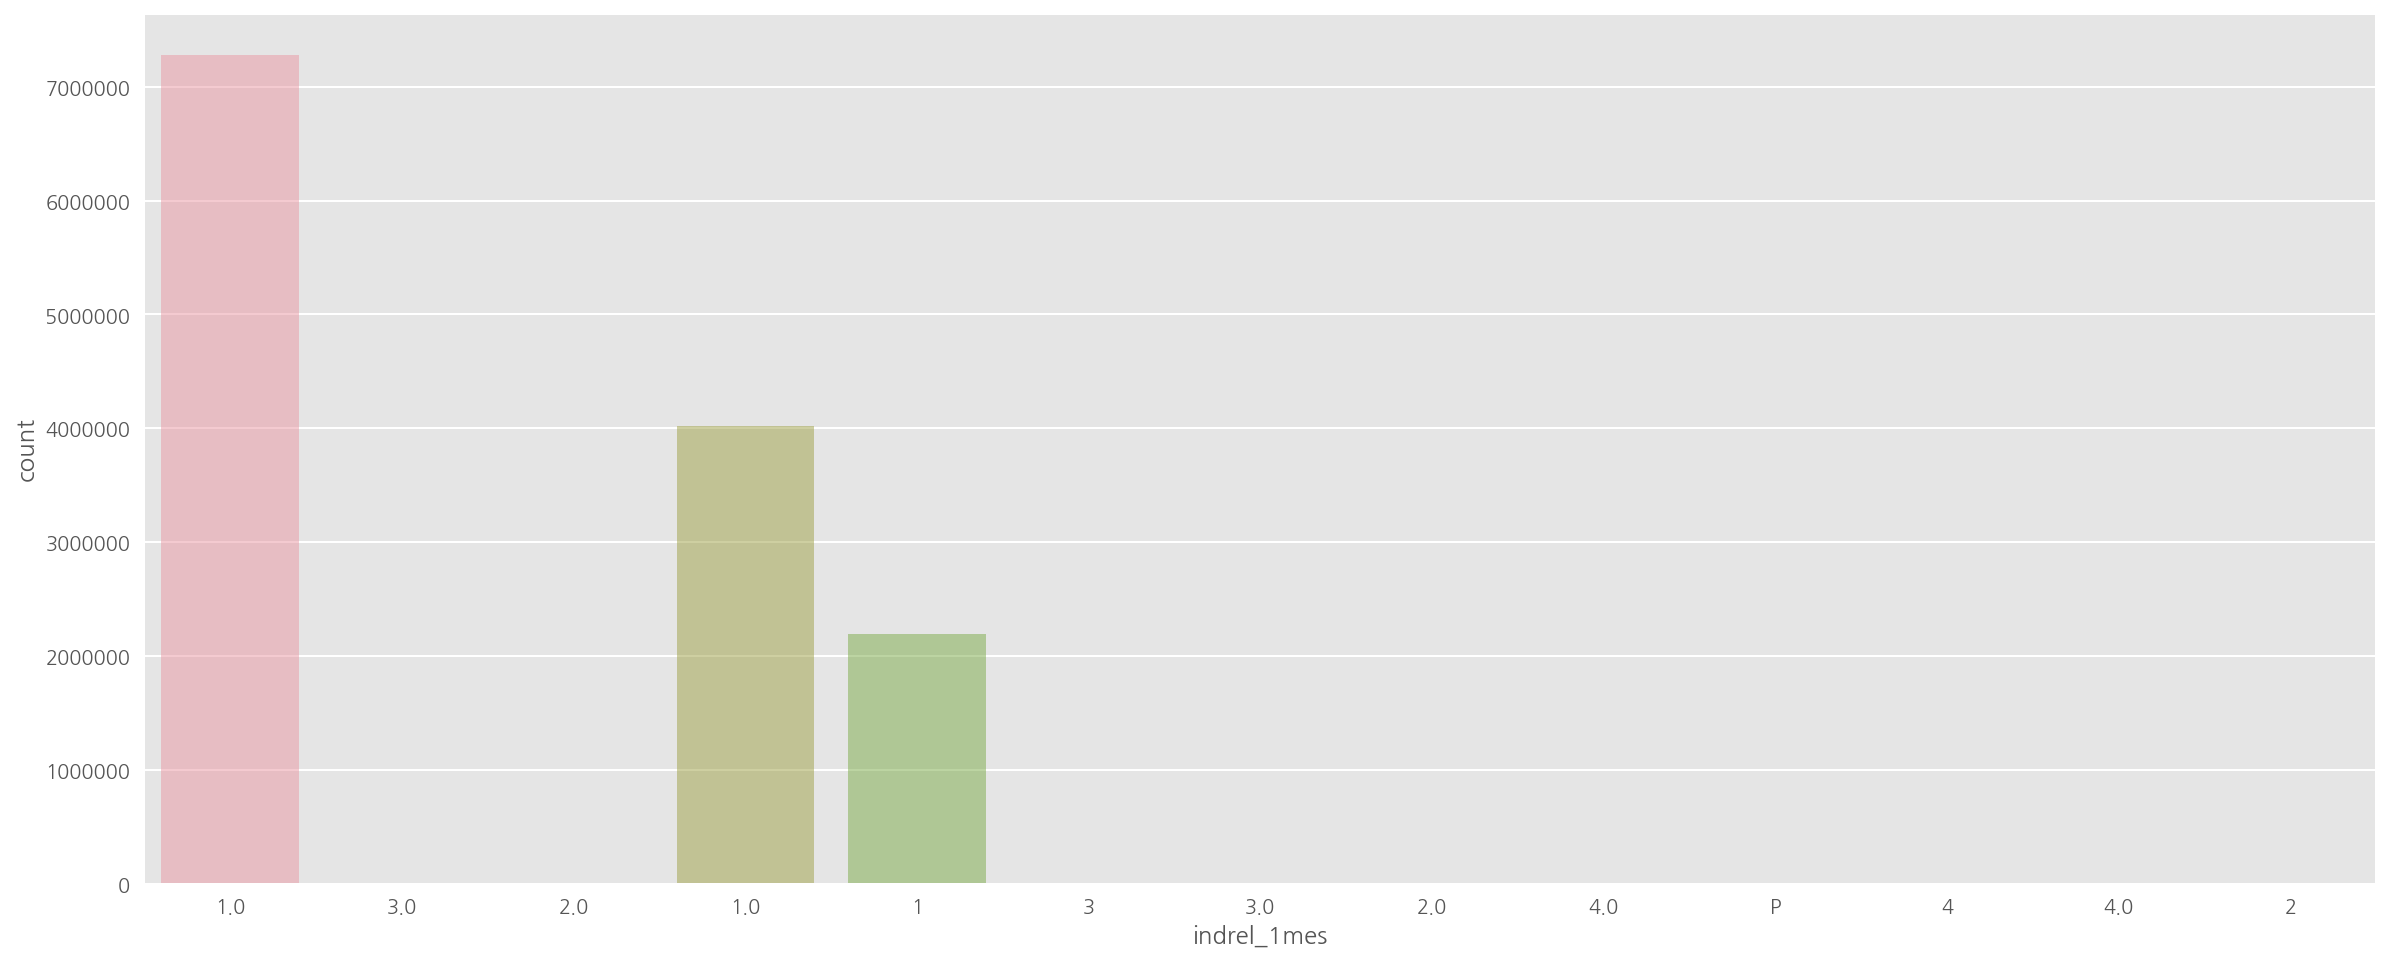

--------------------------------------------------
col :  tiprel_1mes


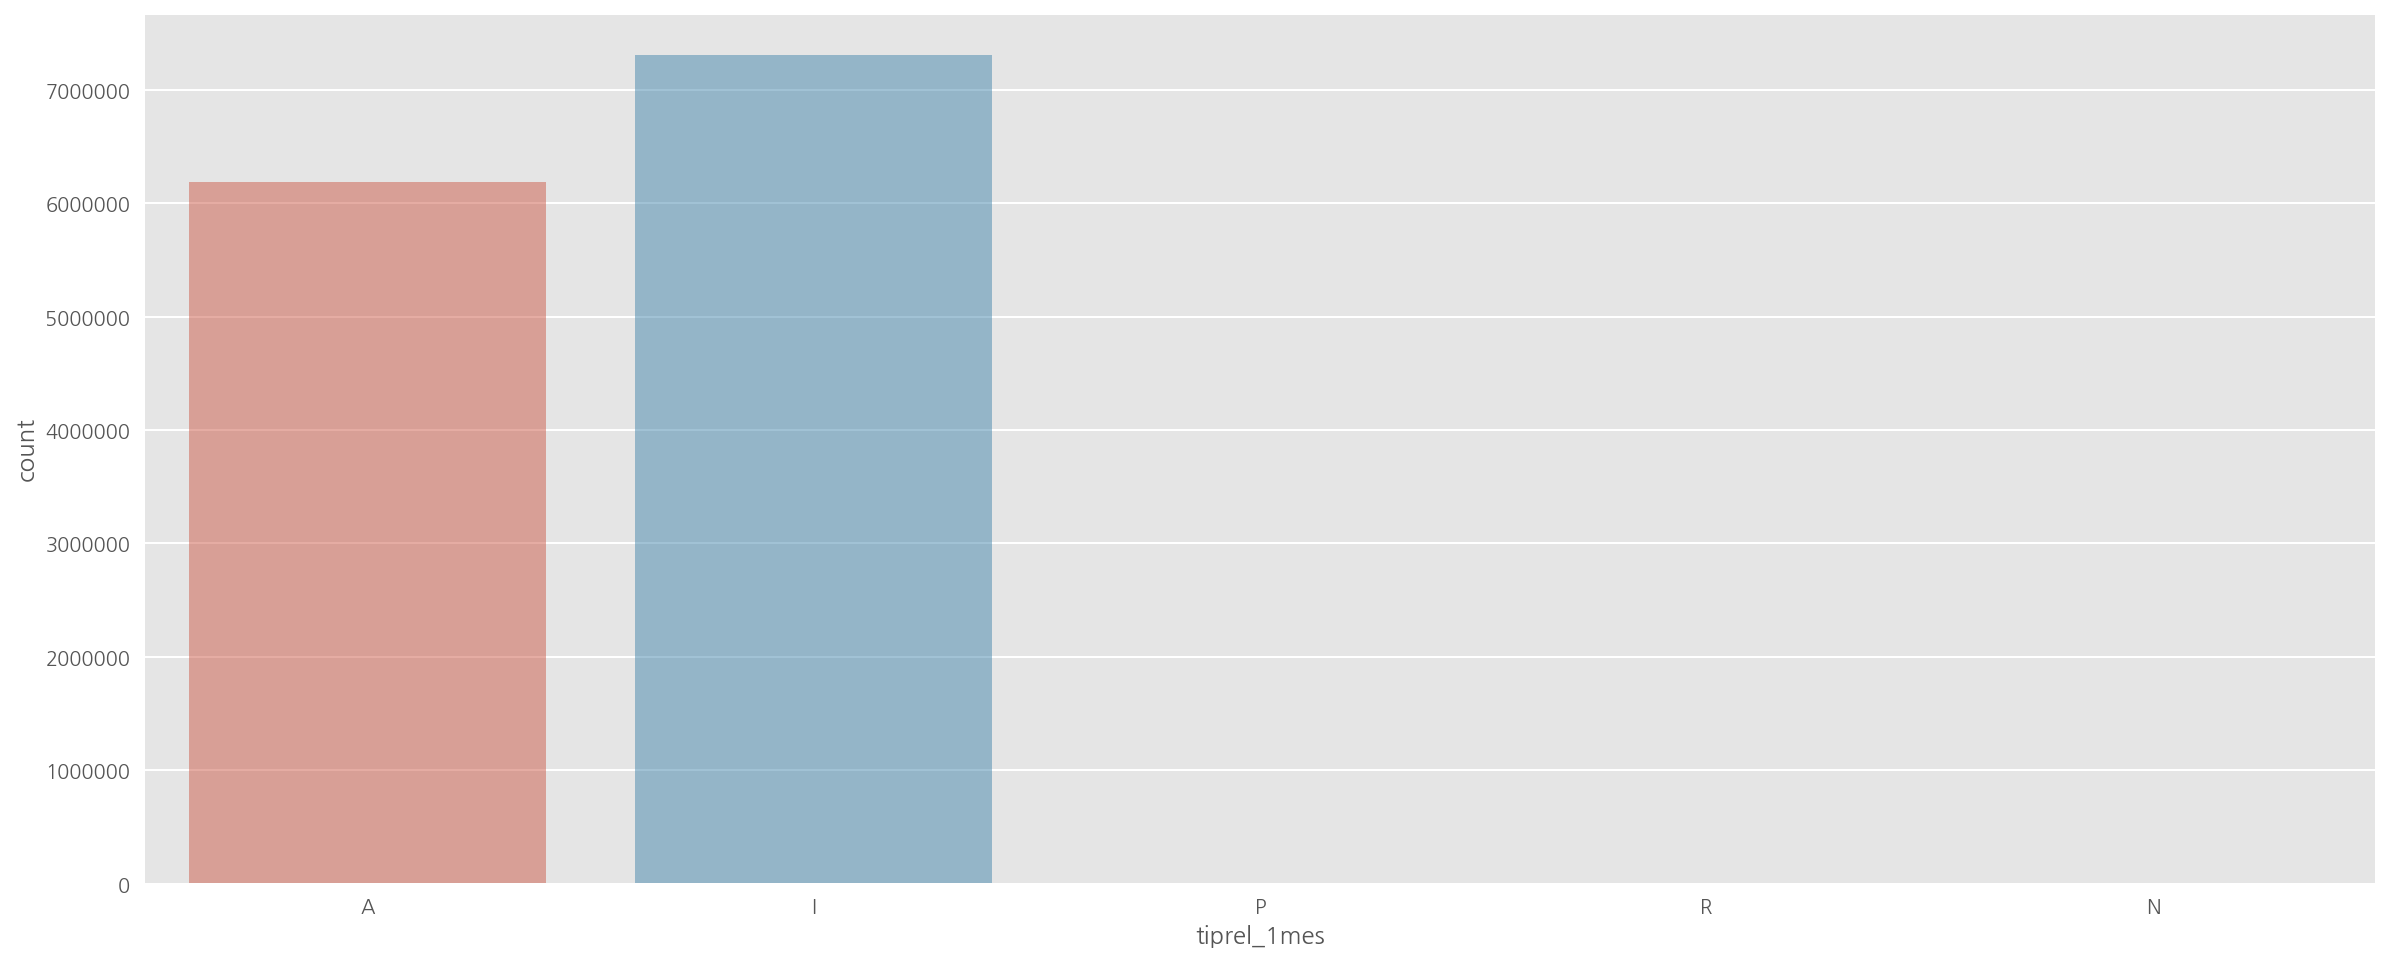

--------------------------------------------------
col :  indresi


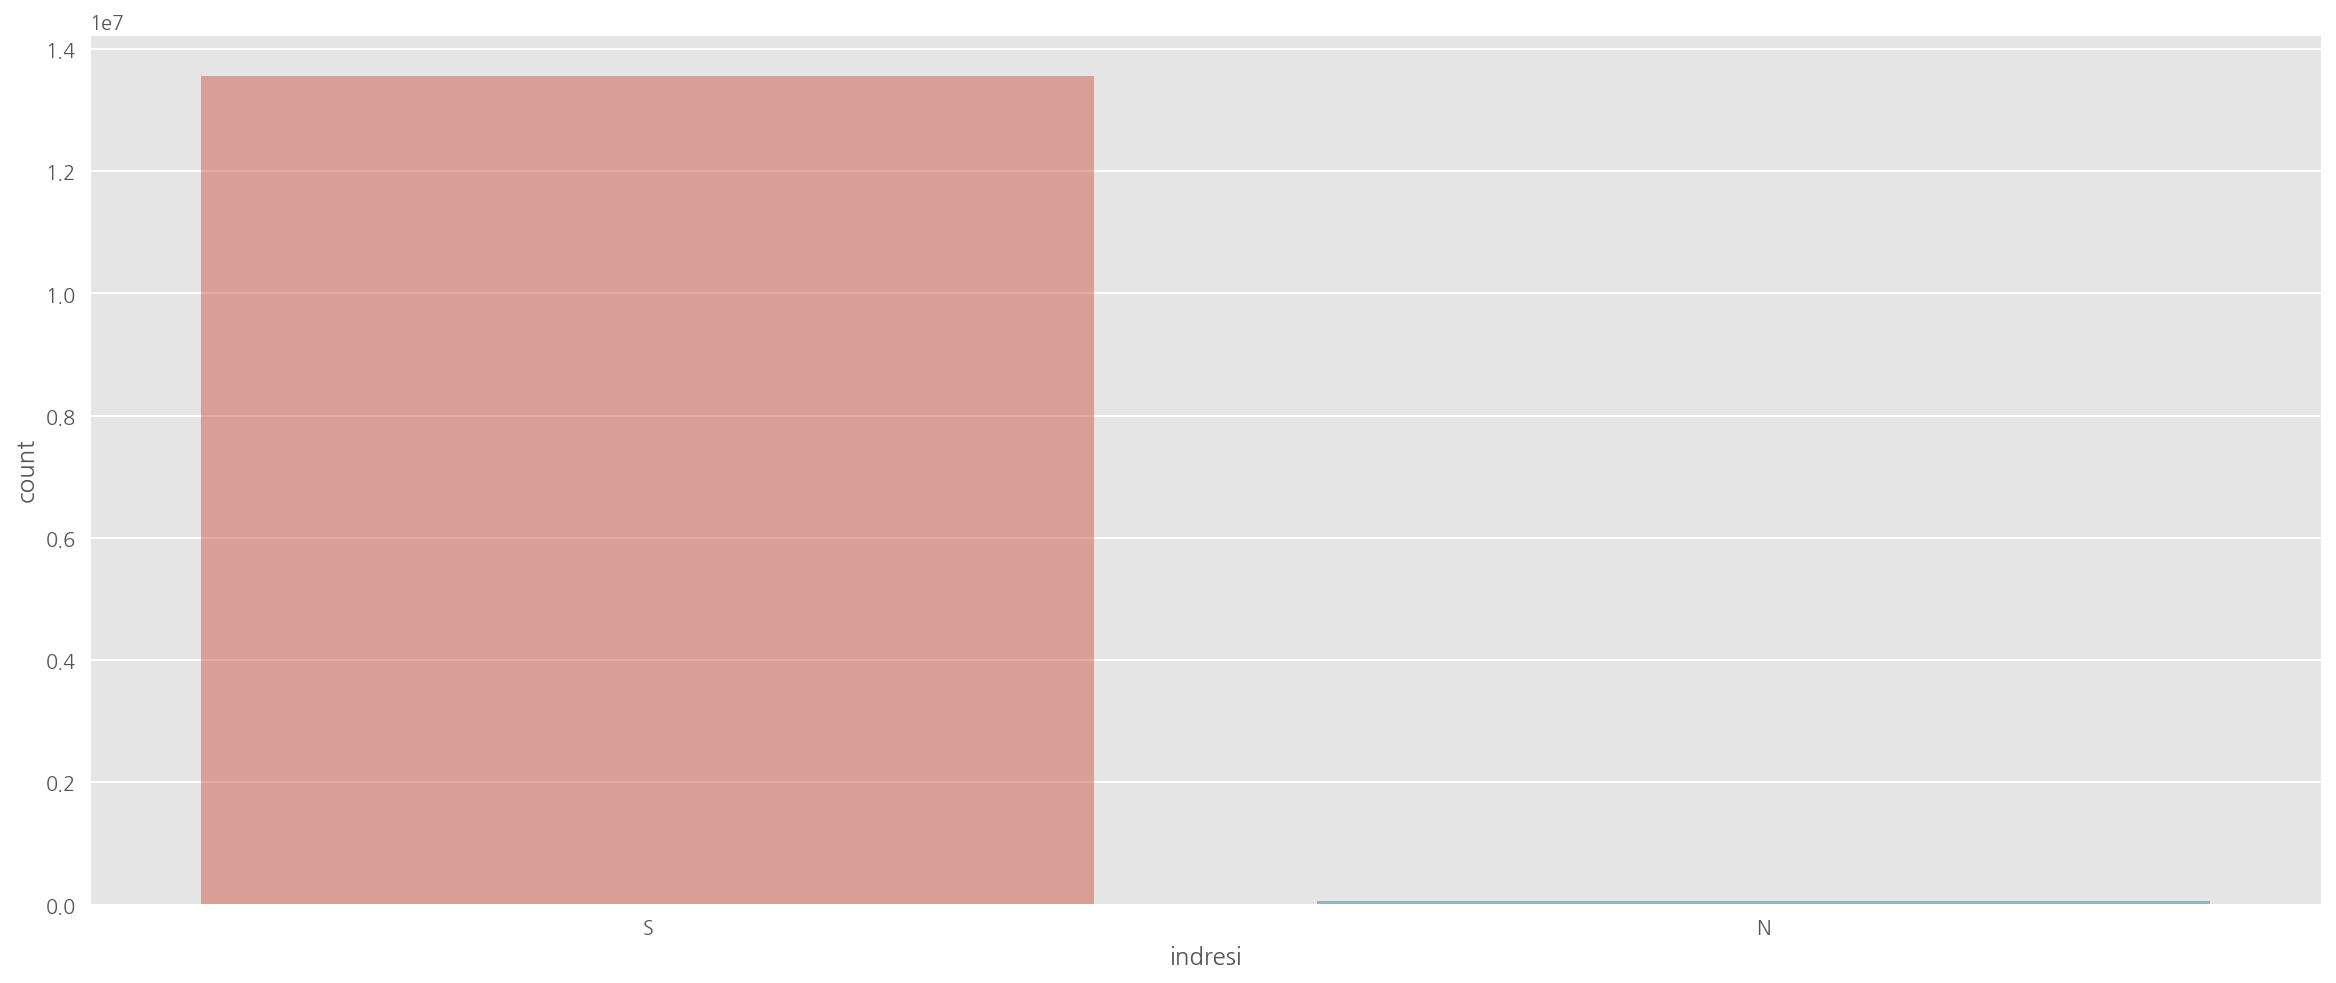

--------------------------------------------------
col :  indext


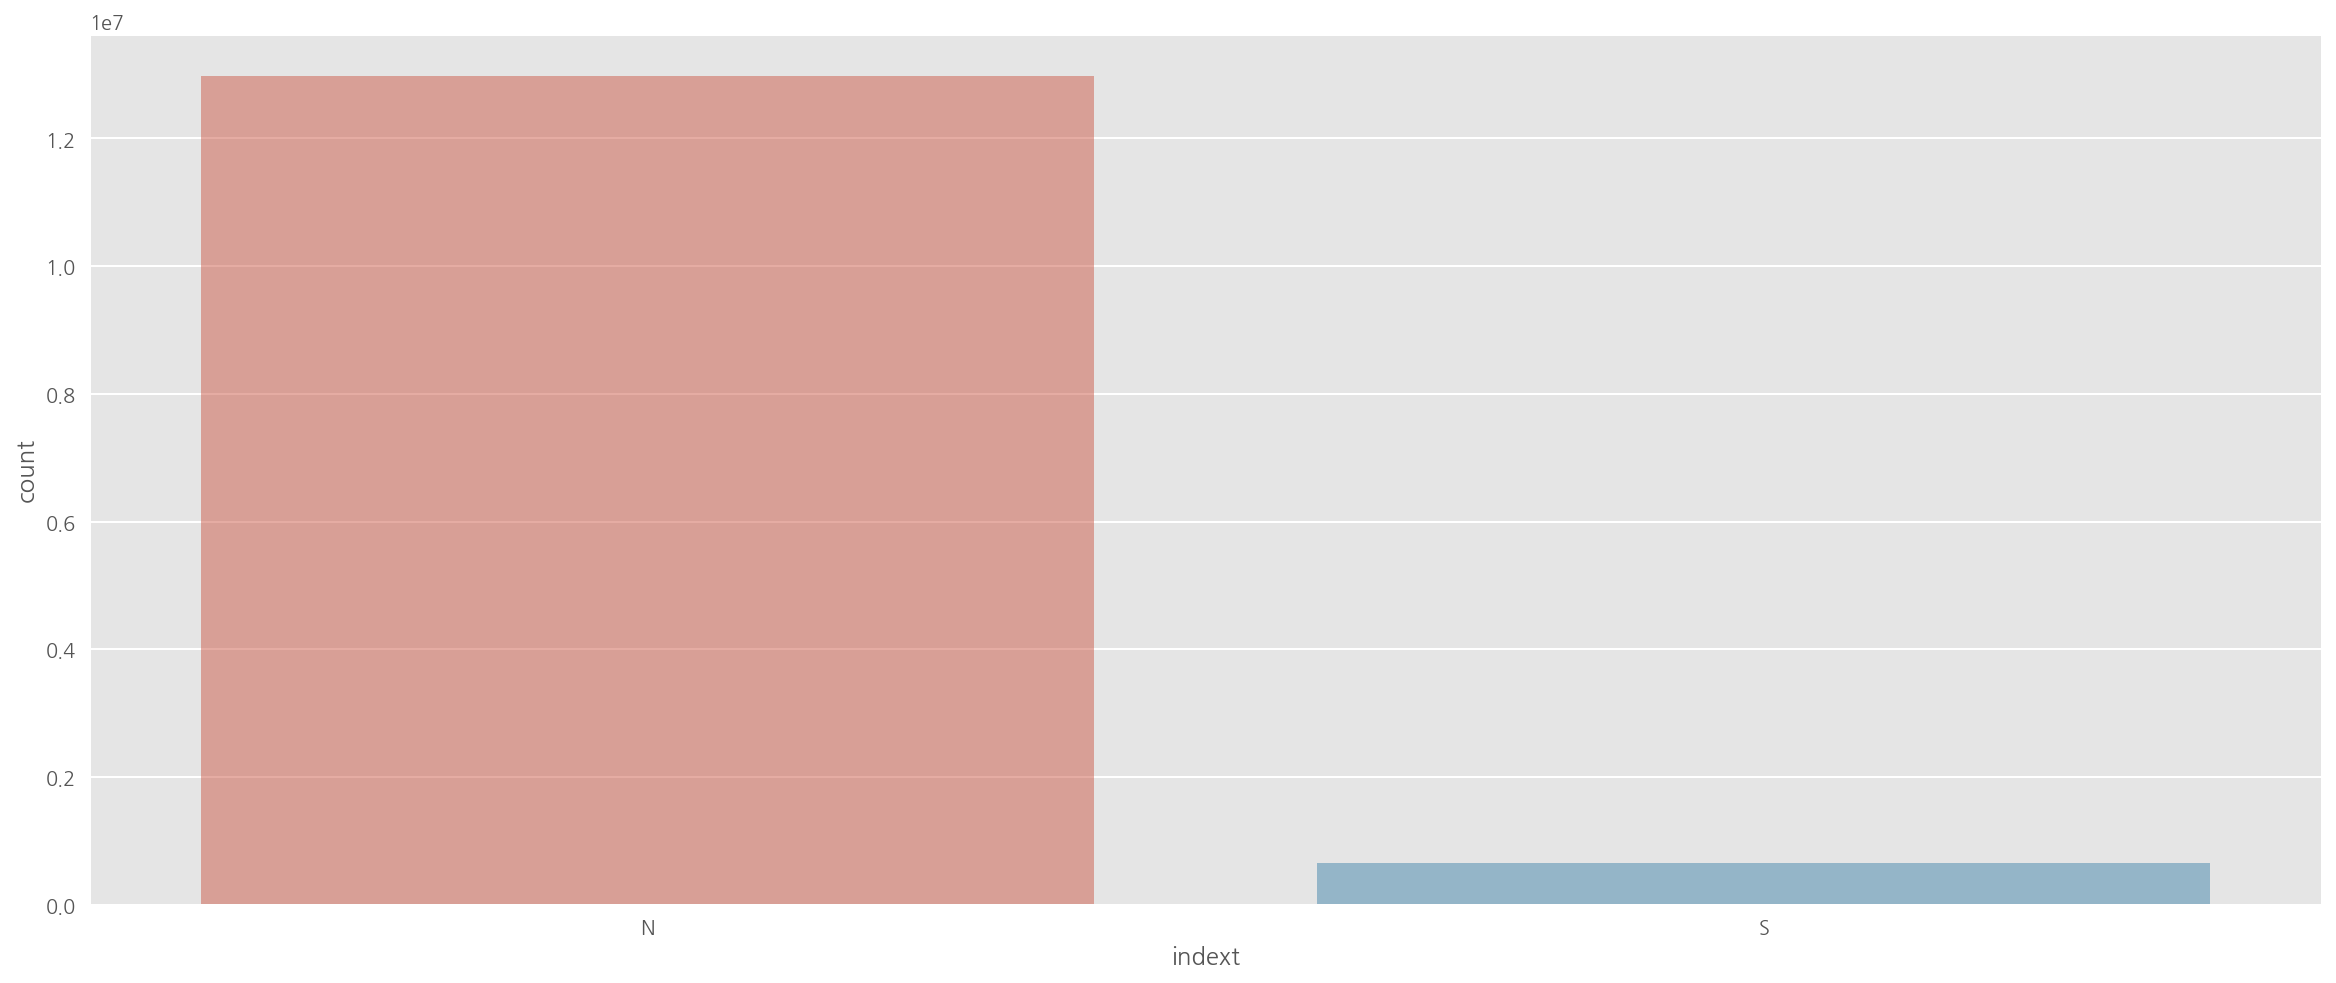

--------------------------------------------------
col :  conyuemp


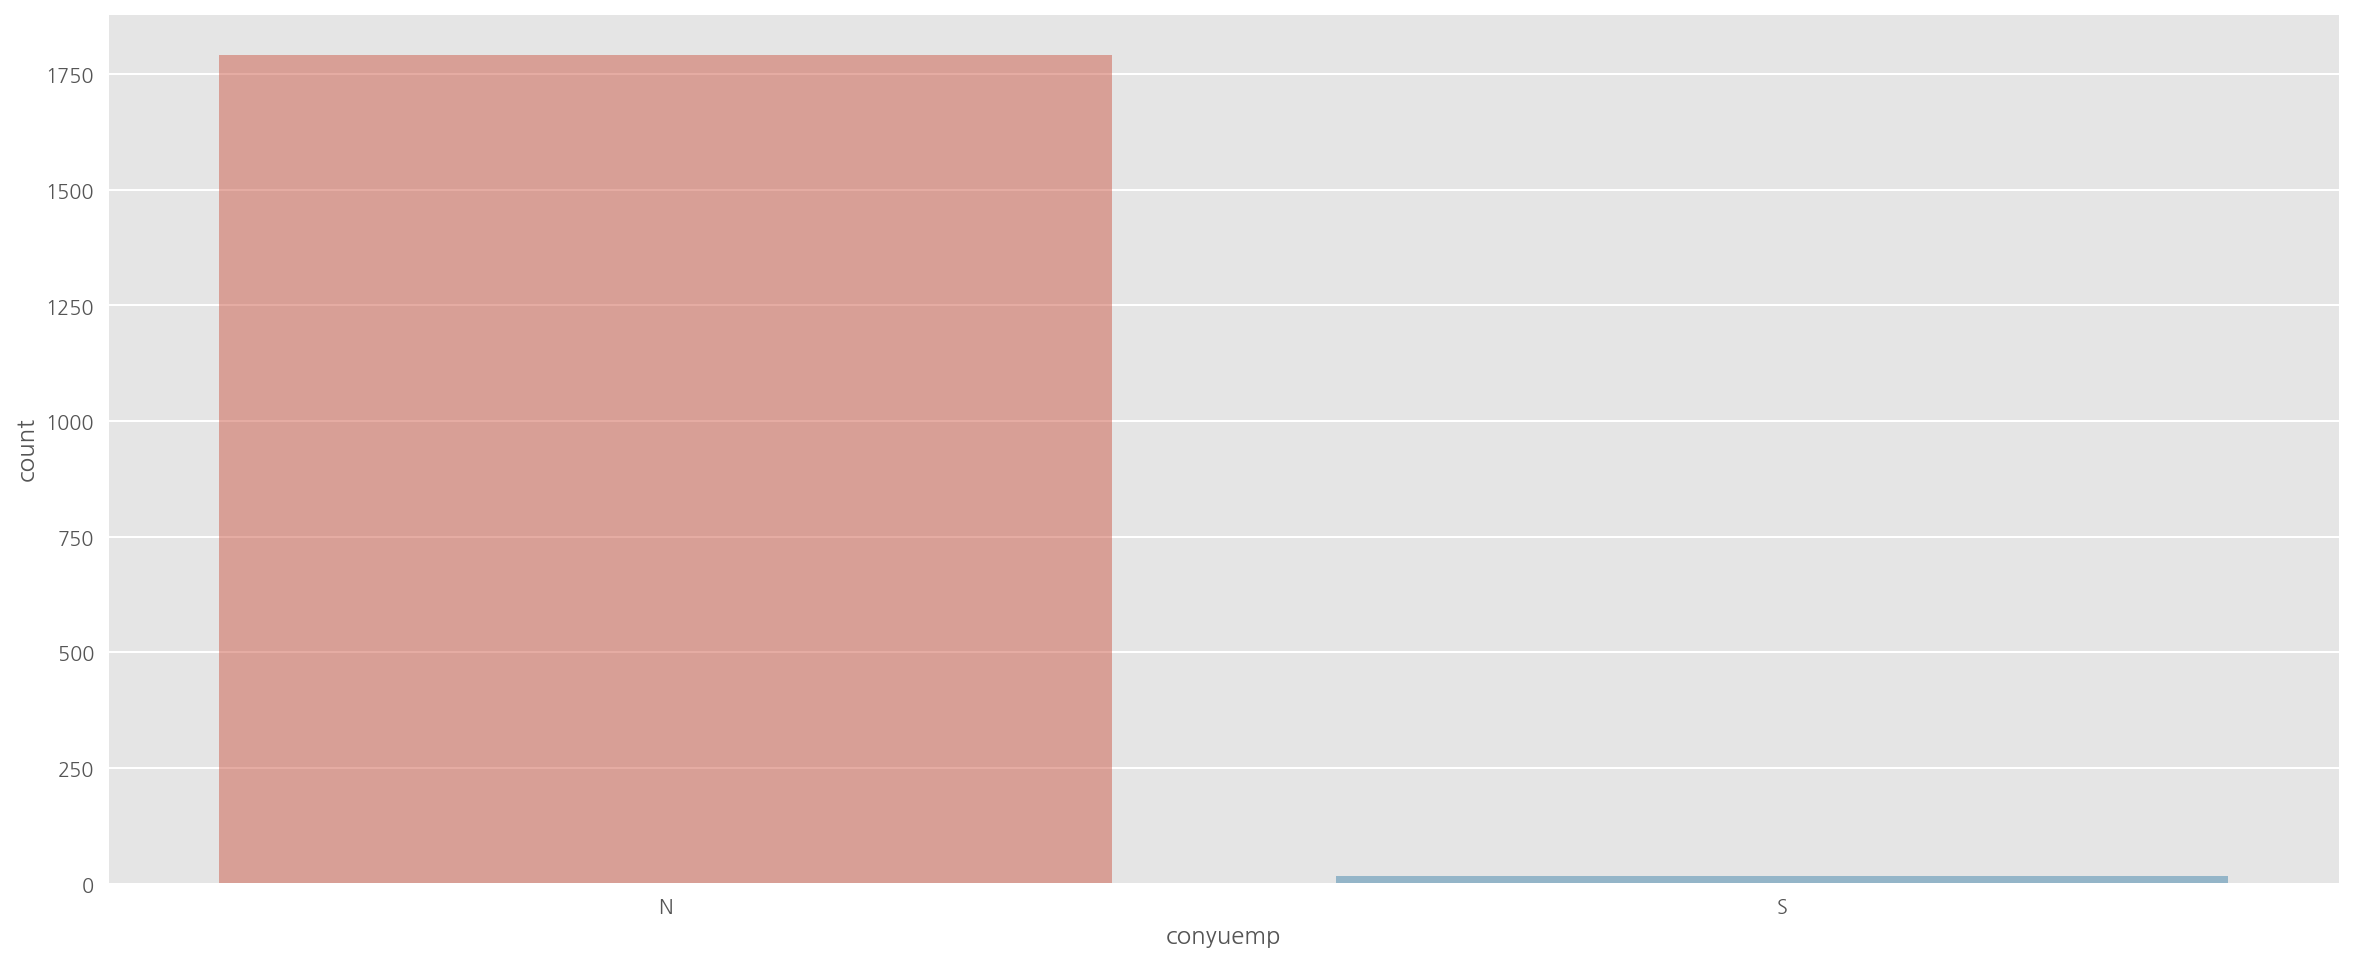

--------------------------------------------------
col :  canal_entrada


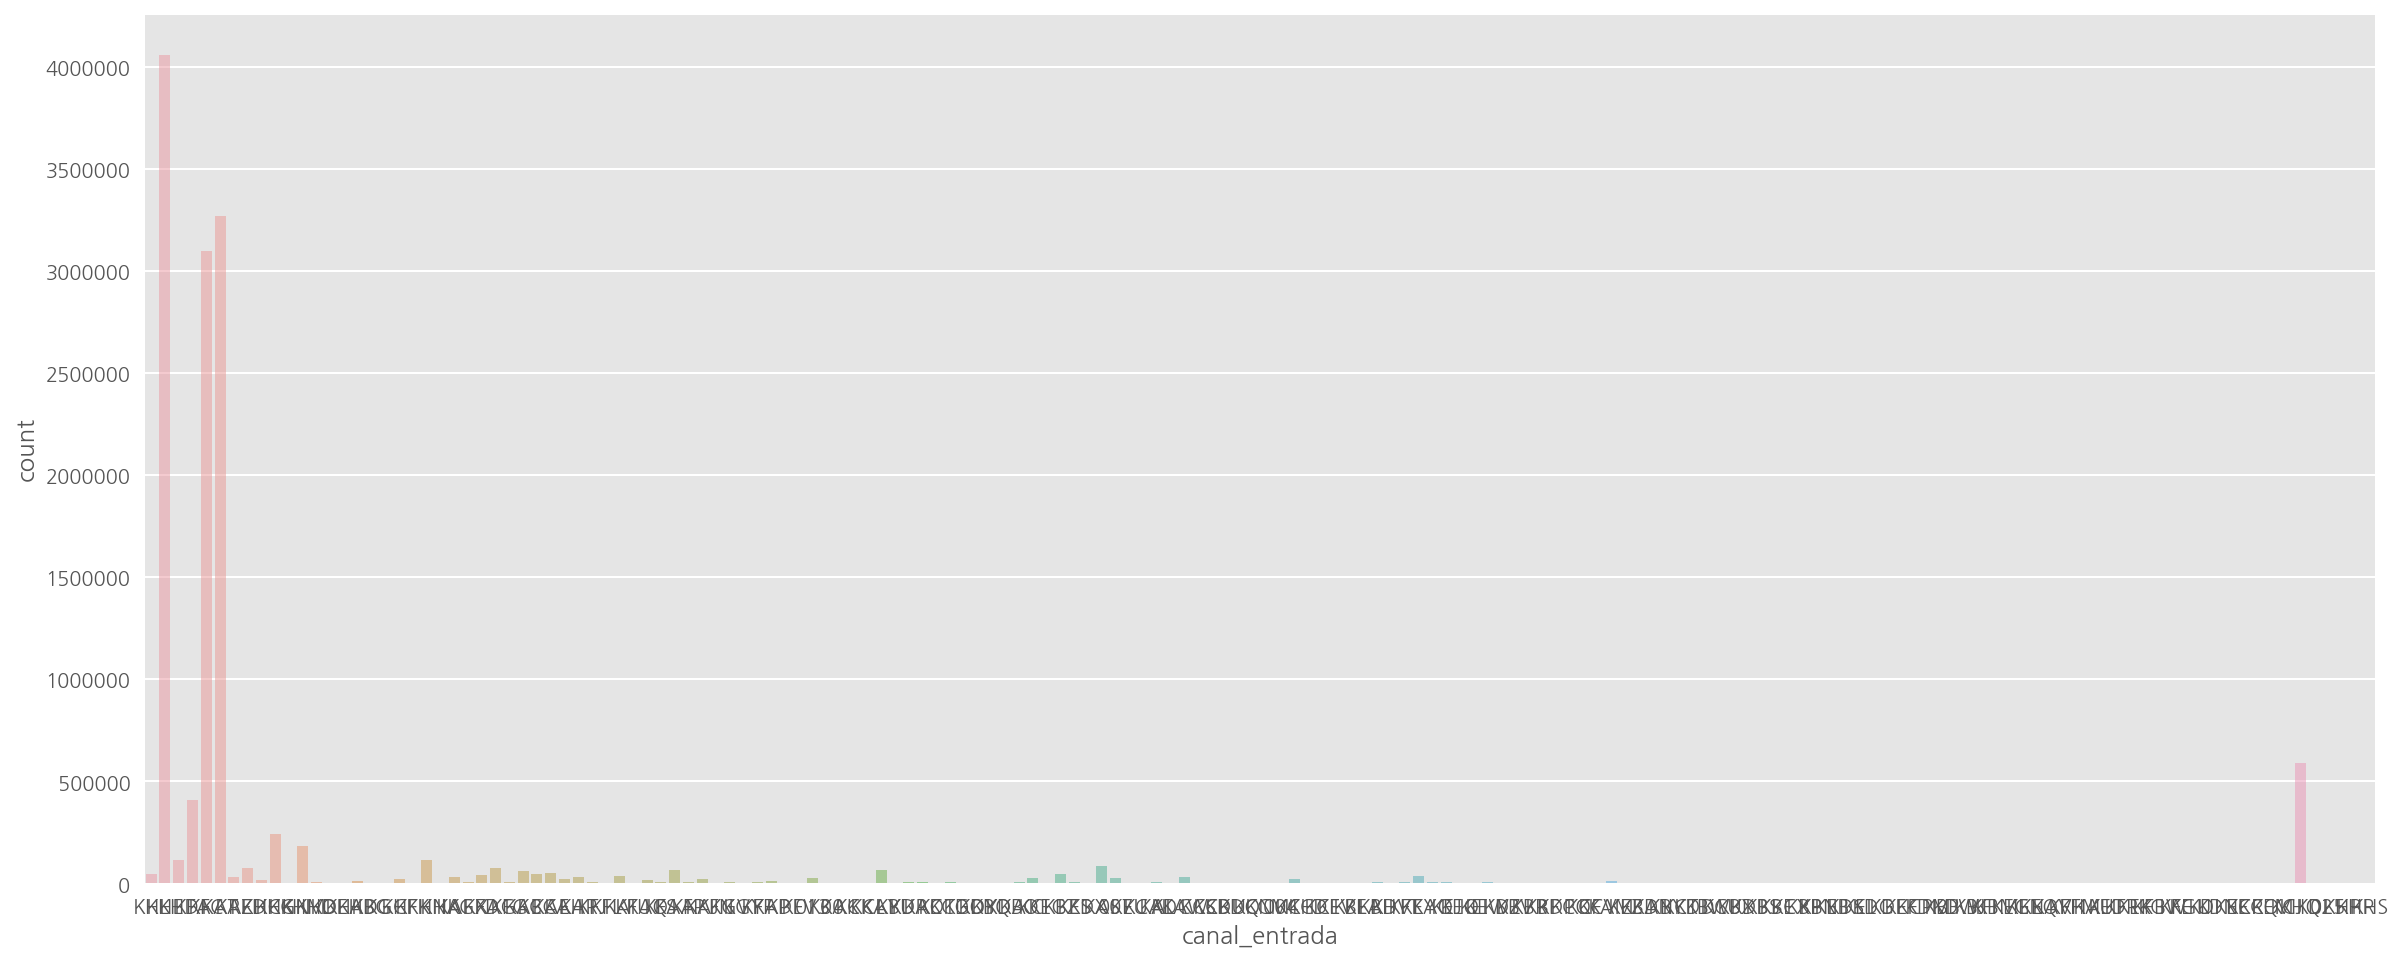

--------------------------------------------------
col :  indfall


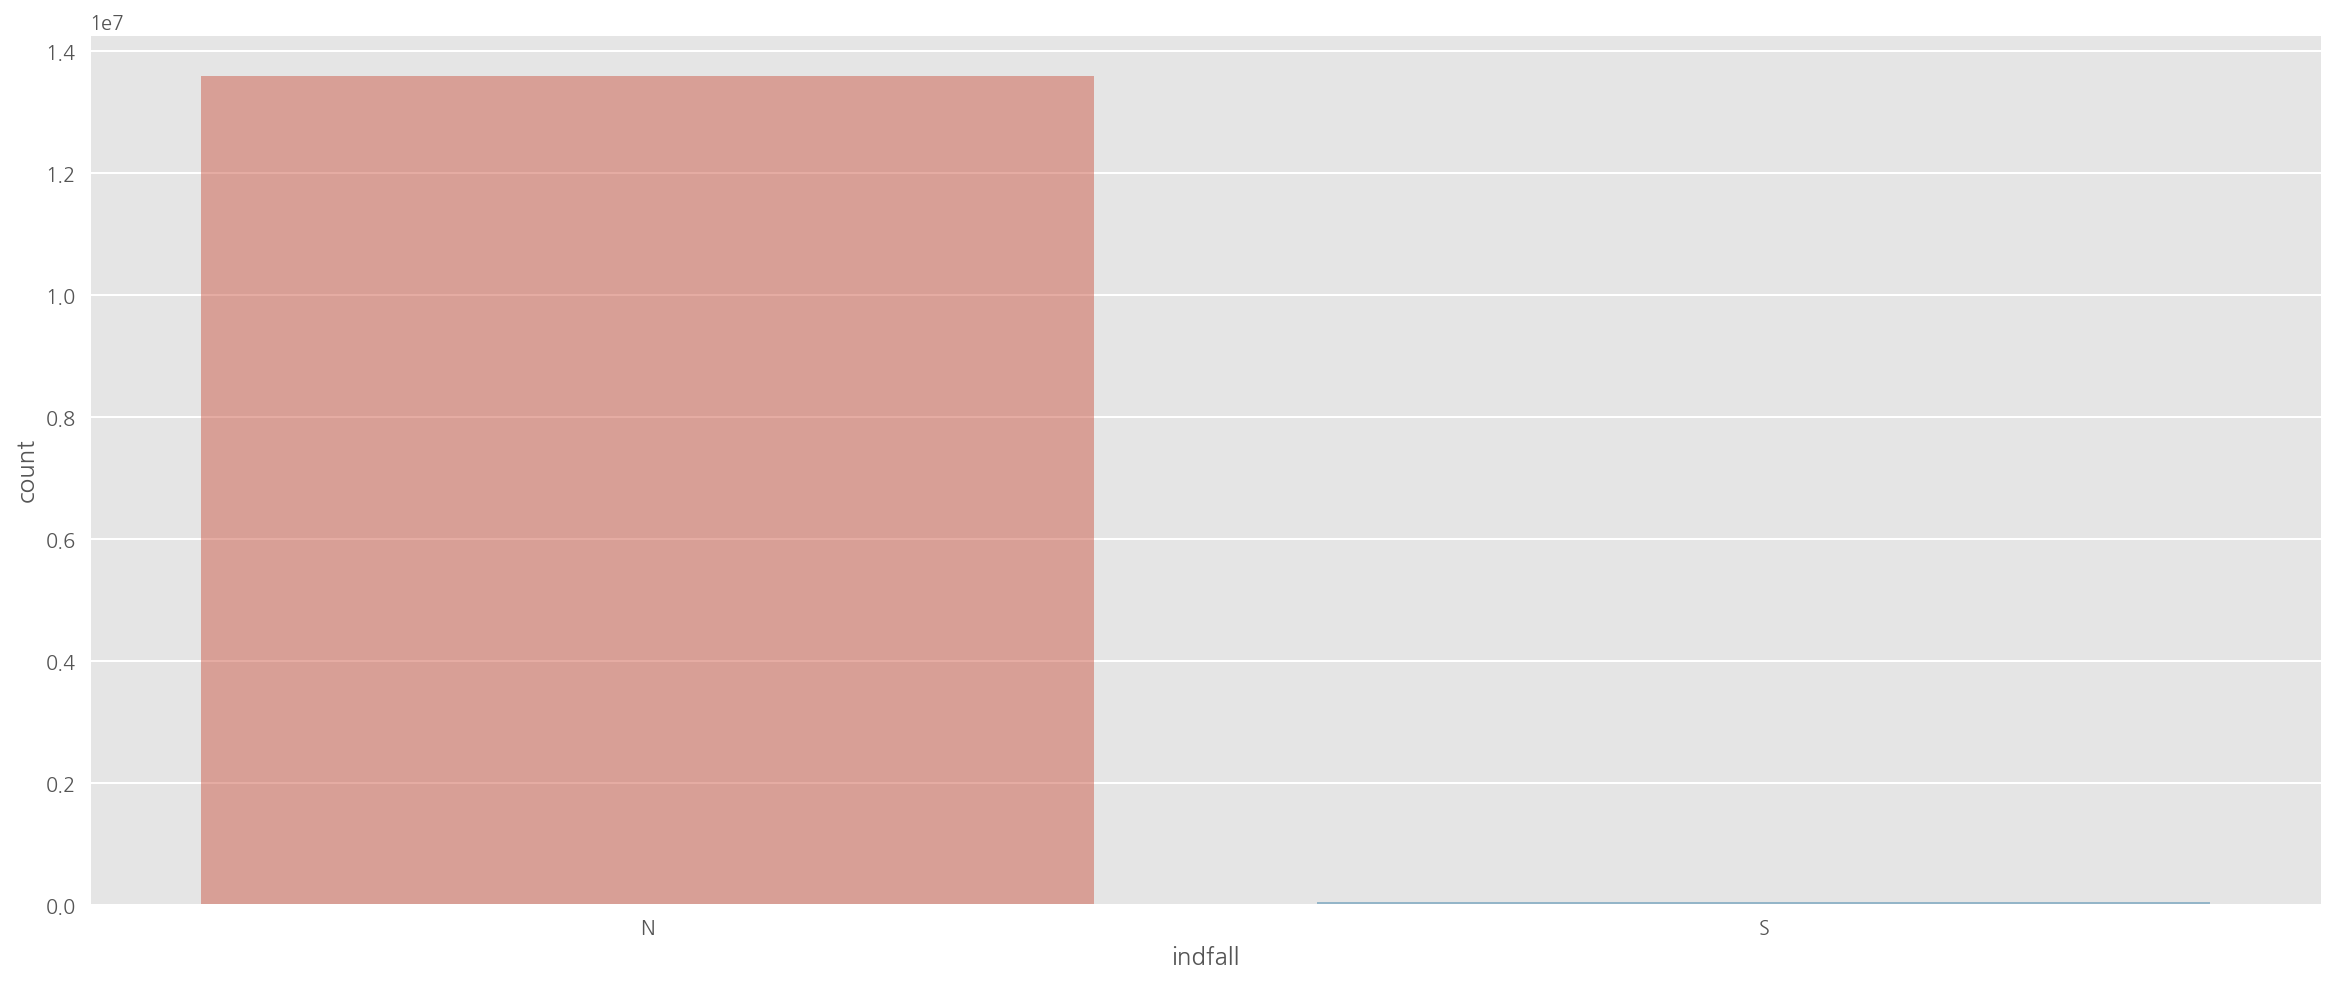

--------------------------------------------------
col :  tipodom


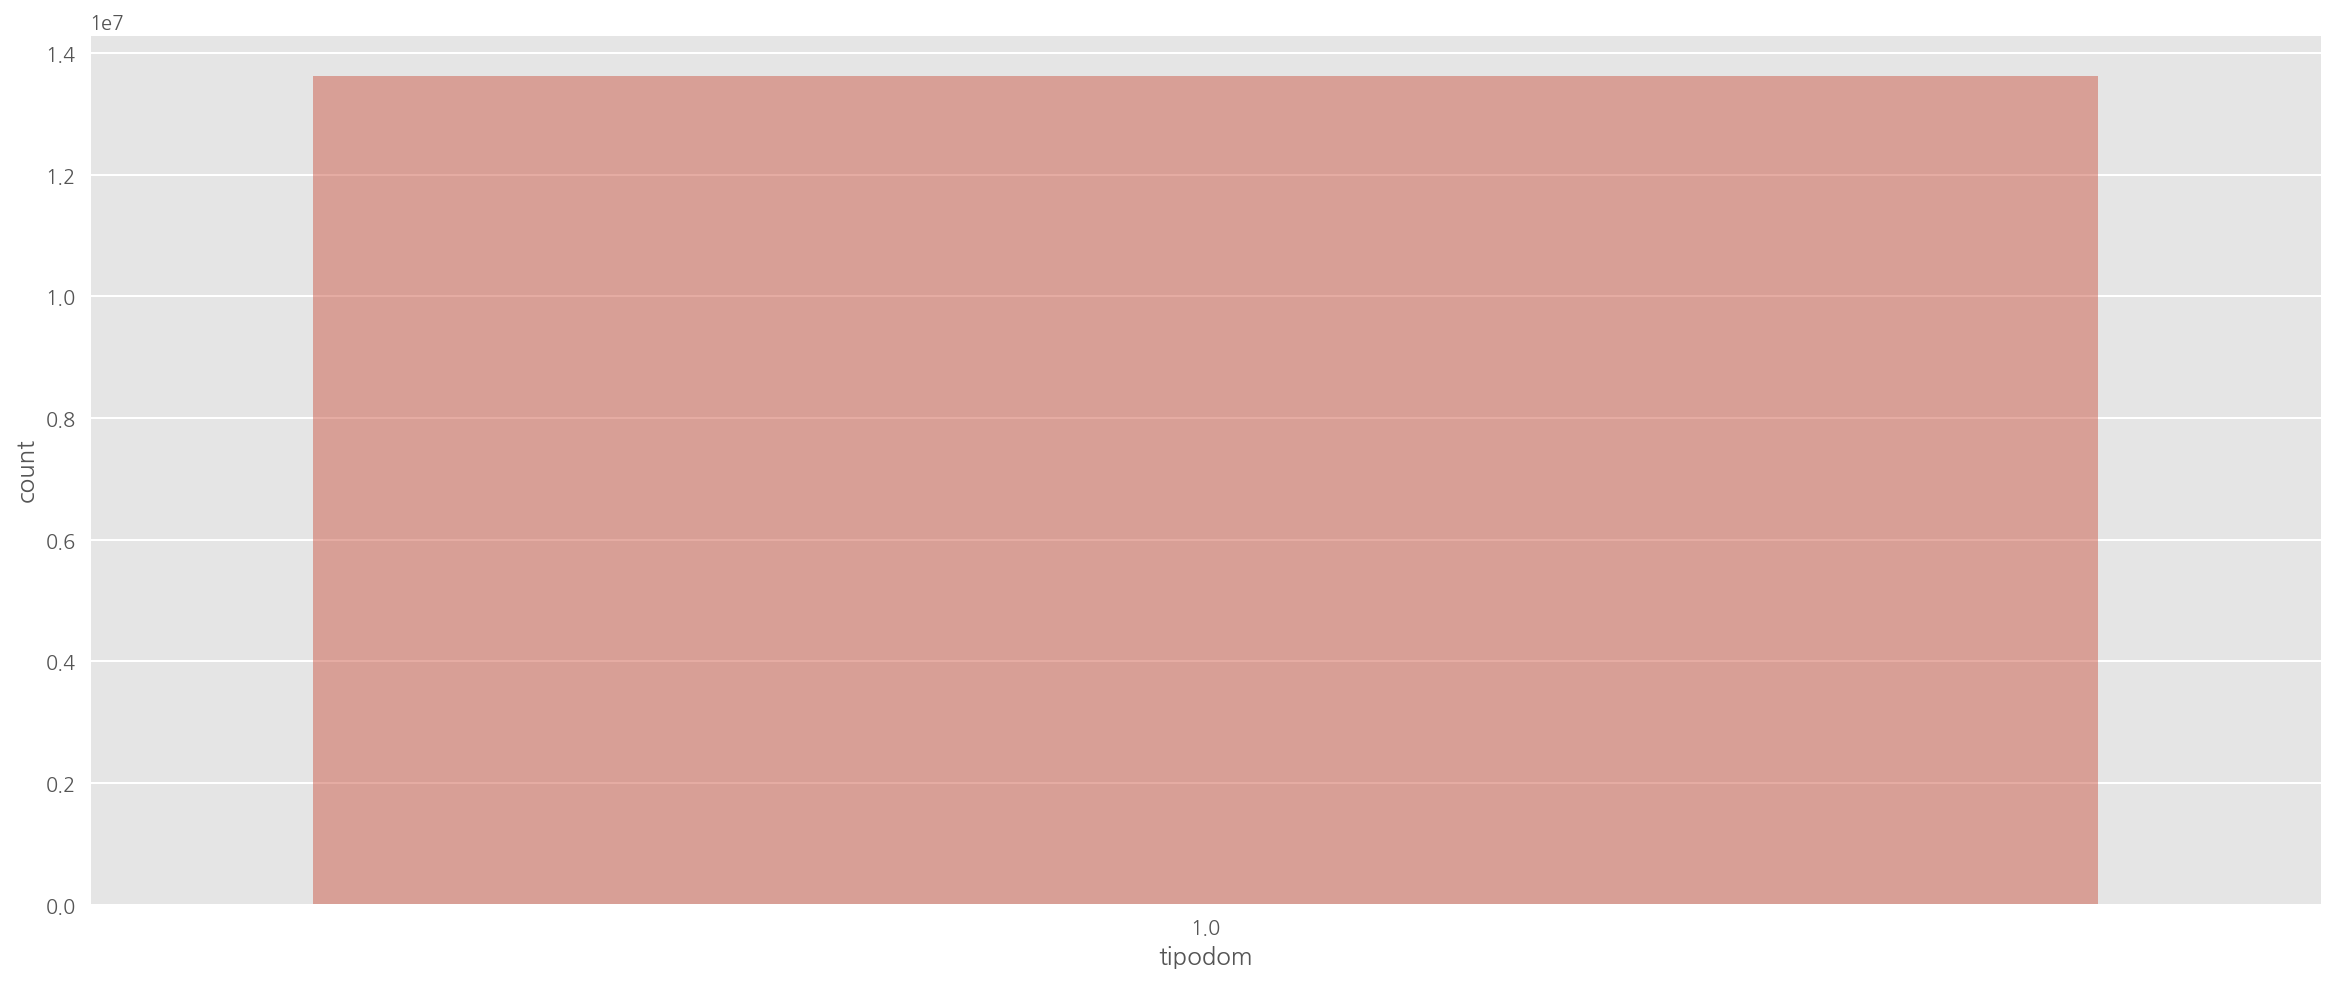

--------------------------------------------------
col :  cod_prov


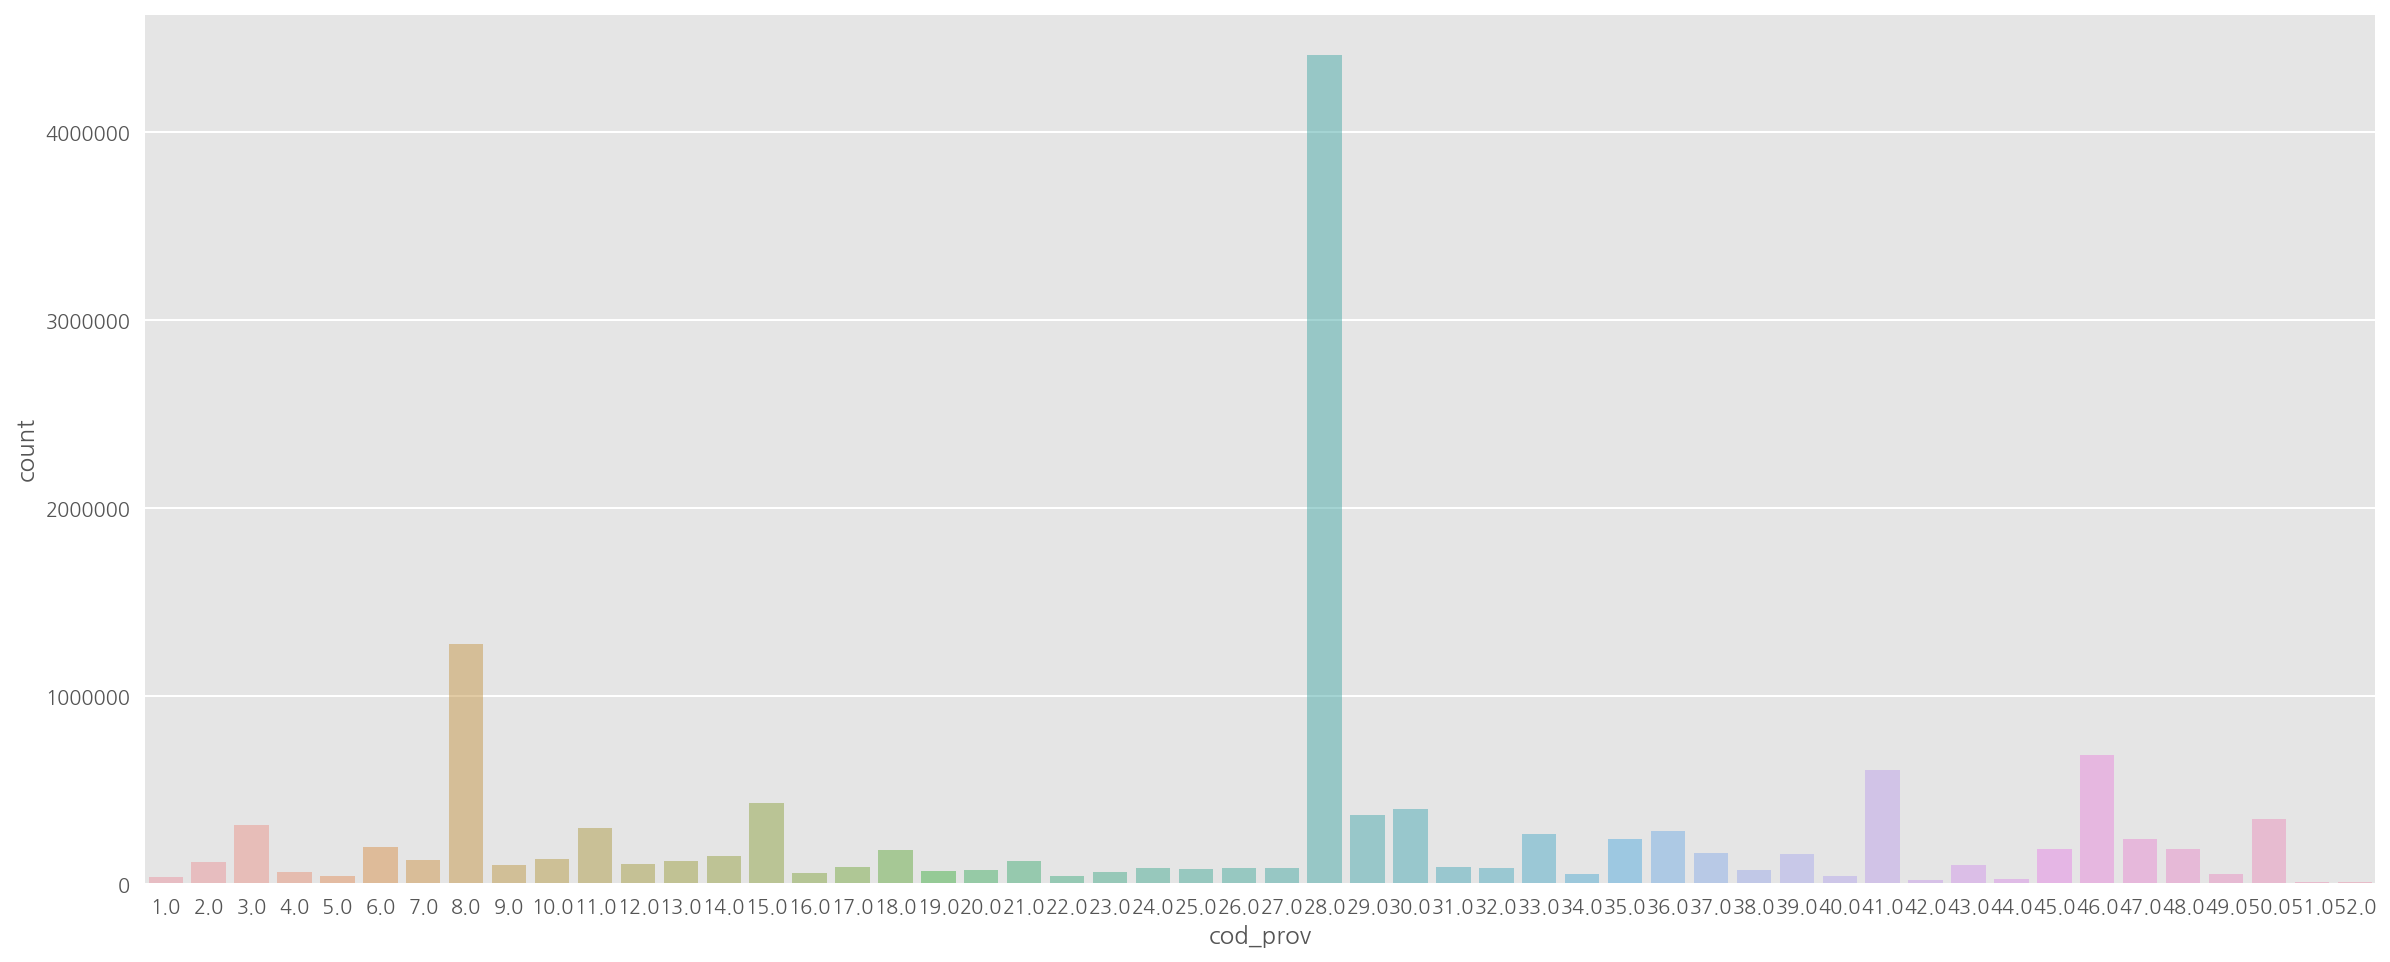

--------------------------------------------------
col :  nomprov


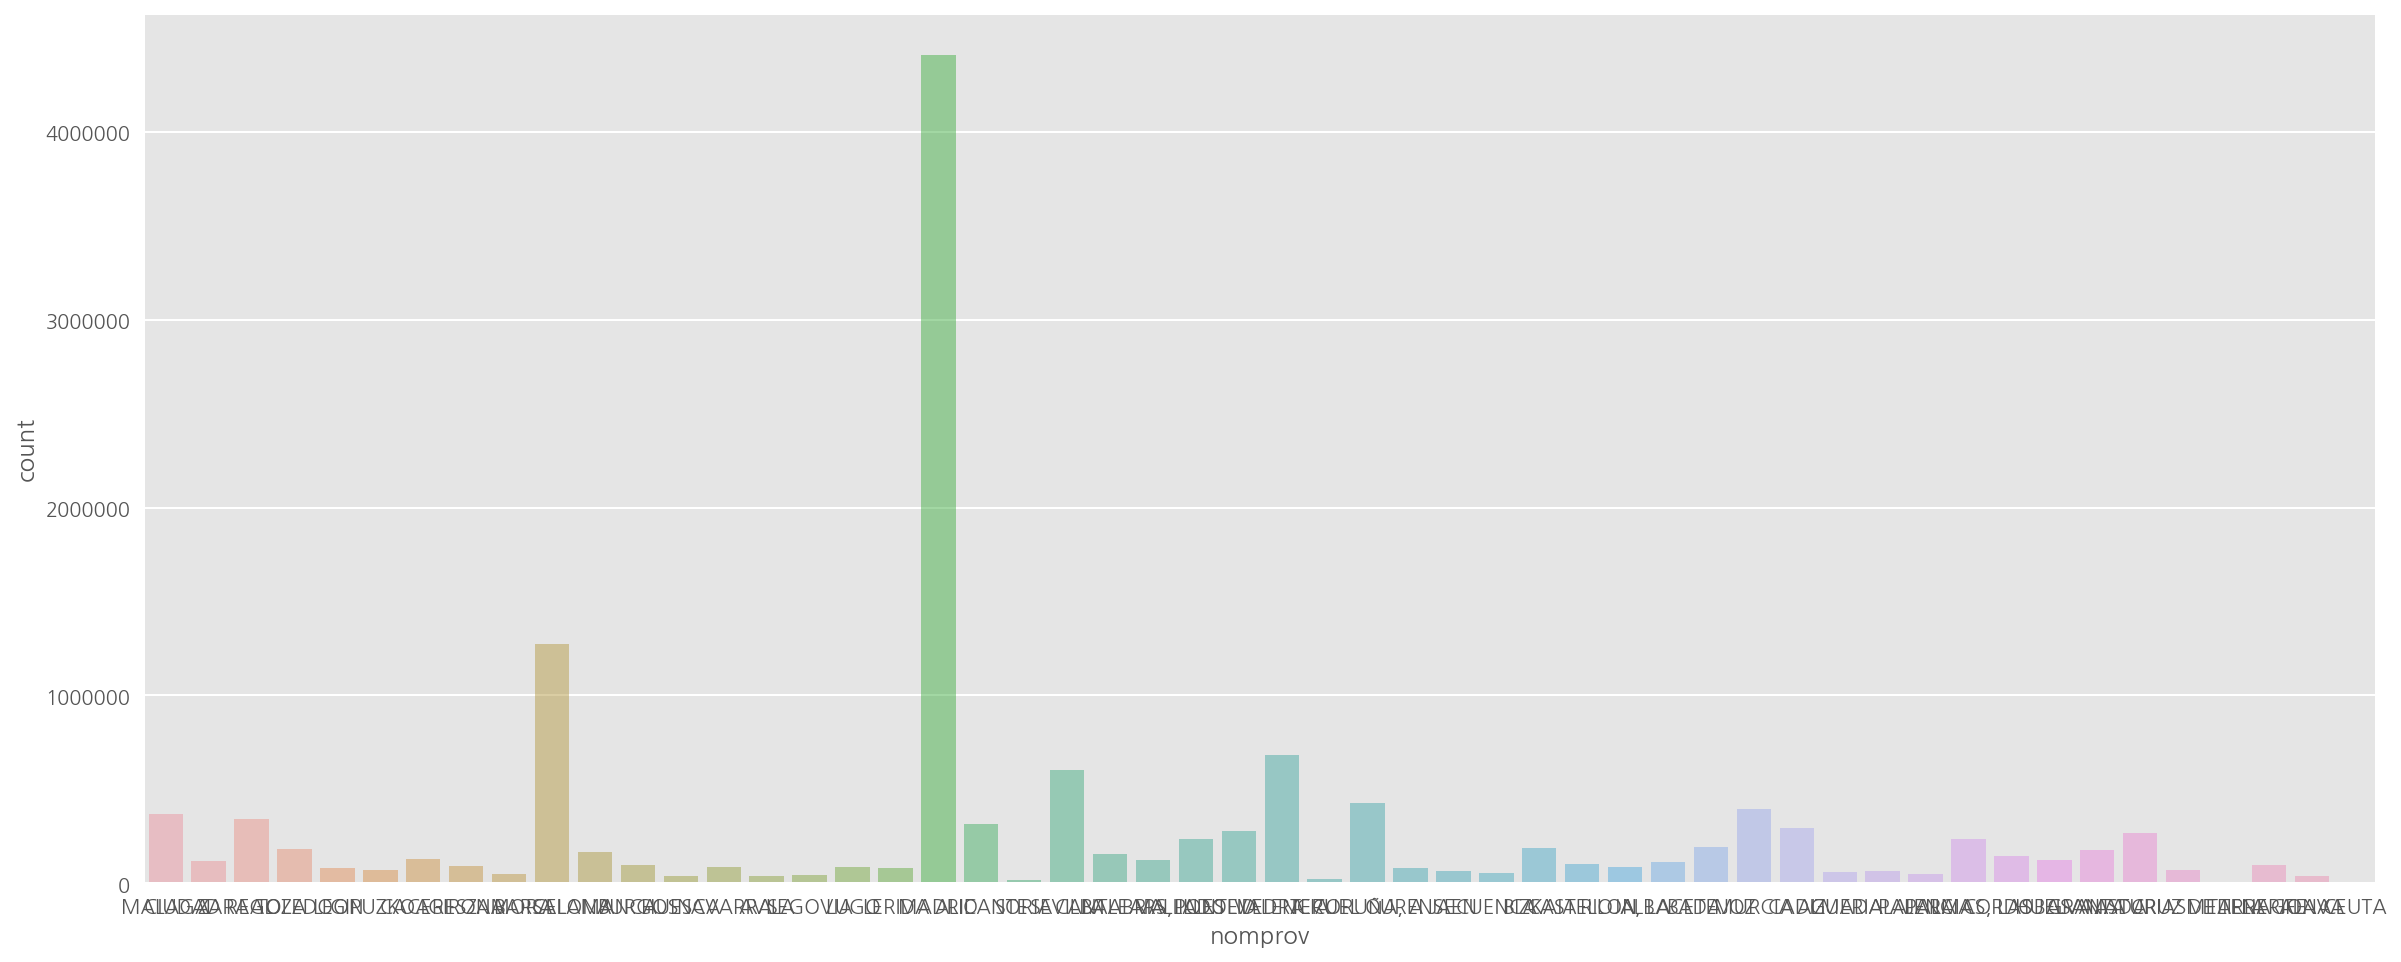

--------------------------------------------------
col :  ind_actividad_cliente


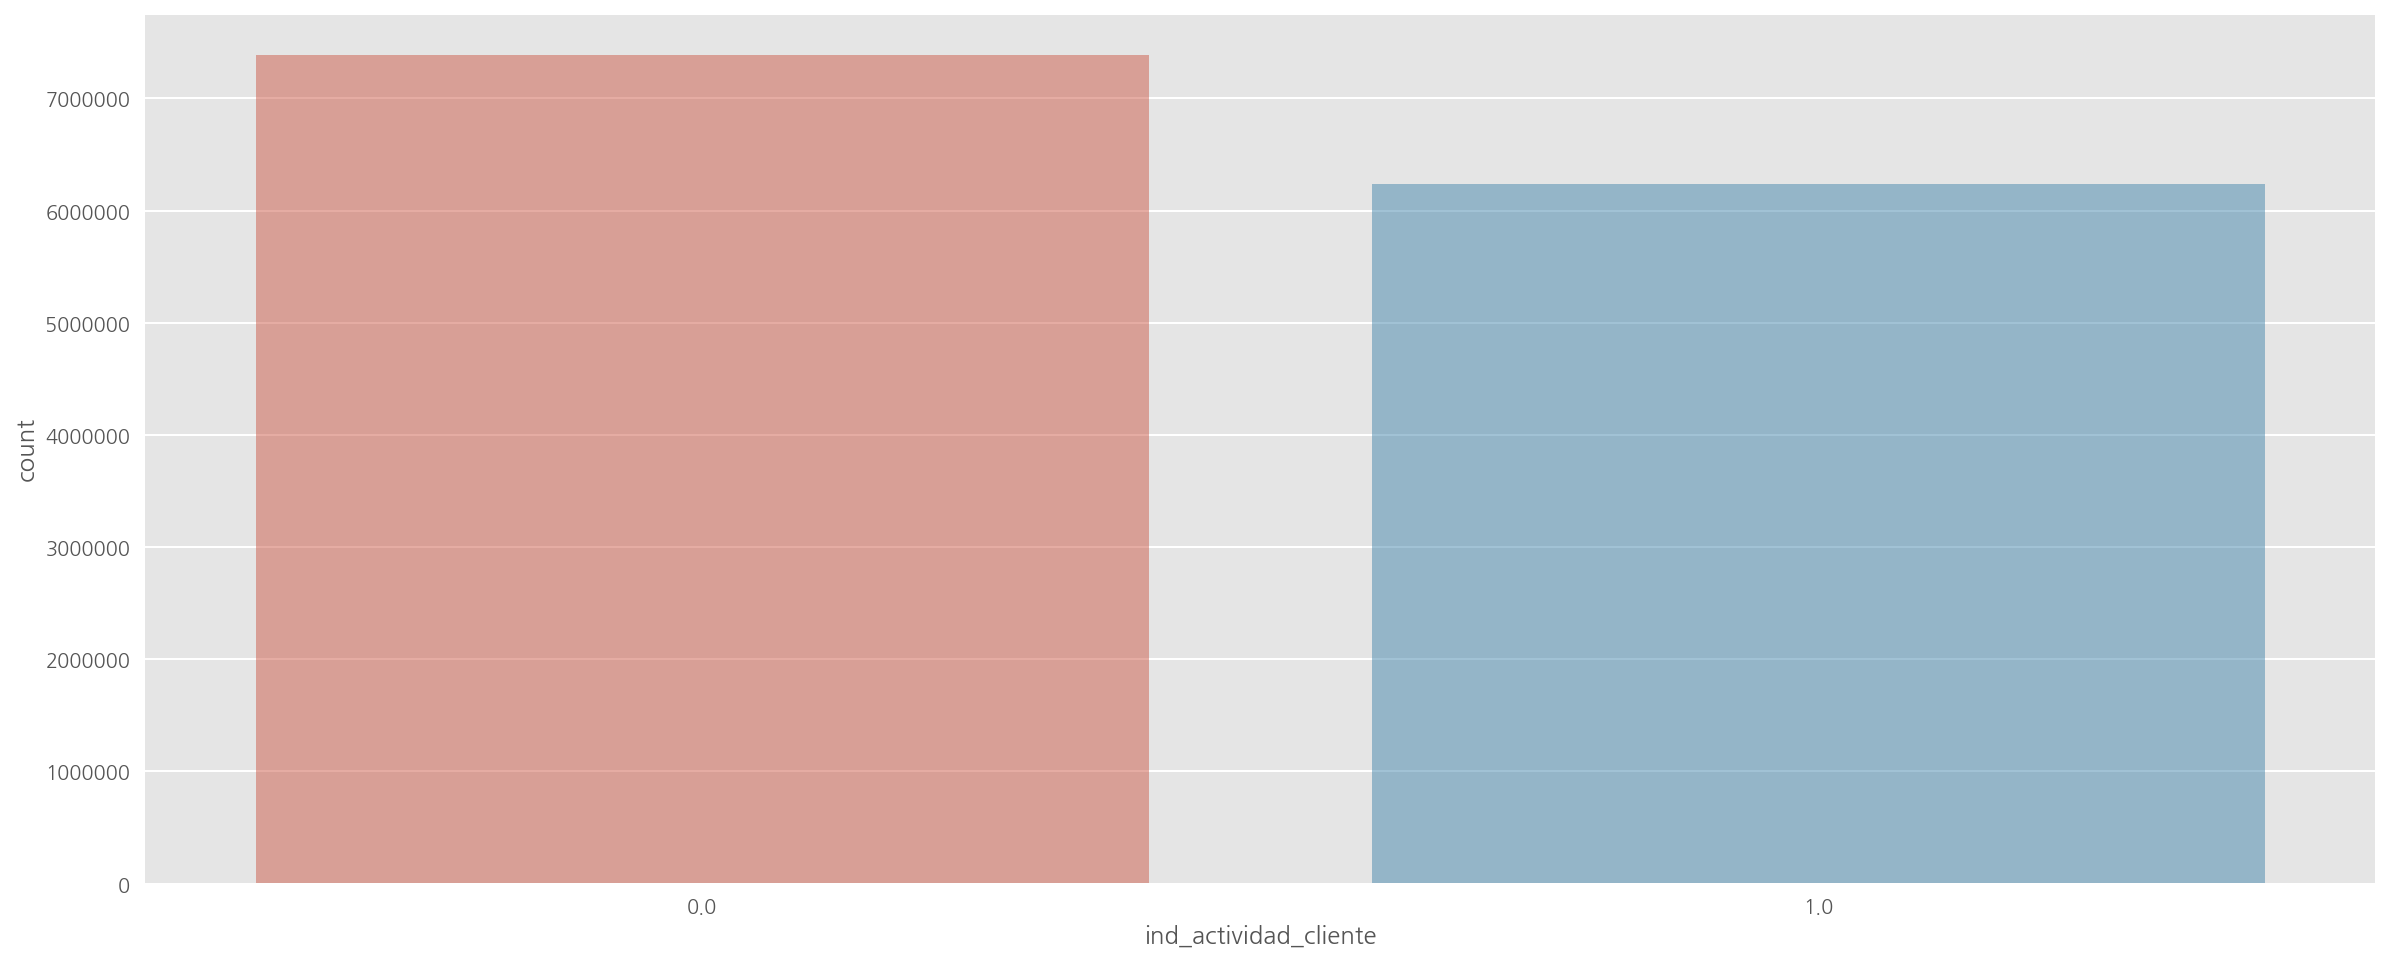

--------------------------------------------------
col :  segmento


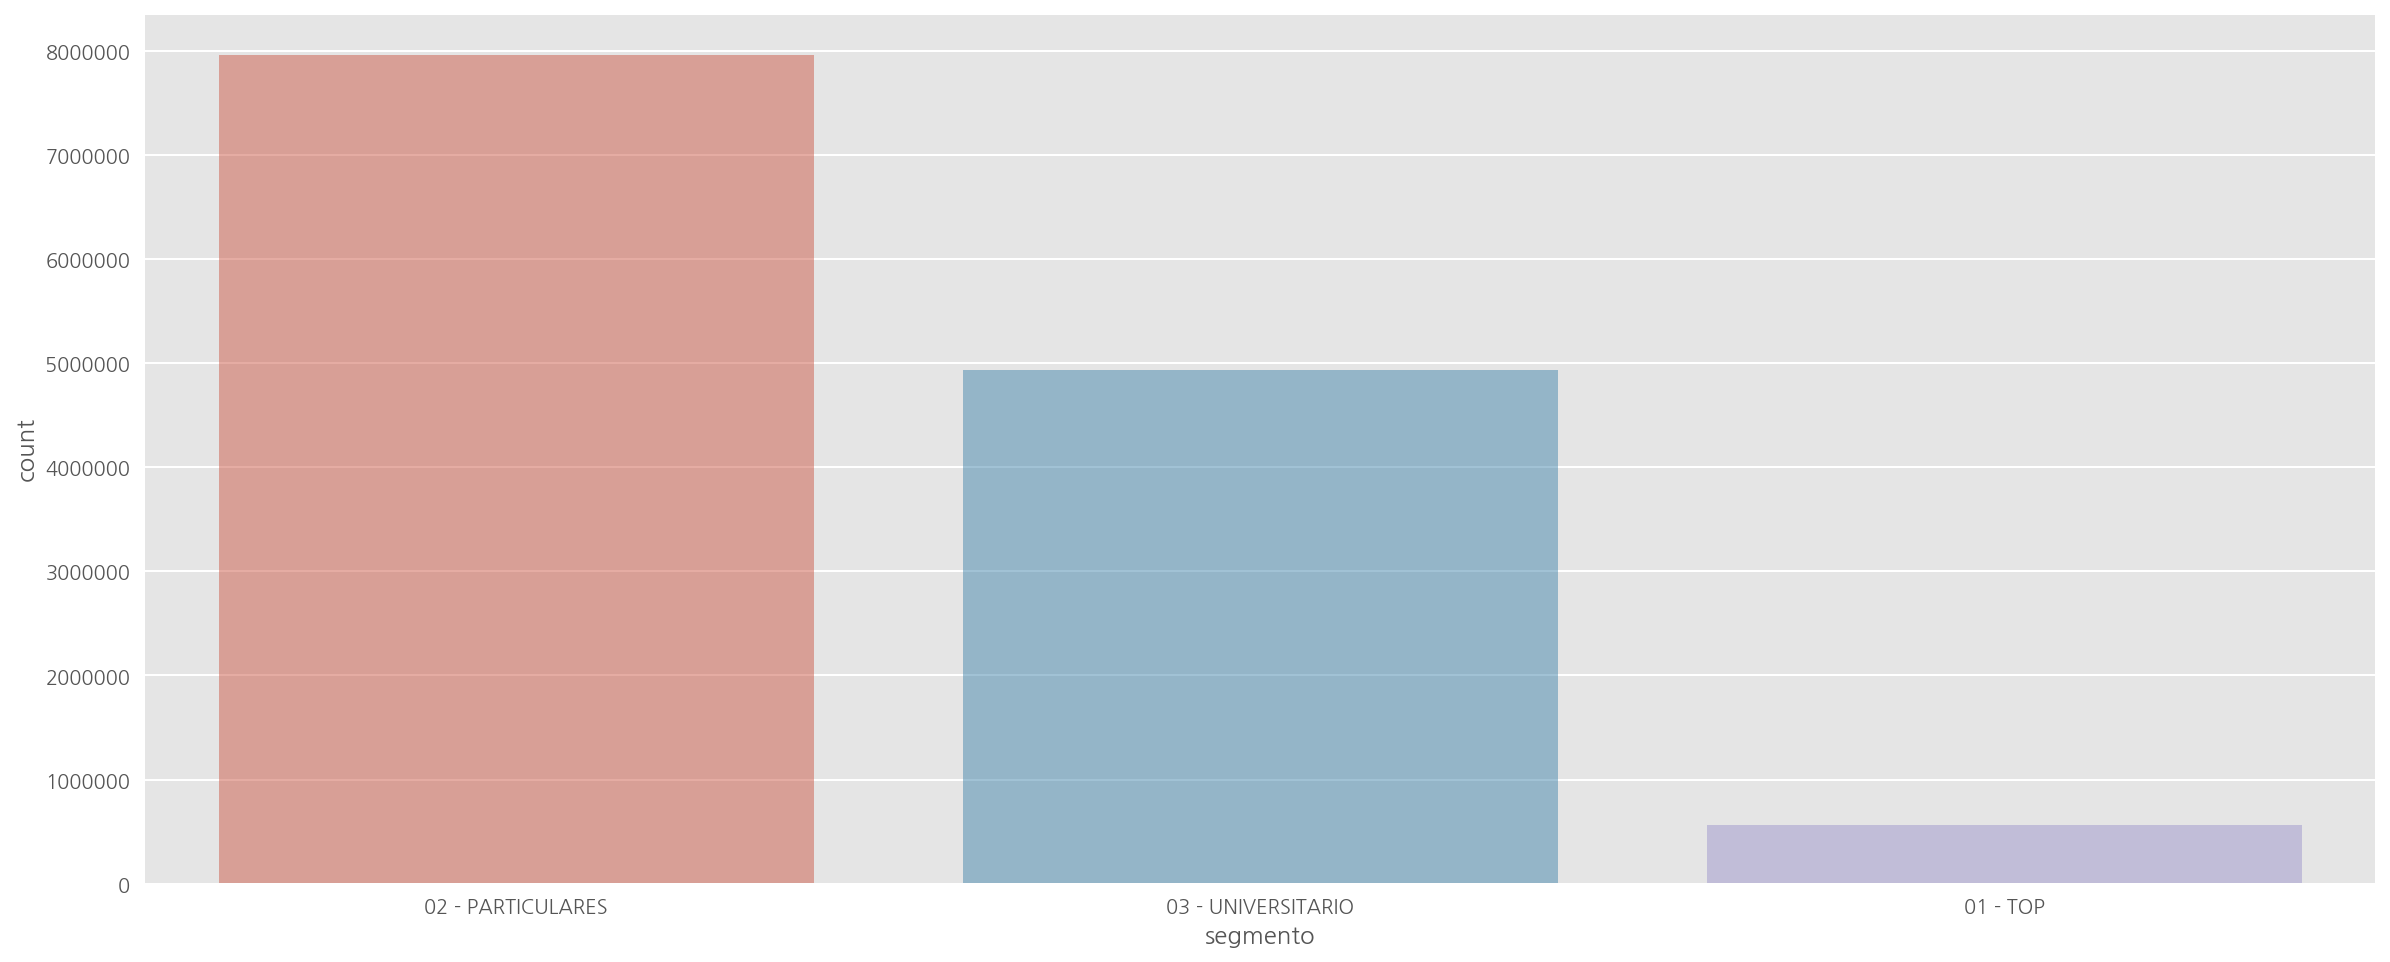

--------------------------------------------------
col :  ind_ahor_fin_ult1


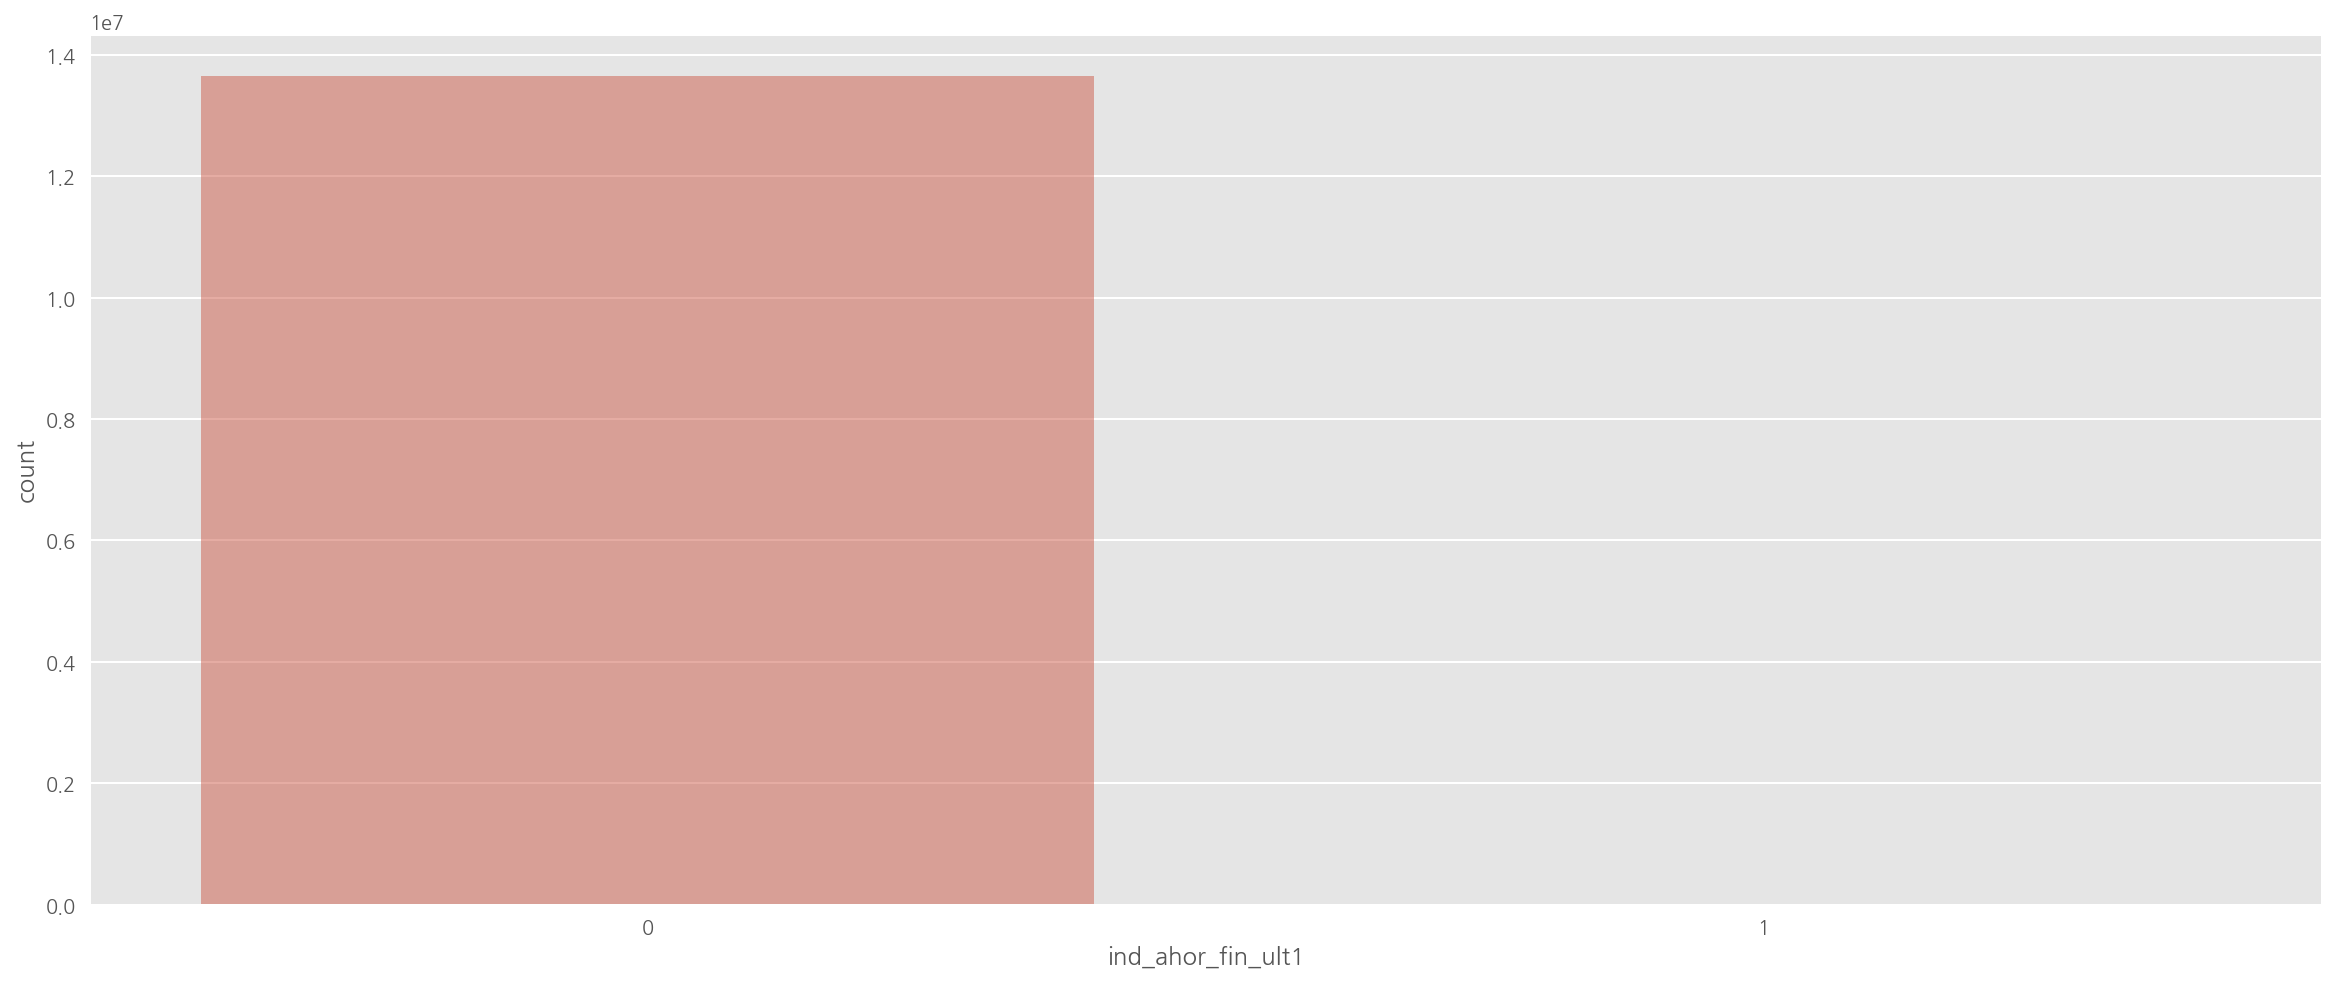

--------------------------------------------------
col :  ind_aval_fin_ult1


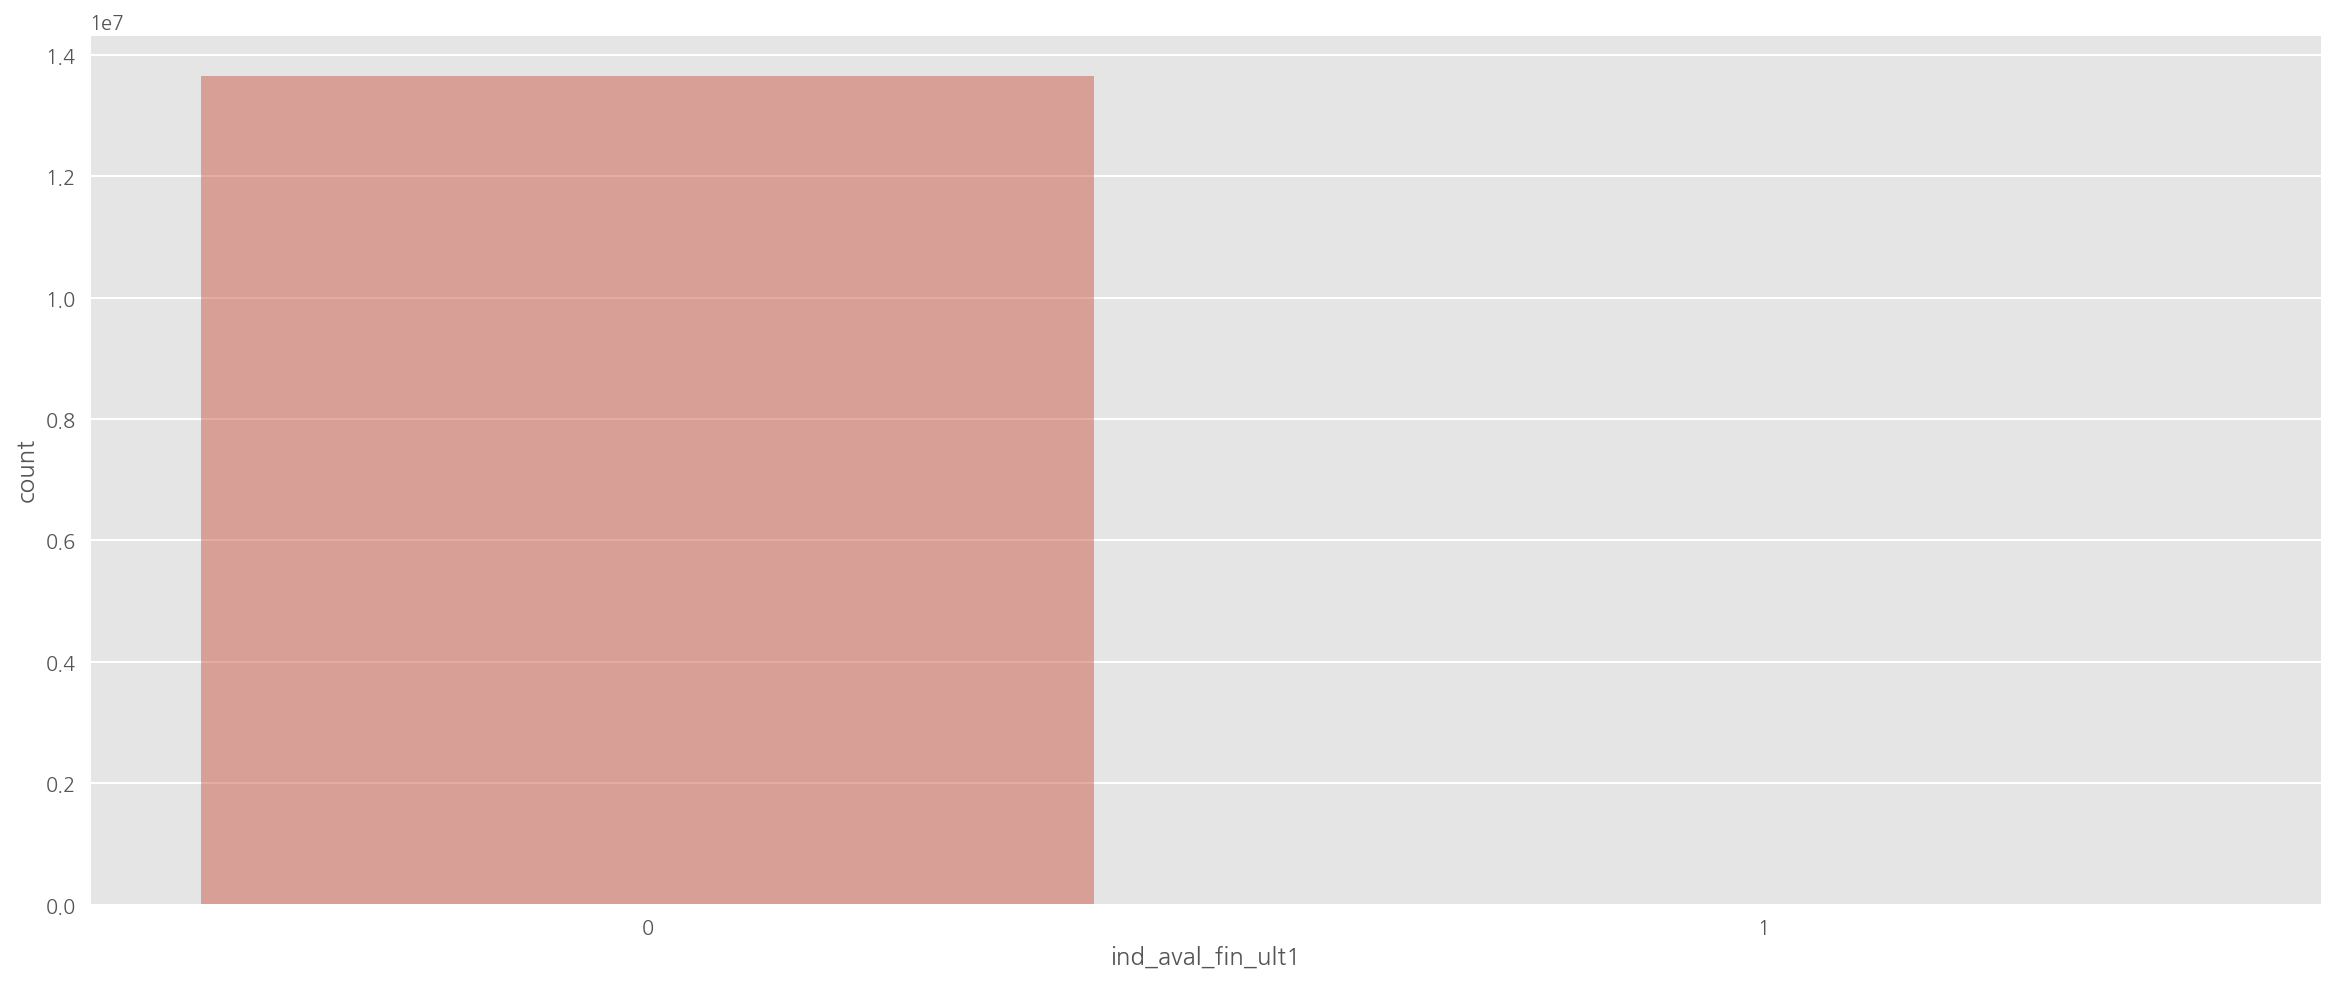

--------------------------------------------------
col :  ind_cco_fin_ult1


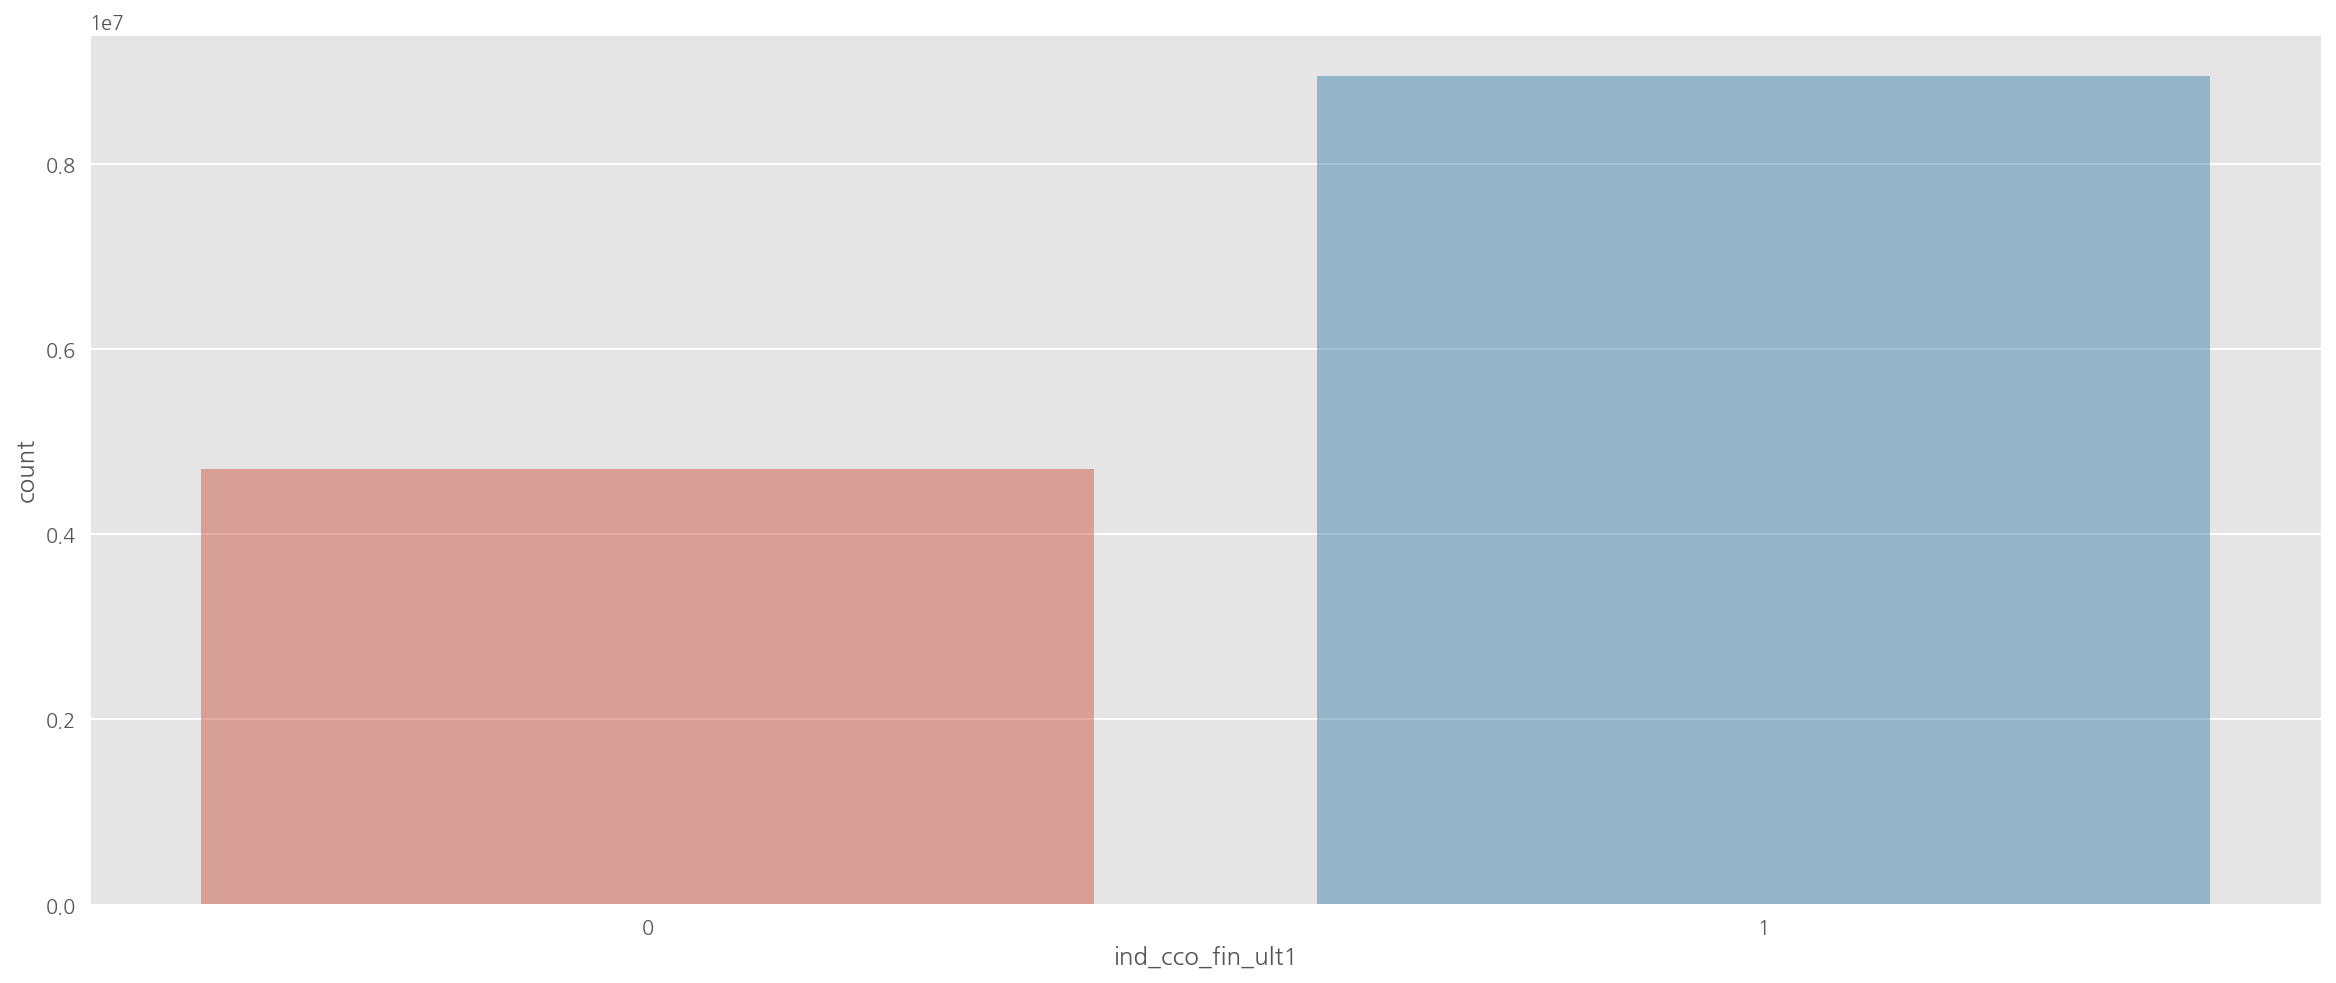

--------------------------------------------------
col :  ind_cder_fin_ult1


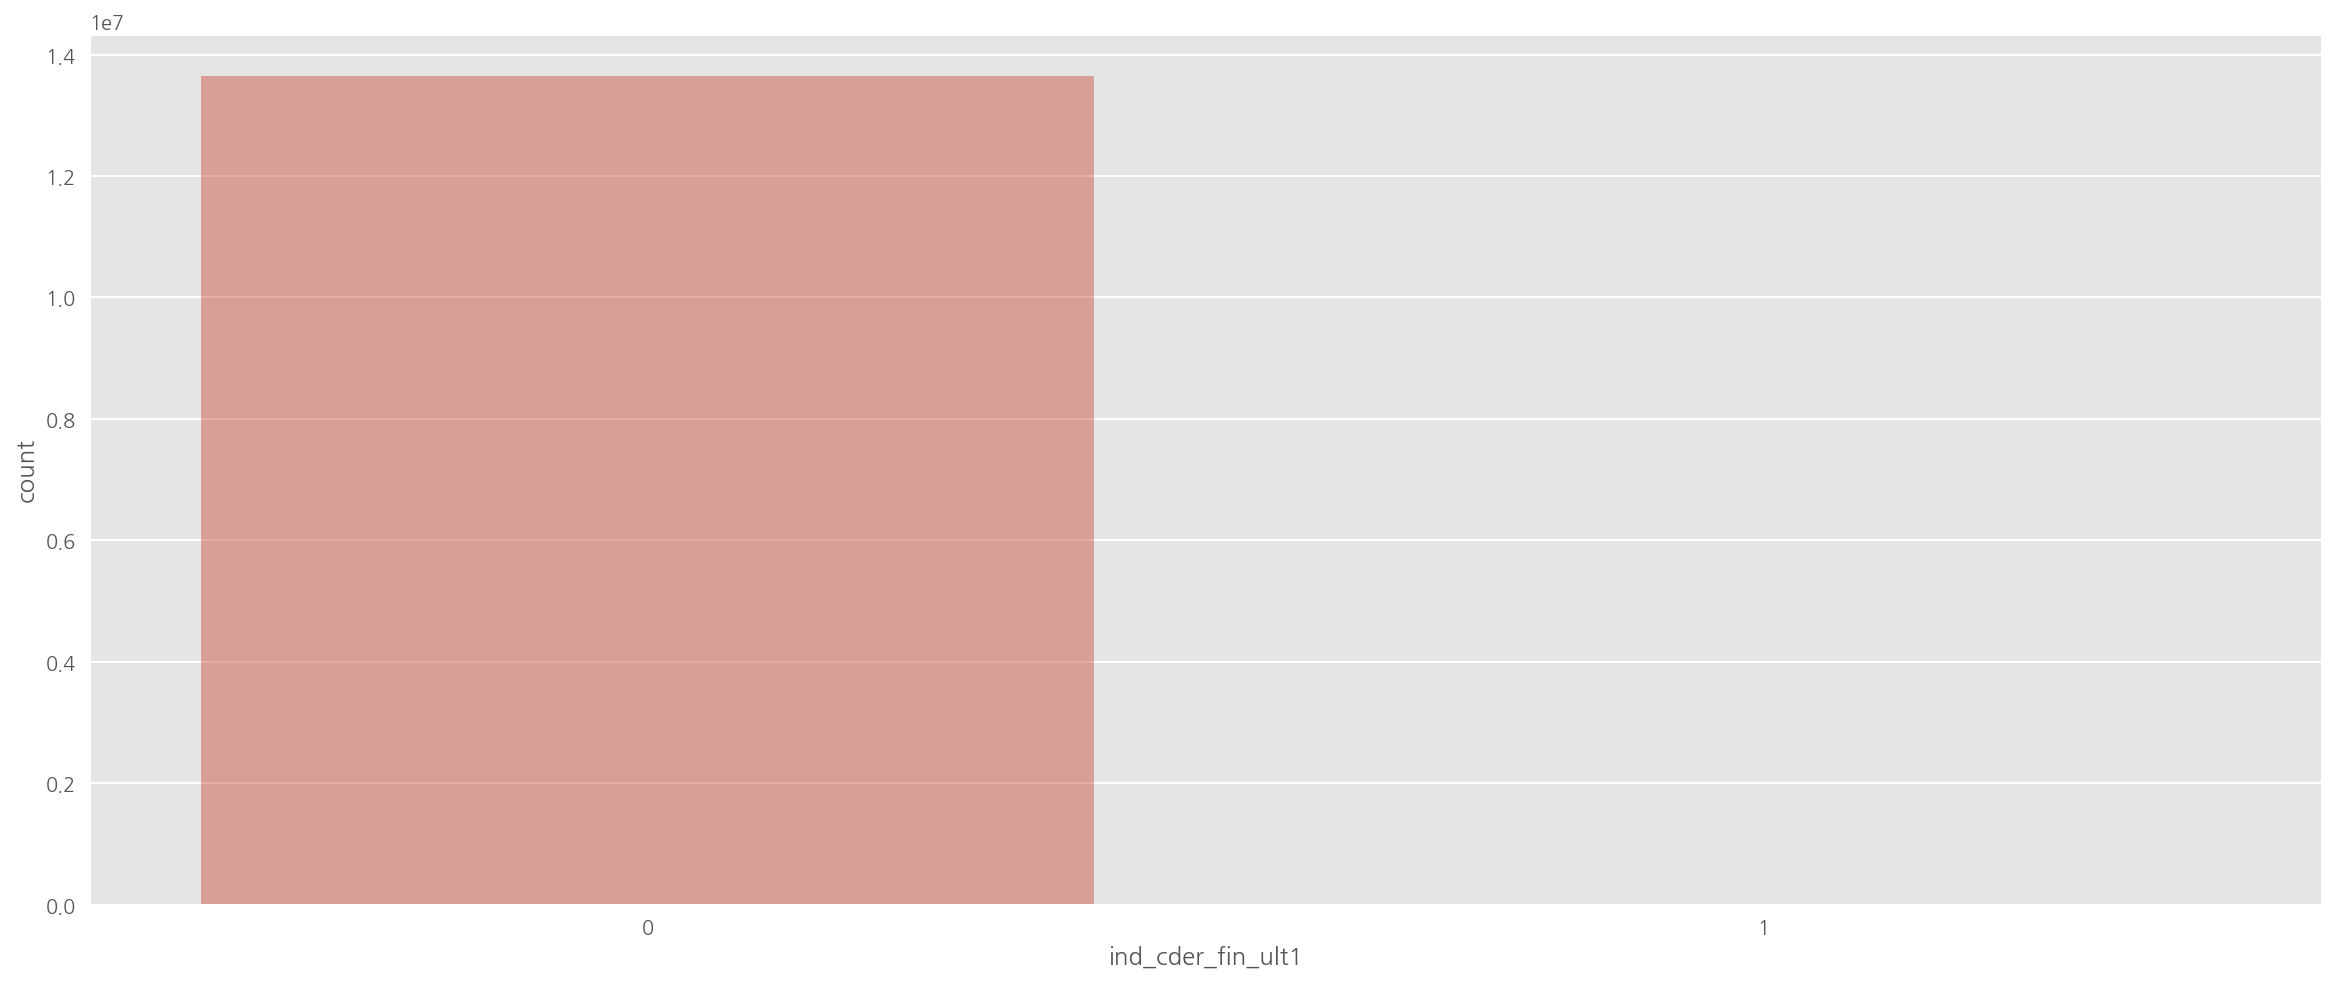

--------------------------------------------------
col :  ind_cno_fin_ult1


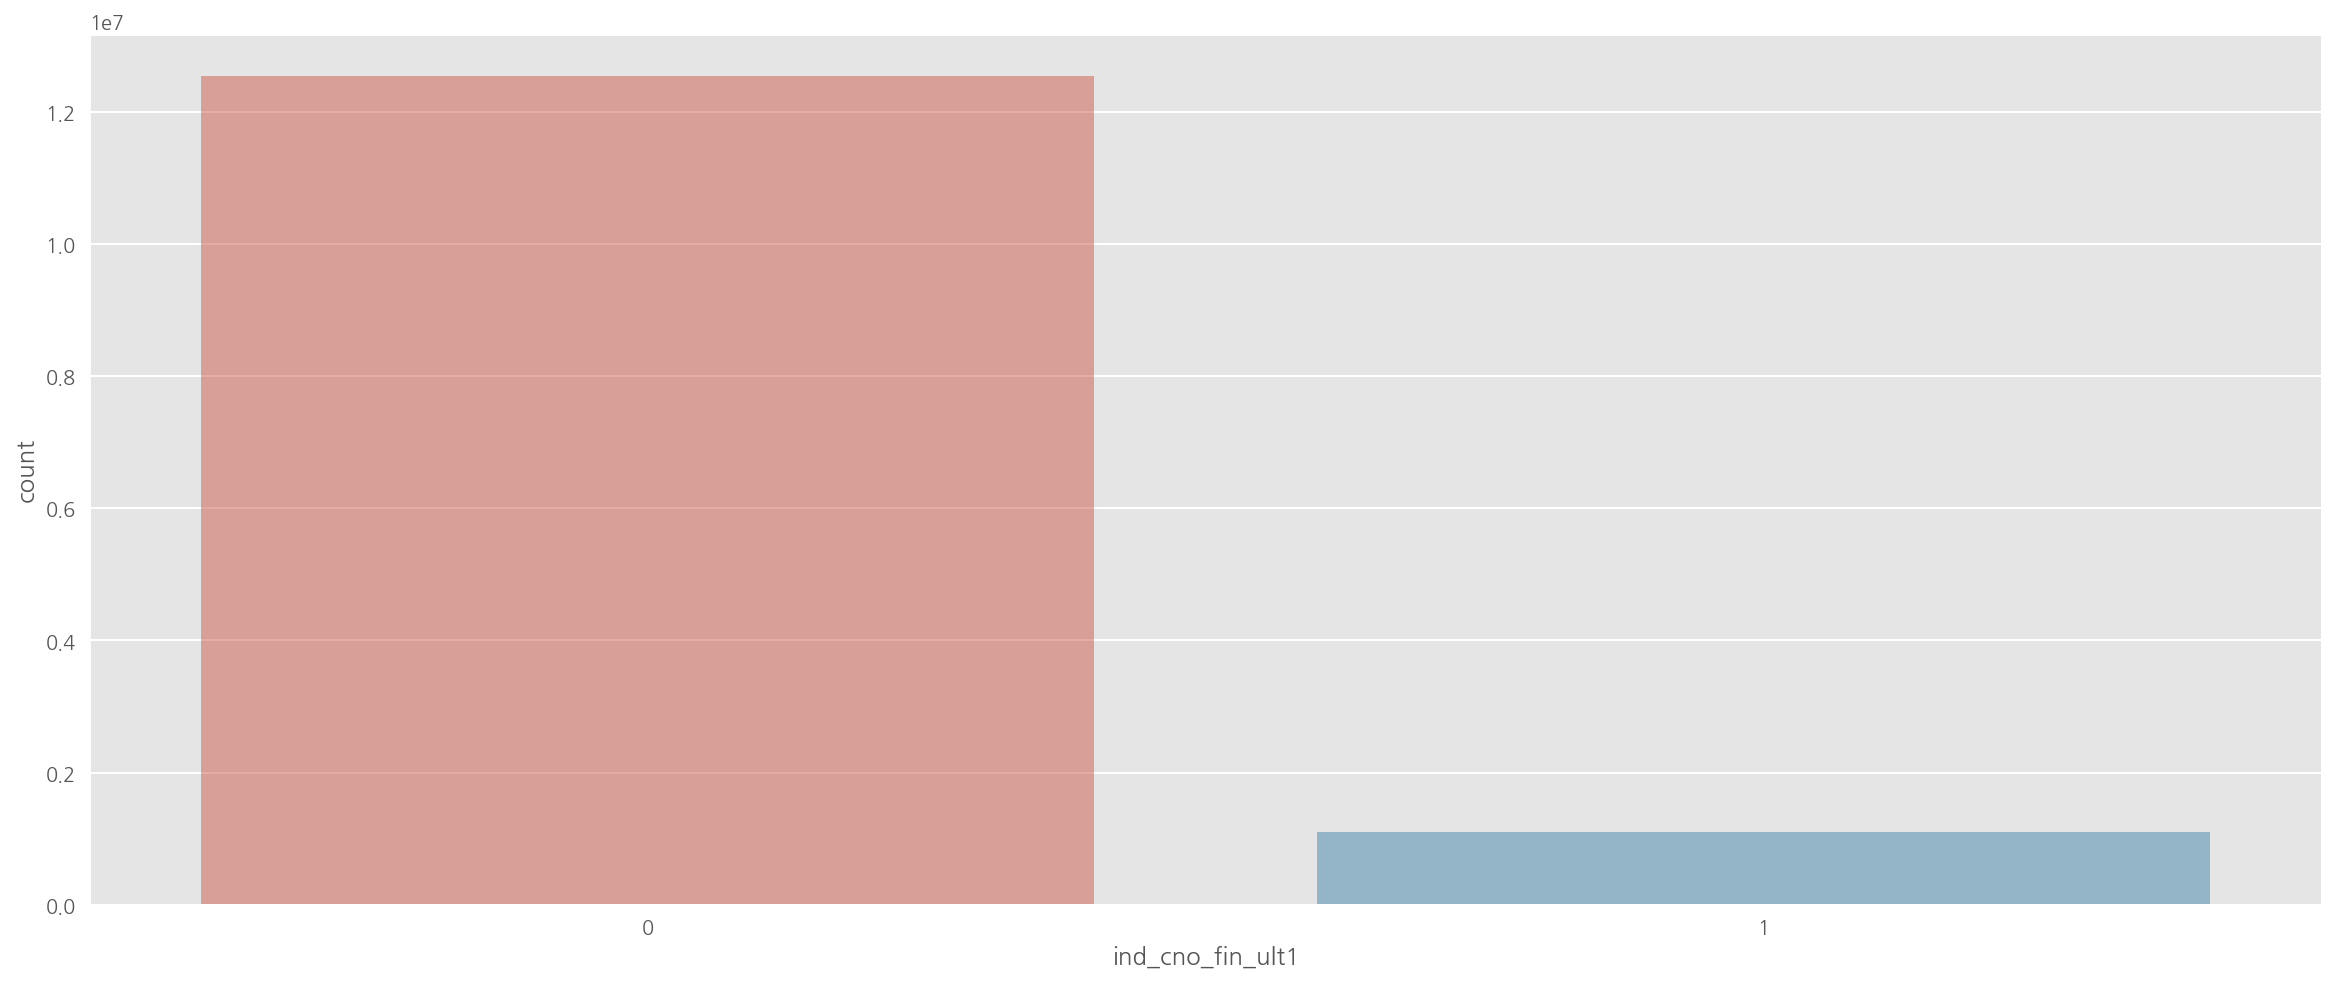

--------------------------------------------------
col :  ind_ctju_fin_ult1


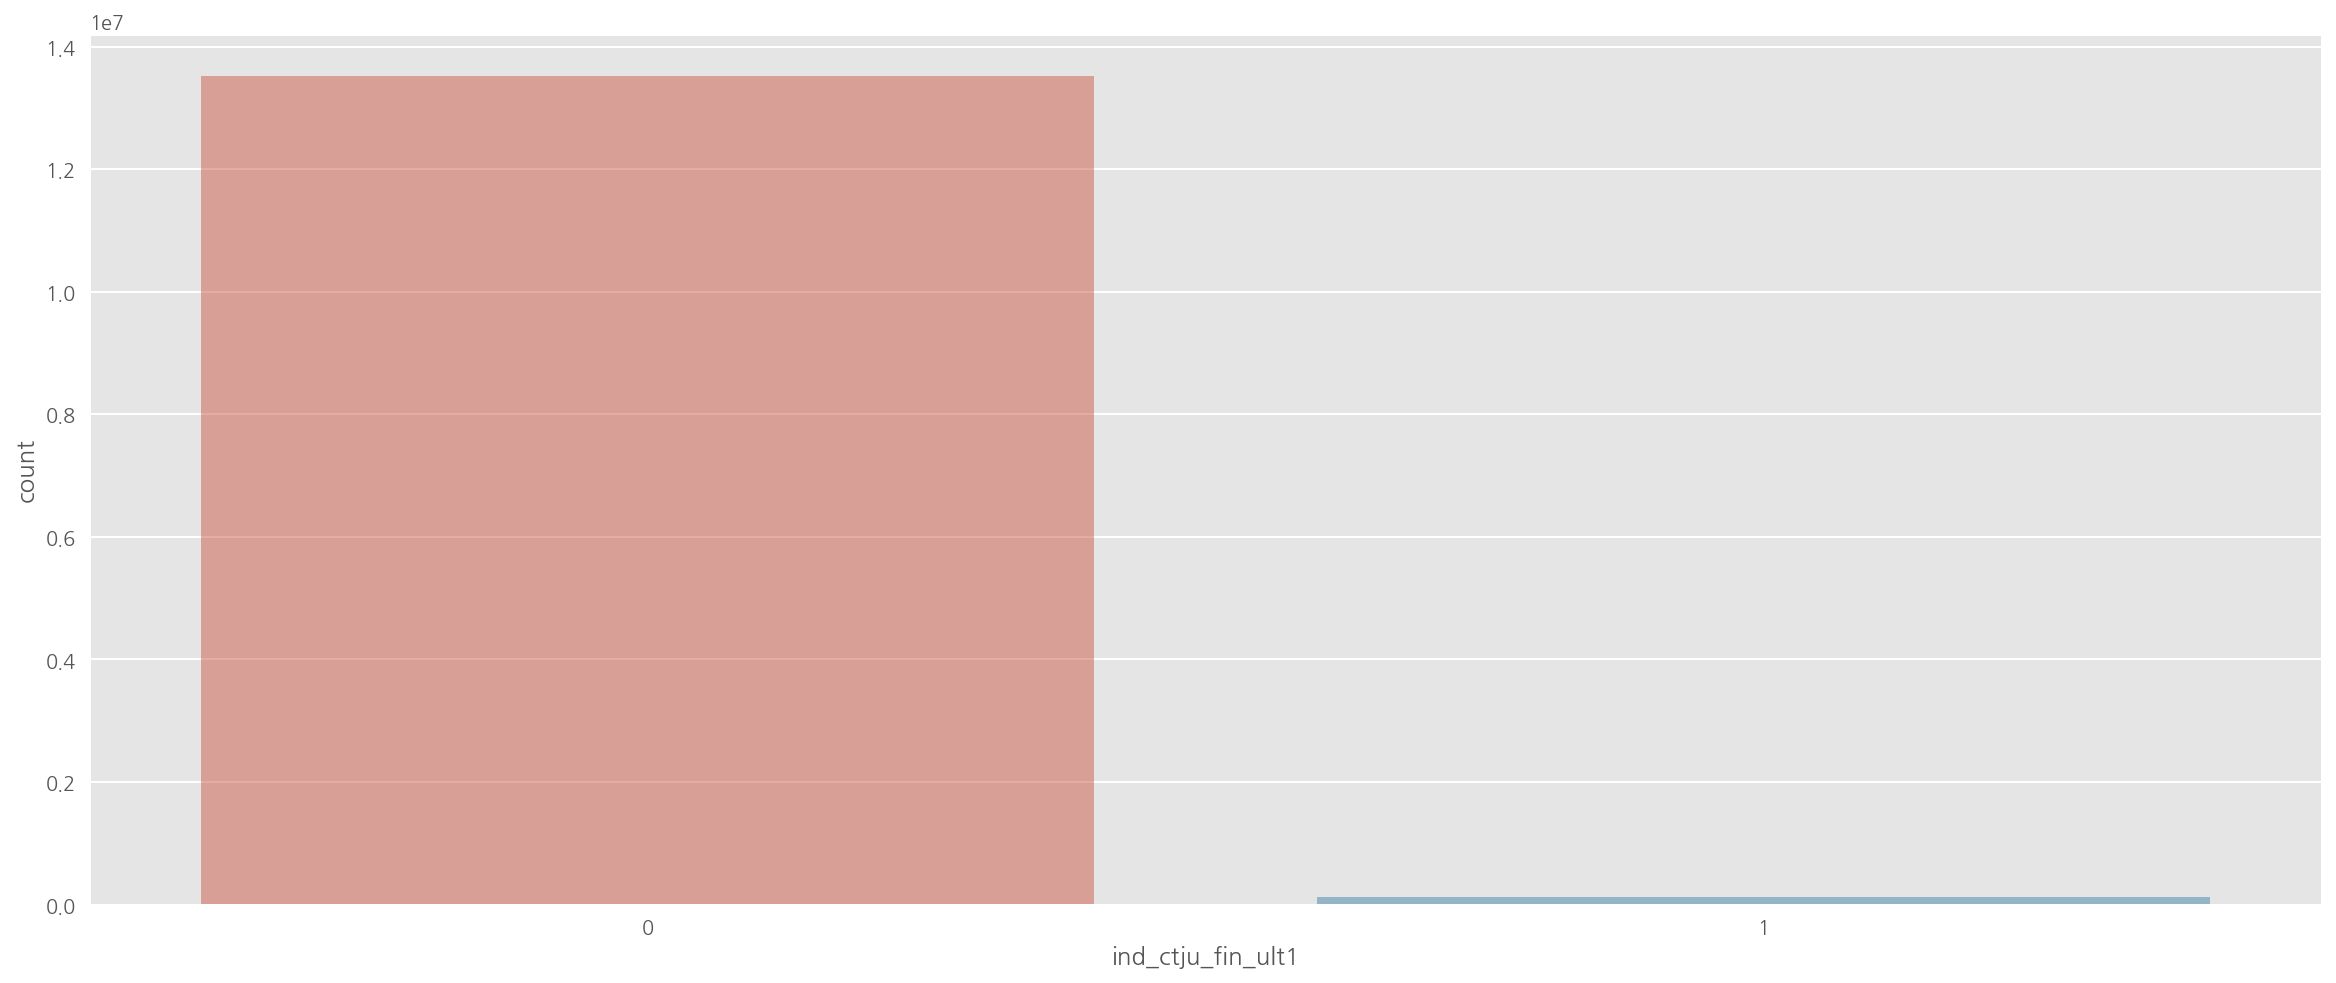

--------------------------------------------------
col :  ind_ctma_fin_ult1


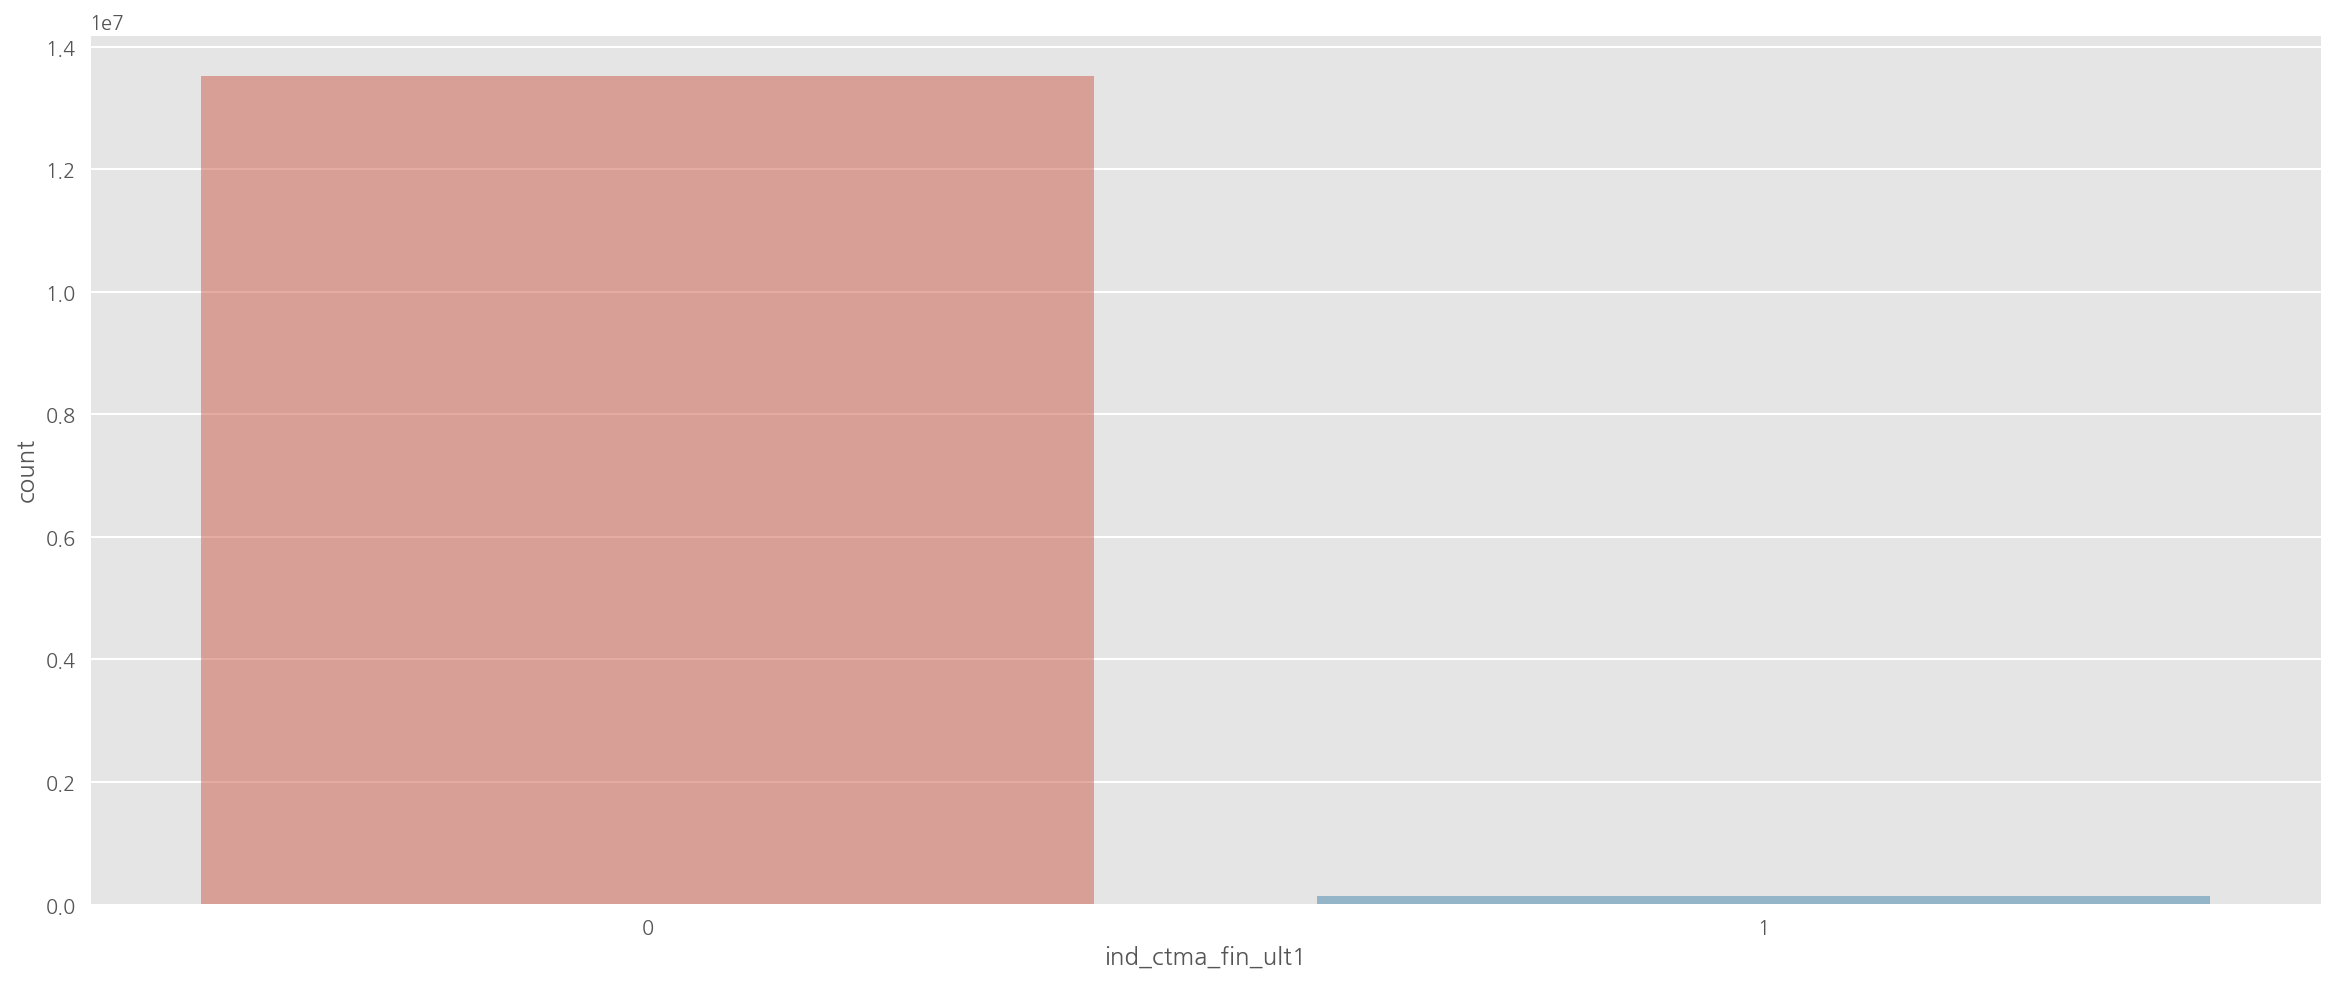

--------------------------------------------------
col :  ind_ctop_fin_ult1


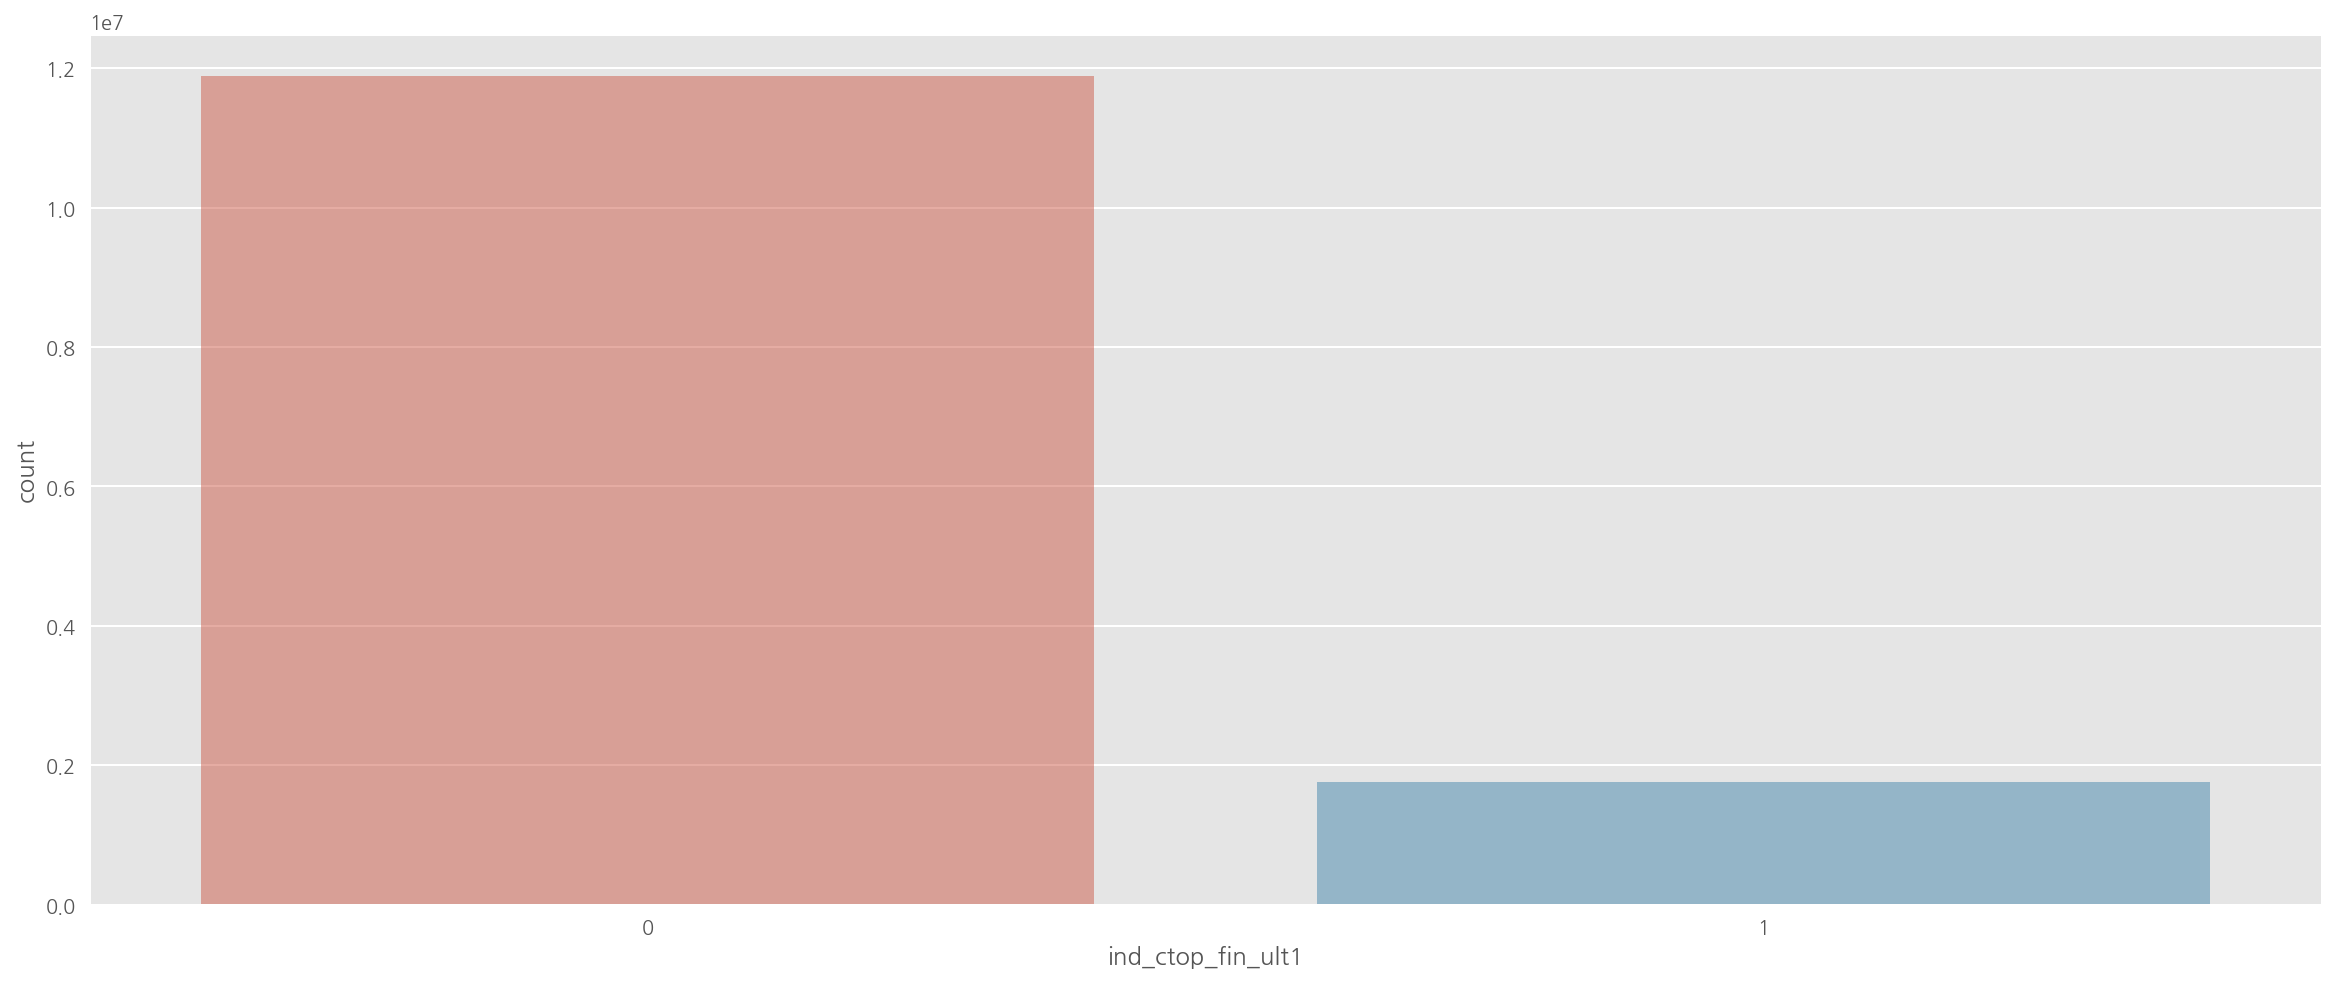

--------------------------------------------------
col :  ind_ctpp_fin_ult1


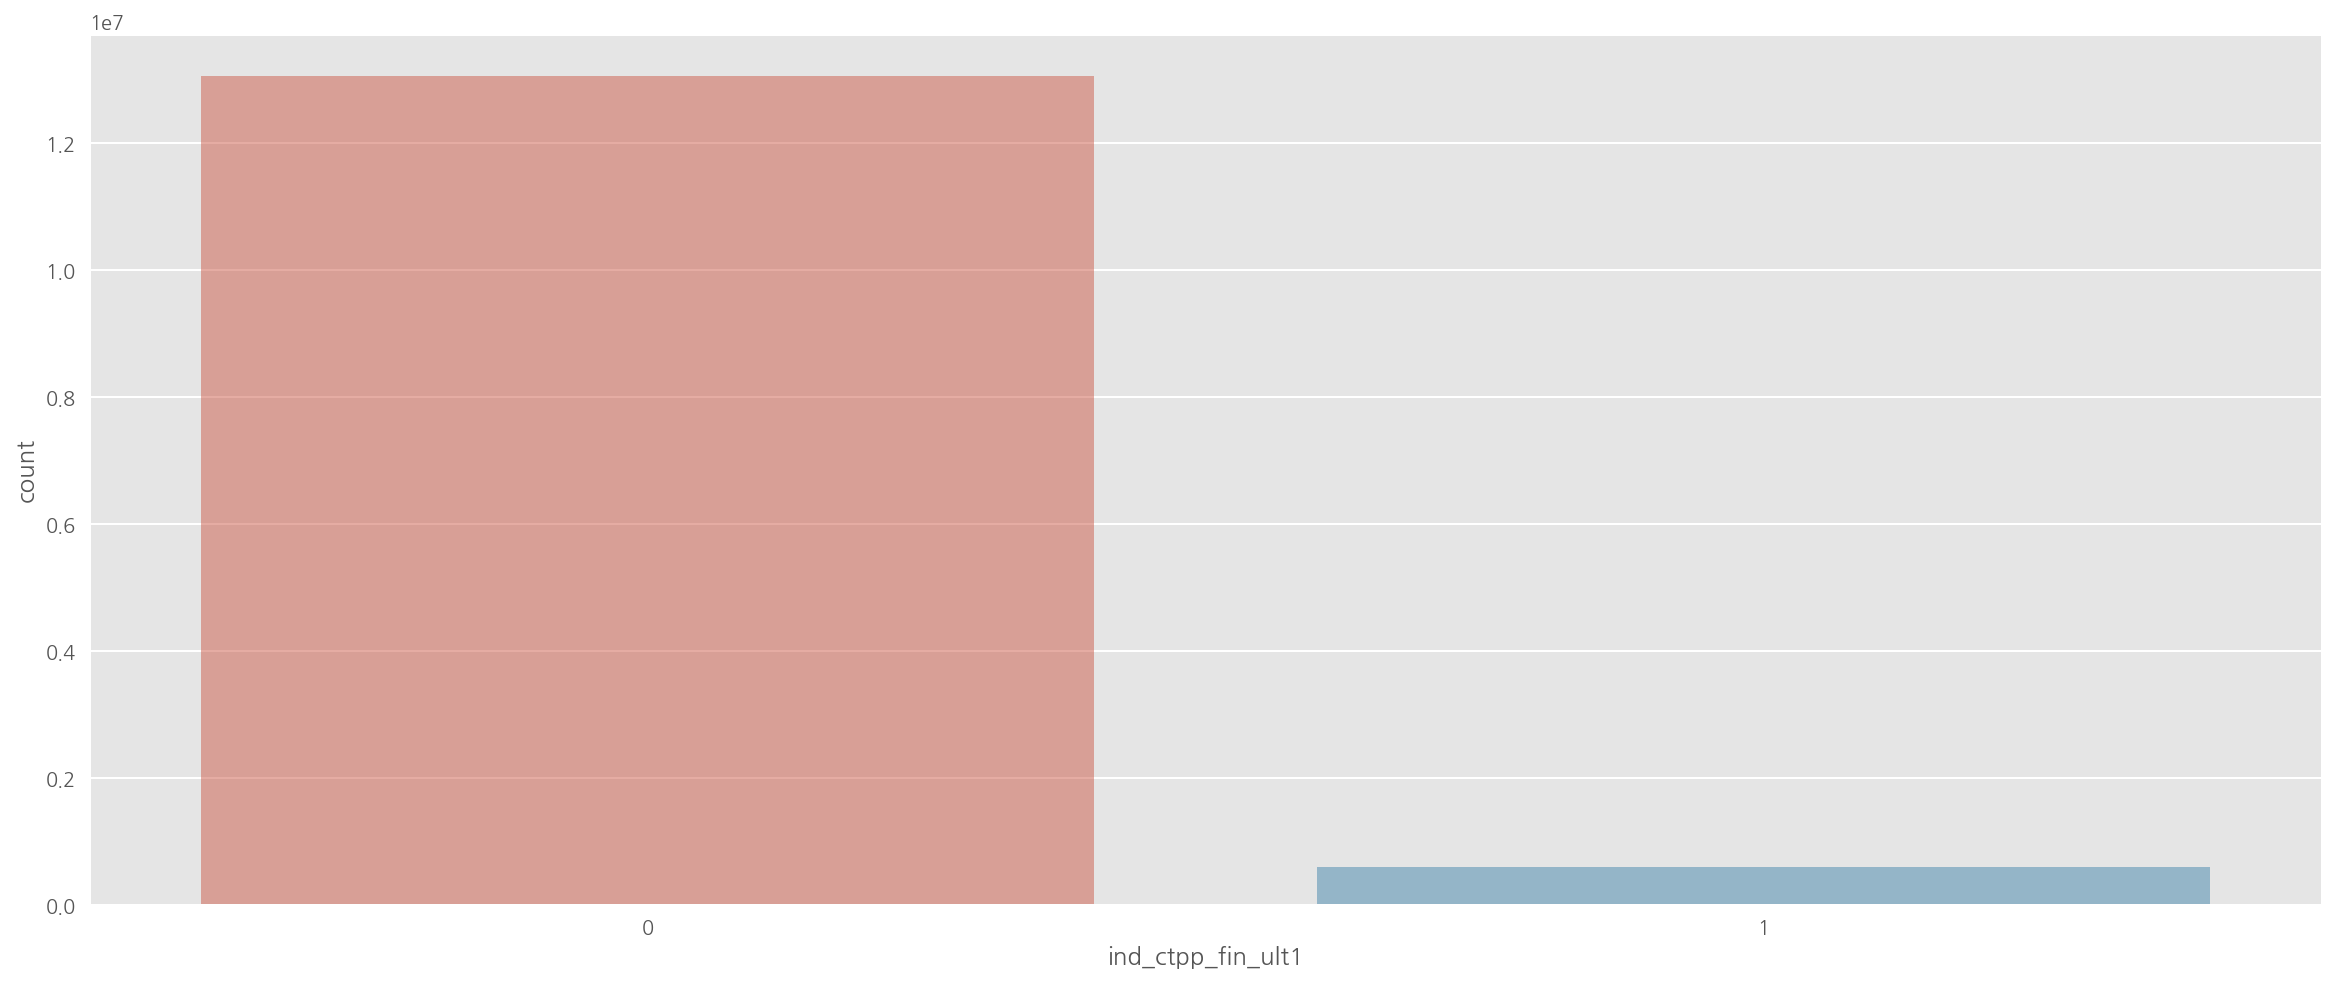

--------------------------------------------------
col :  ind_deco_fin_ult1


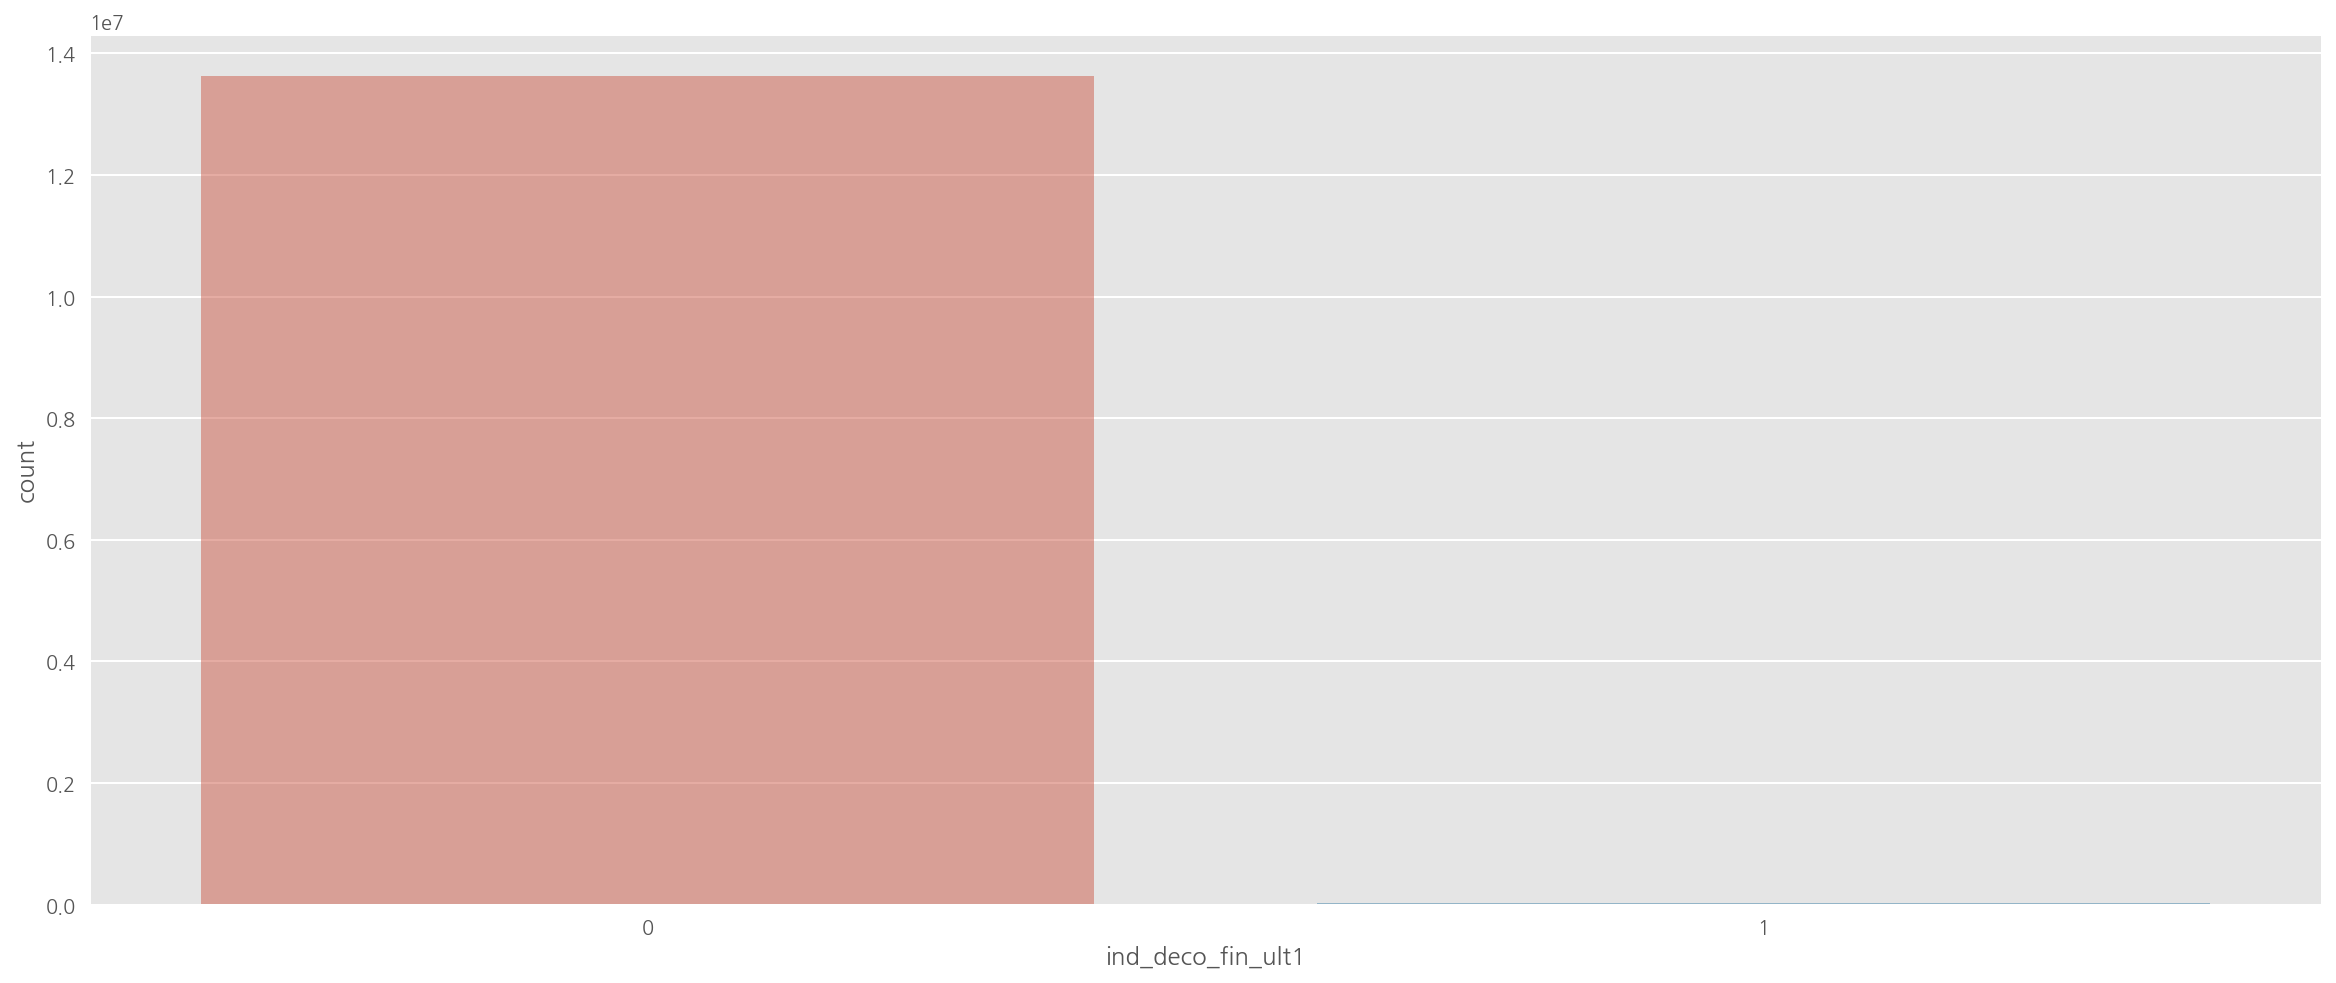

--------------------------------------------------
col :  ind_deme_fin_ult1


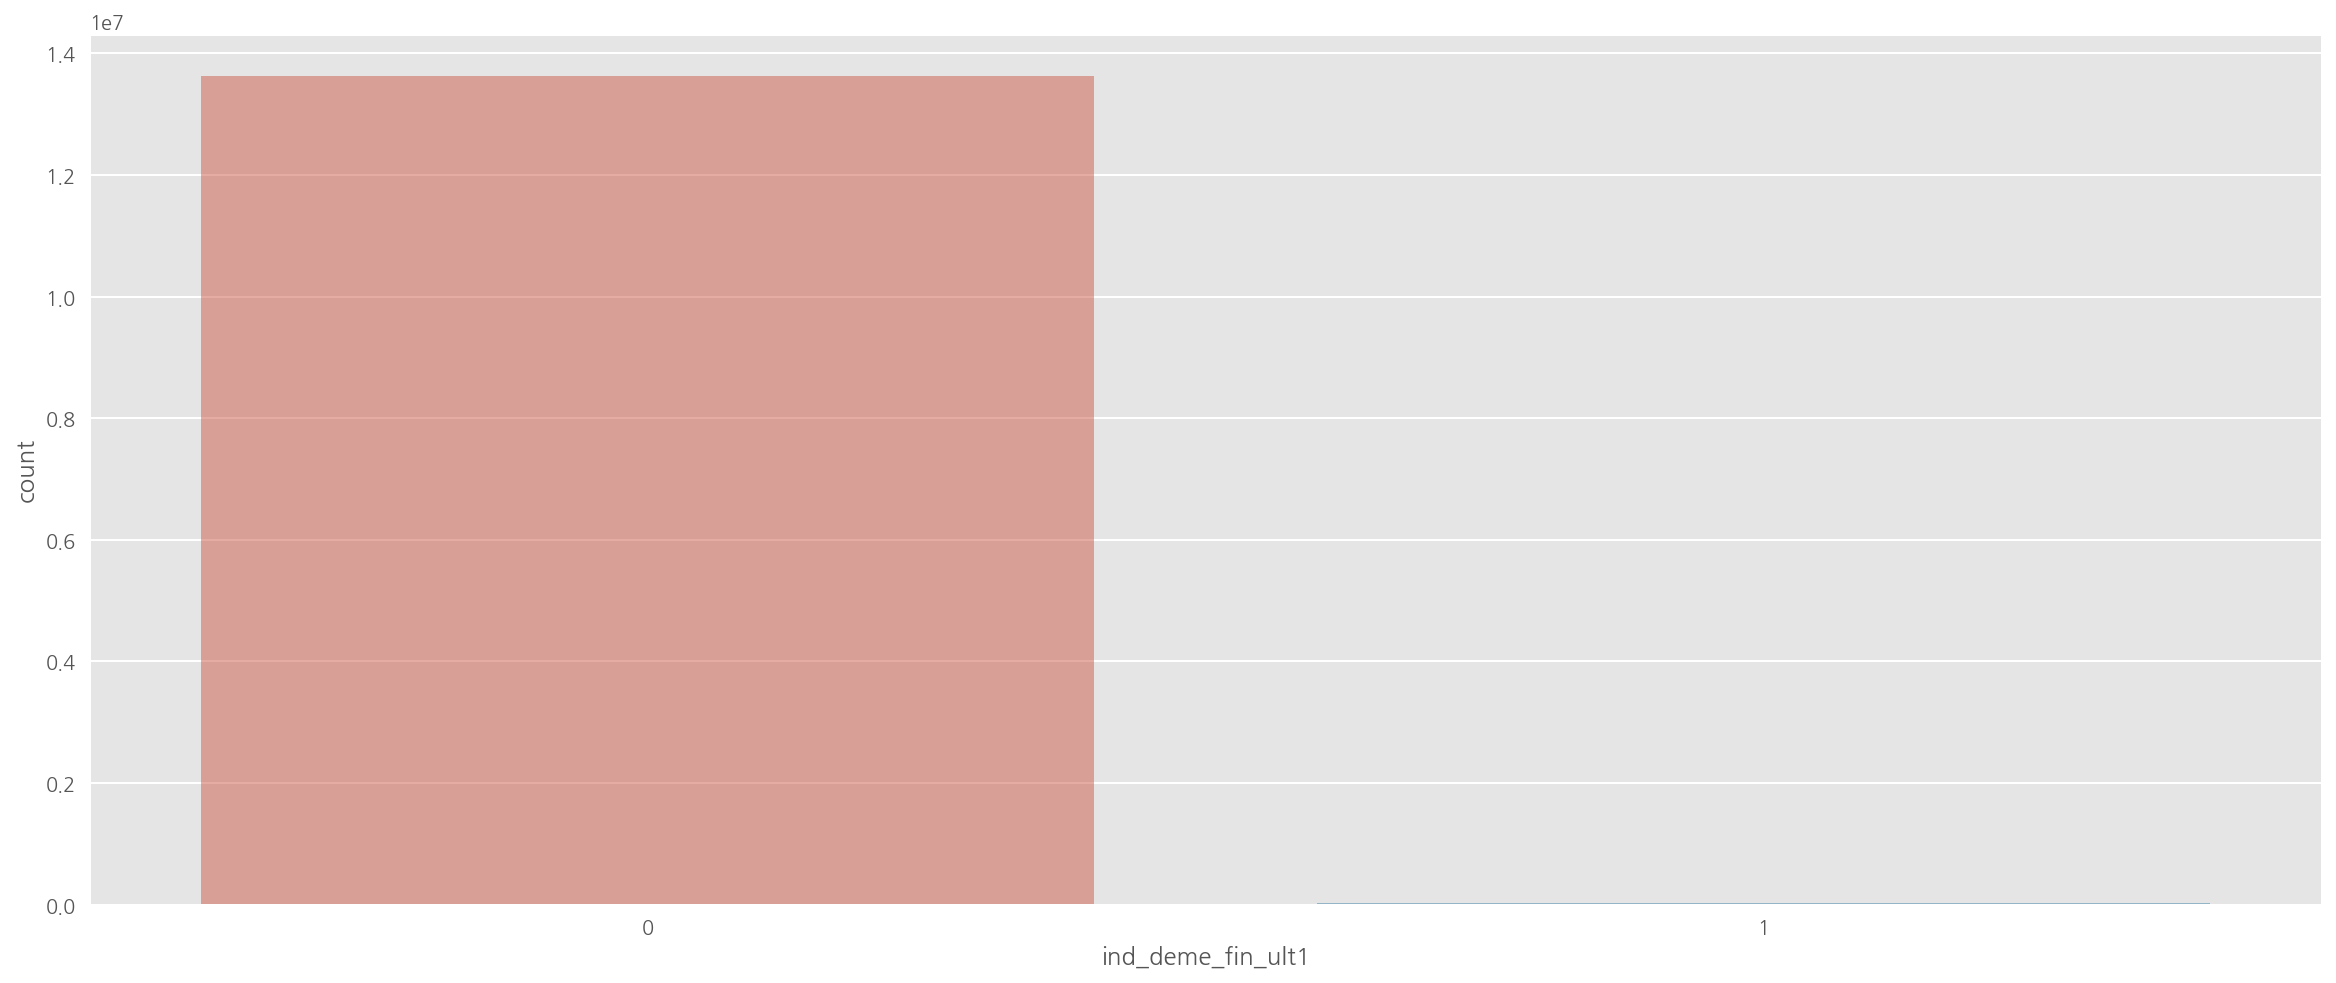

--------------------------------------------------
col :  ind_dela_fin_ult1


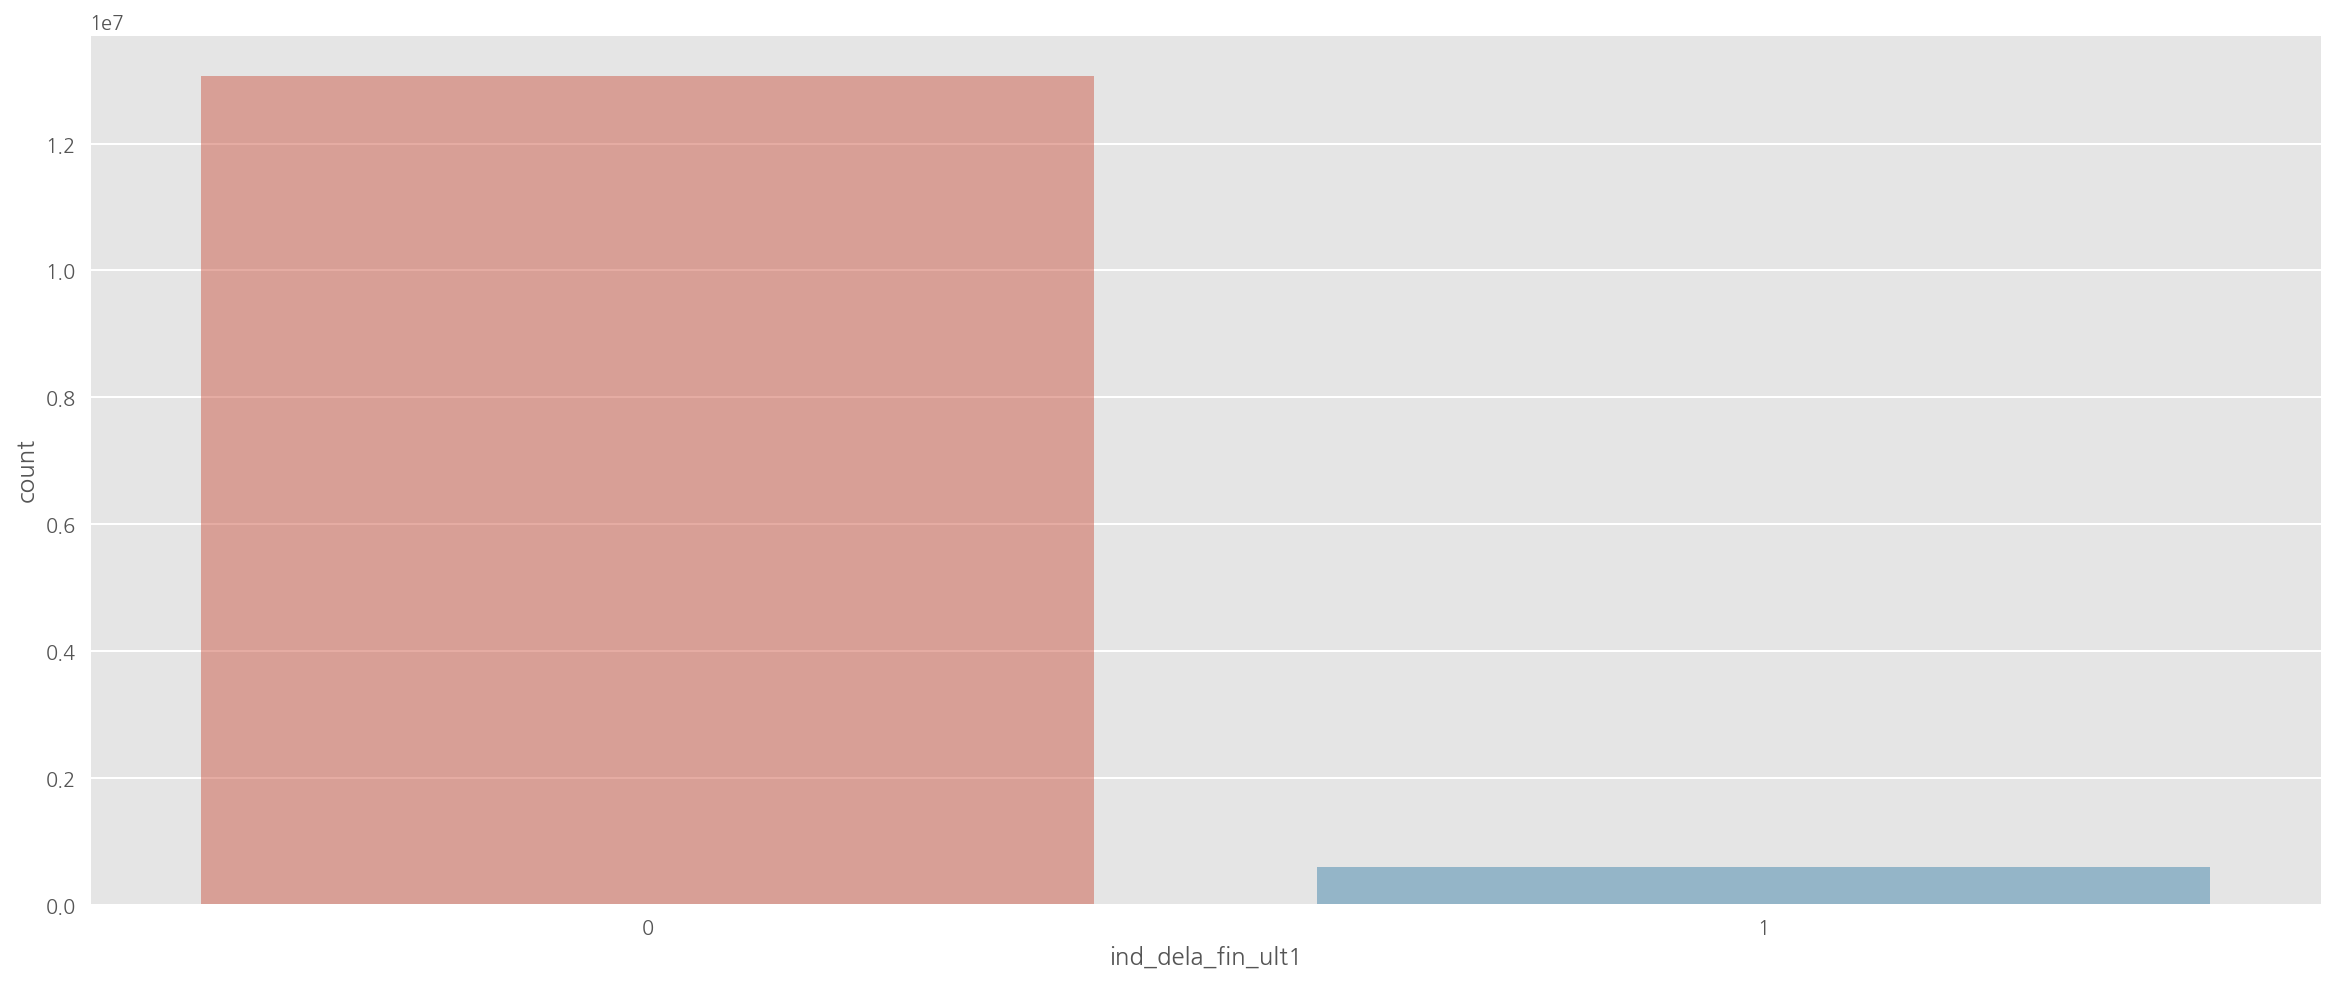

--------------------------------------------------
col :  ind_ecue_fin_ult1


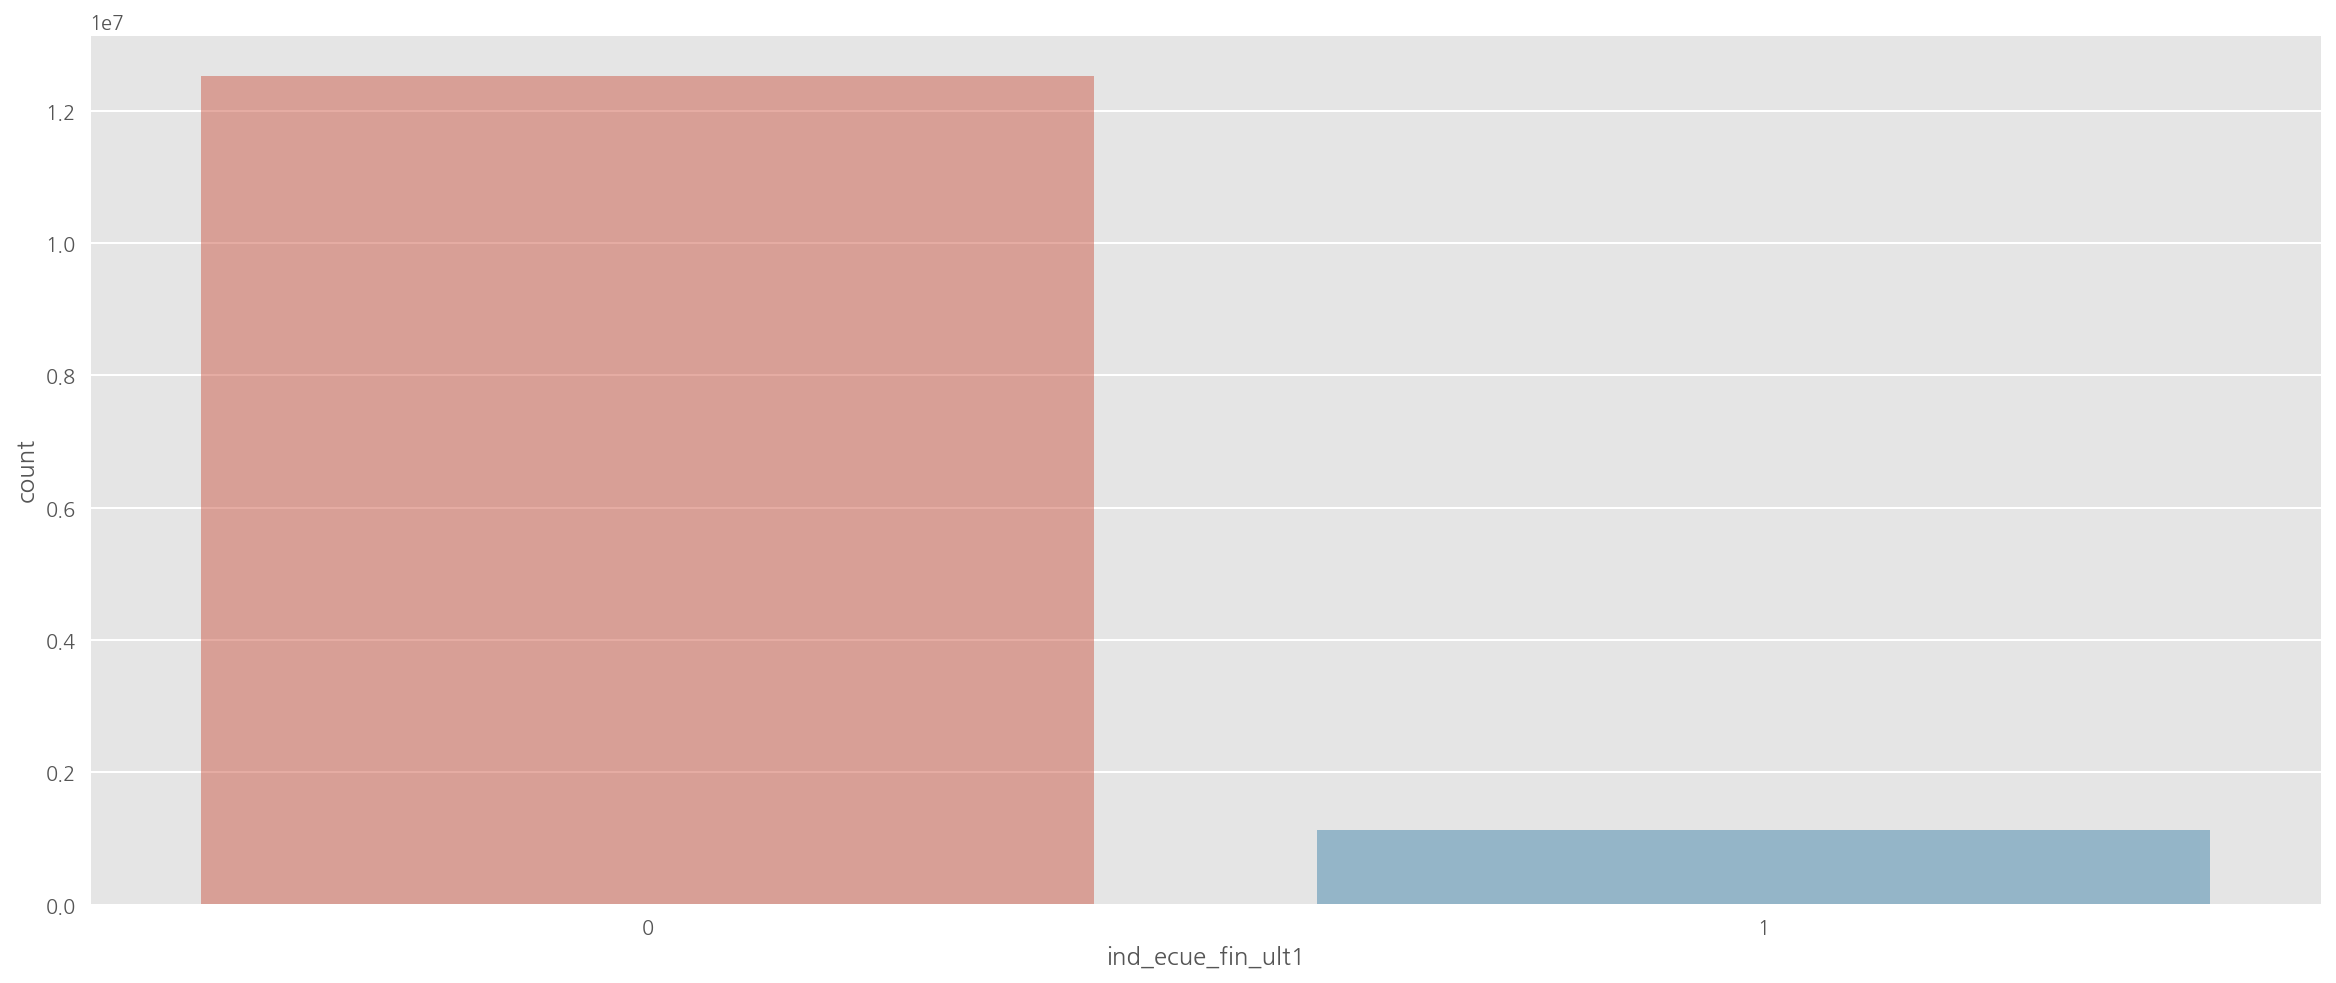

--------------------------------------------------
col :  ind_fond_fin_ult1


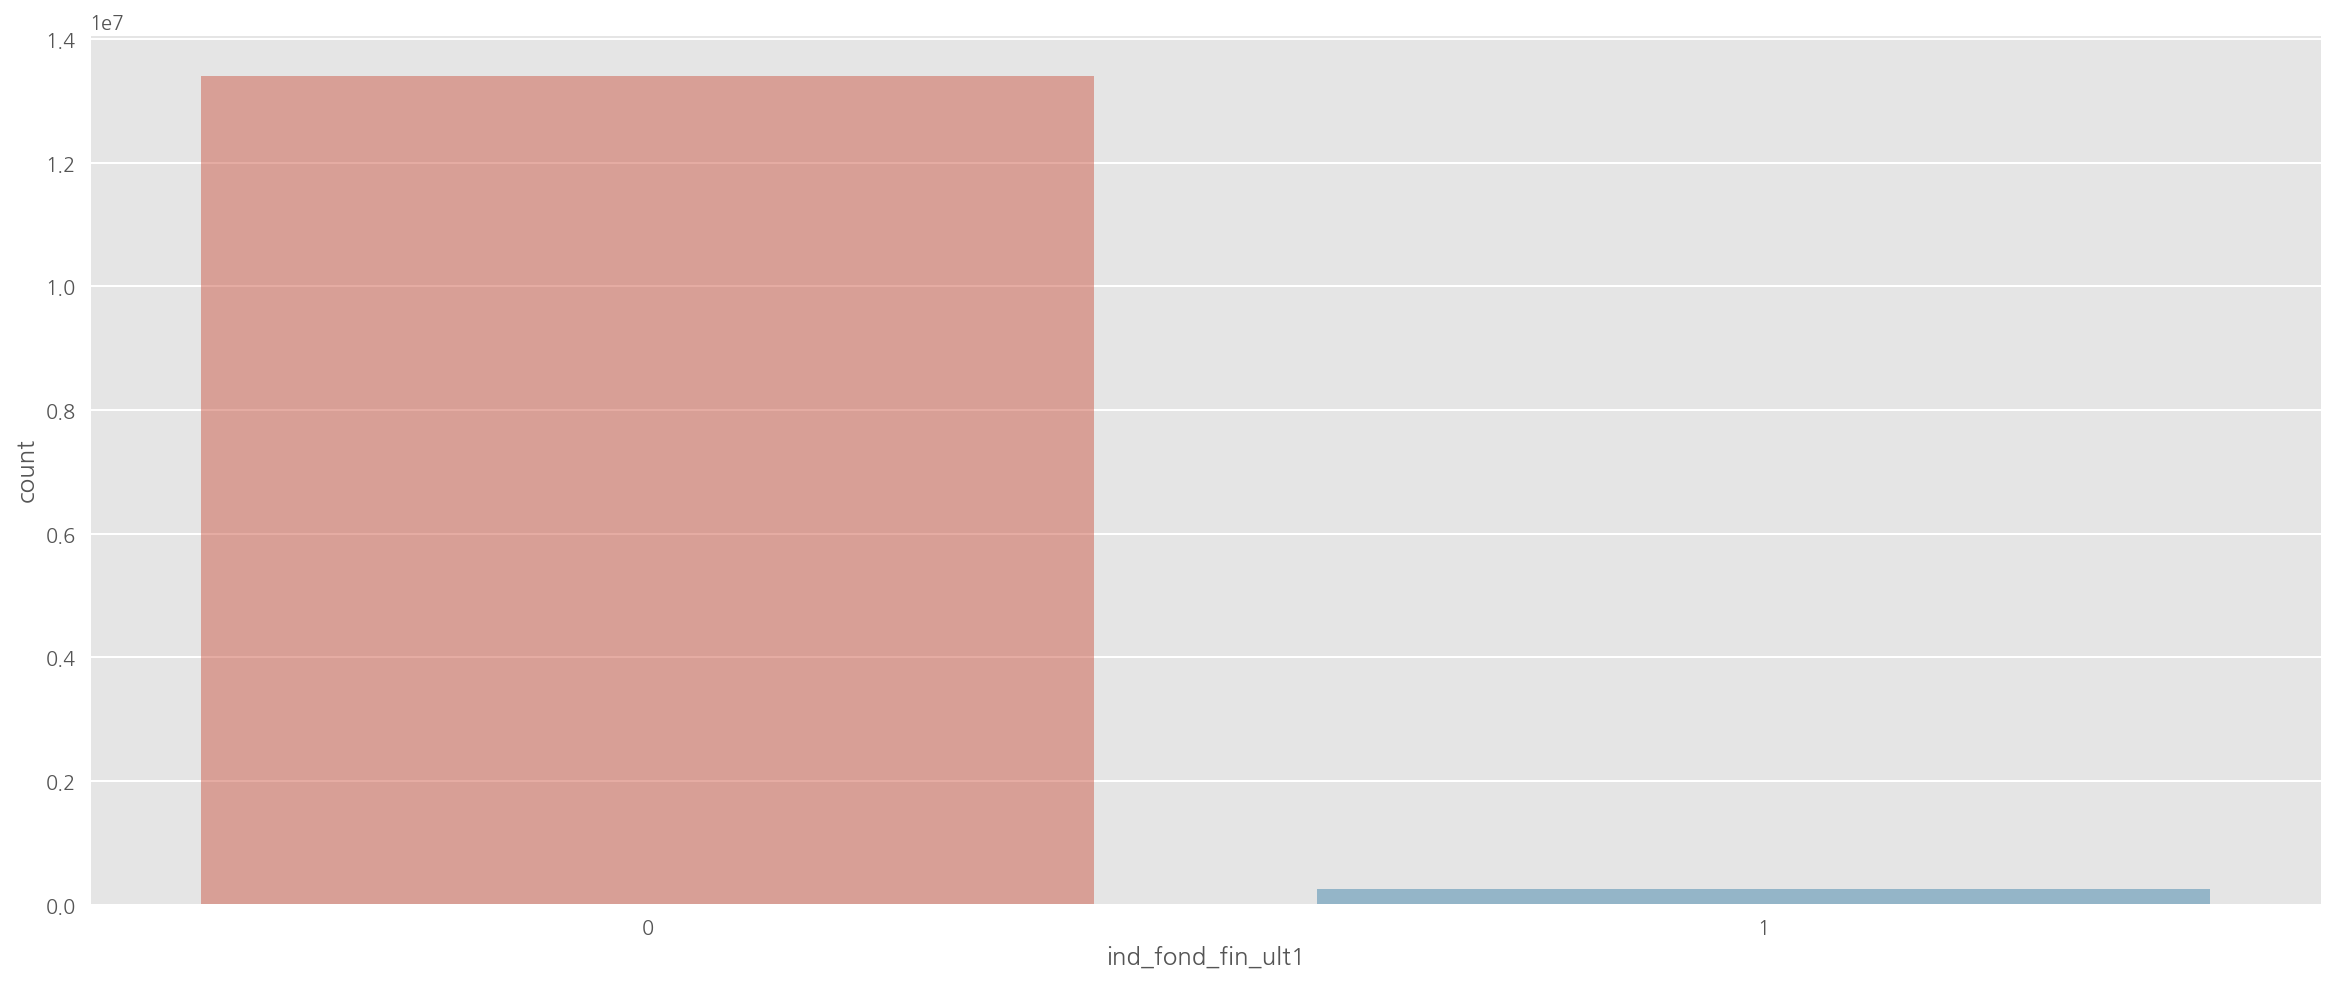

--------------------------------------------------
col :  ind_hip_fin_ult1


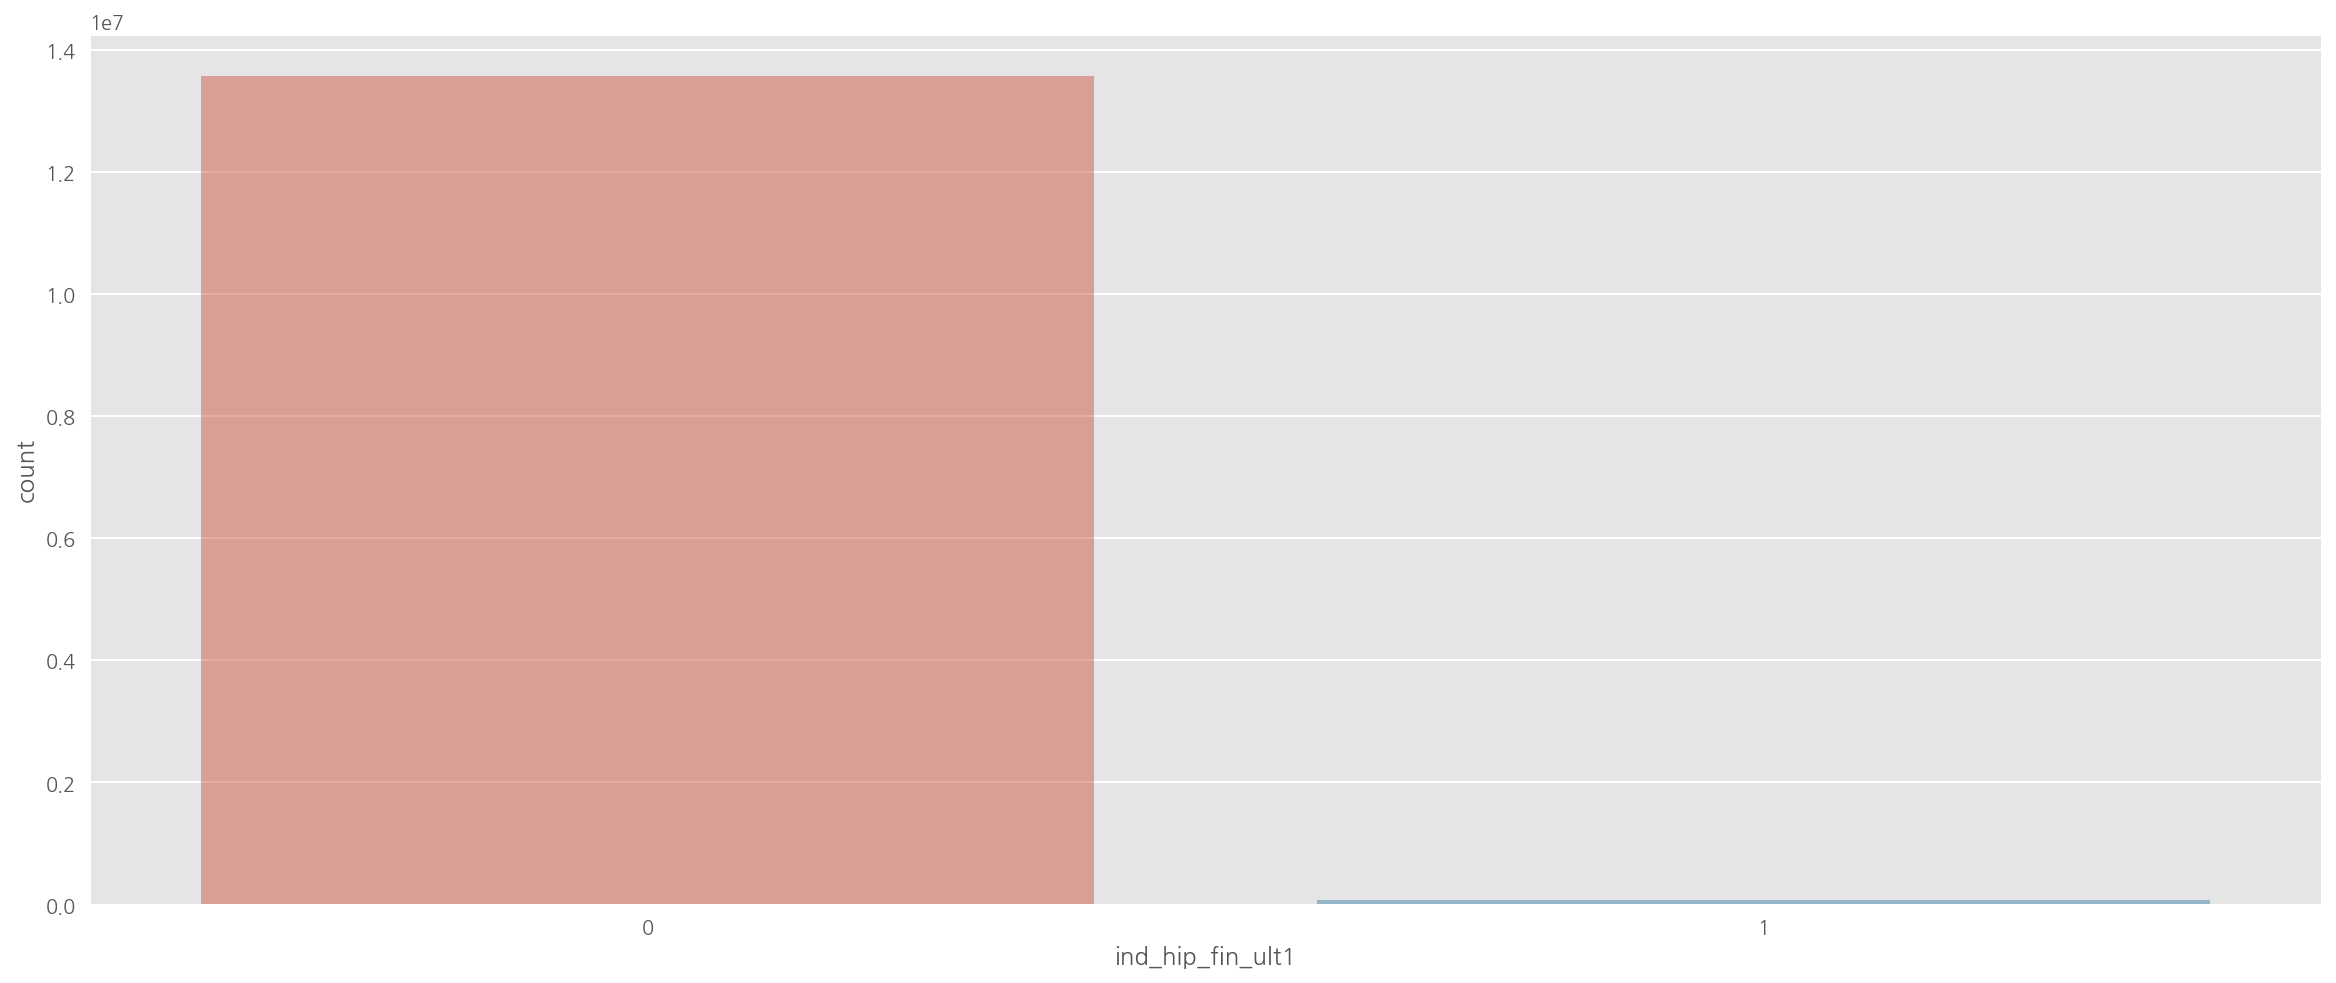

--------------------------------------------------
col :  ind_plan_fin_ult1


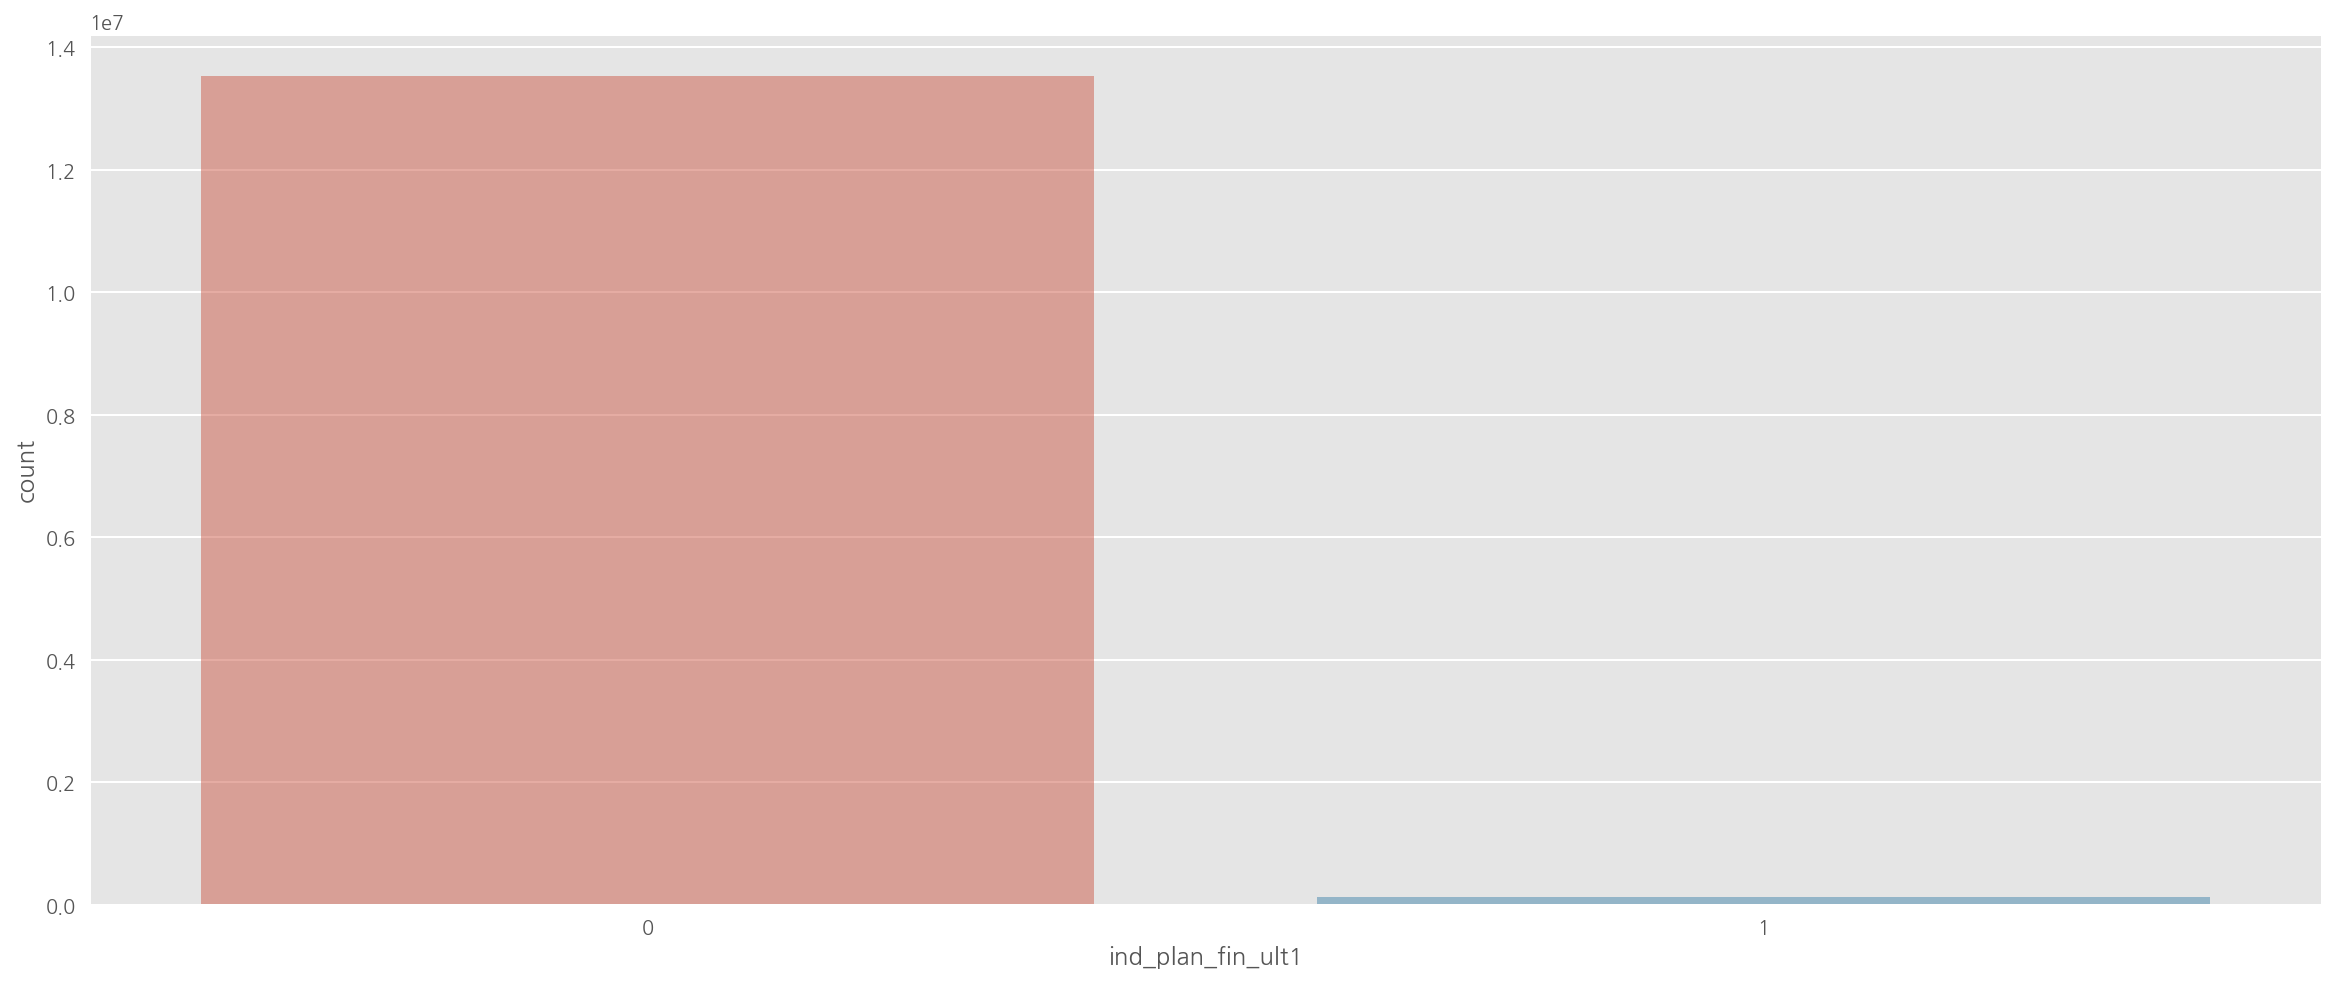

--------------------------------------------------
col :  ind_pres_fin_ult1


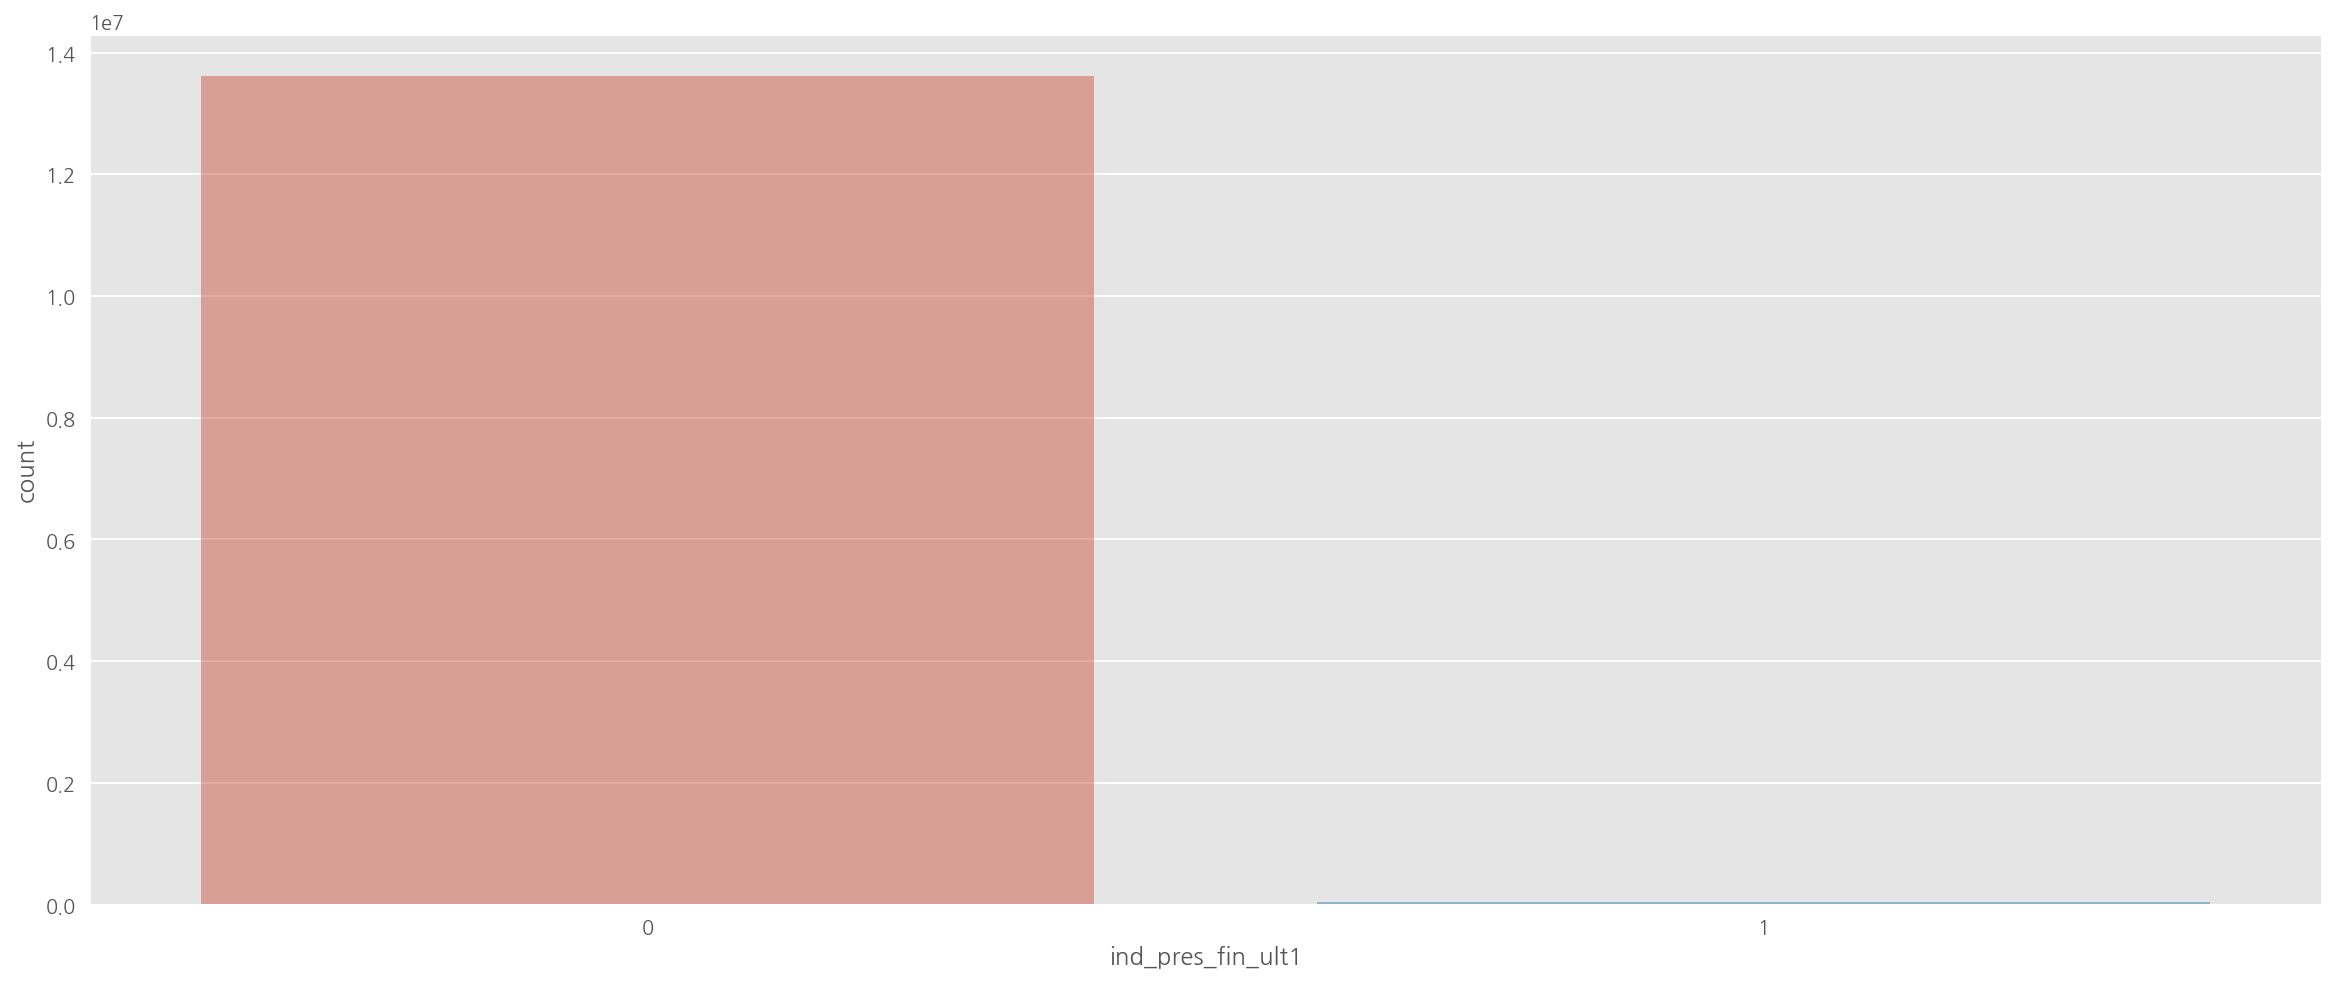

--------------------------------------------------
col :  ind_reca_fin_ult1


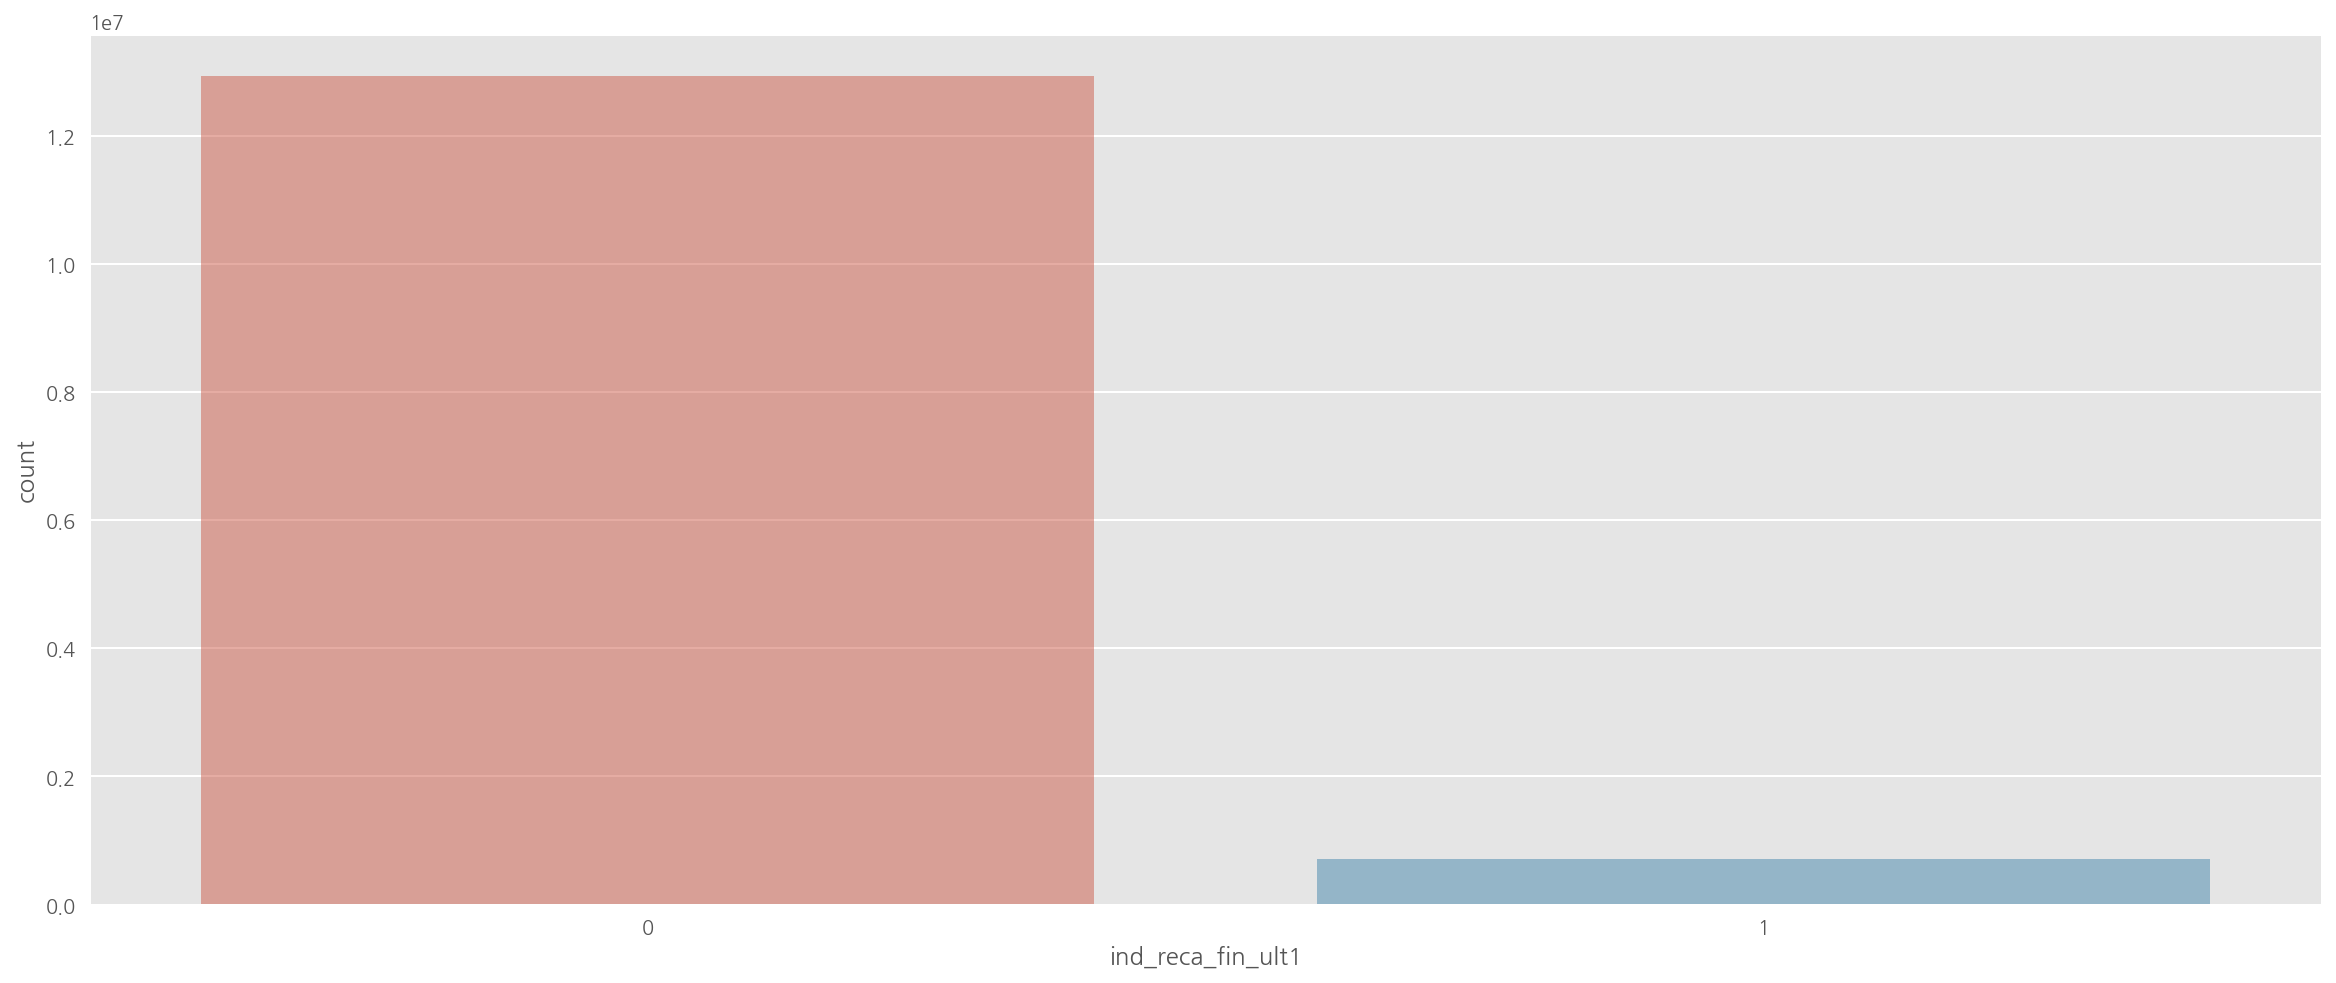

--------------------------------------------------
col :  ind_tjcr_fin_ult1


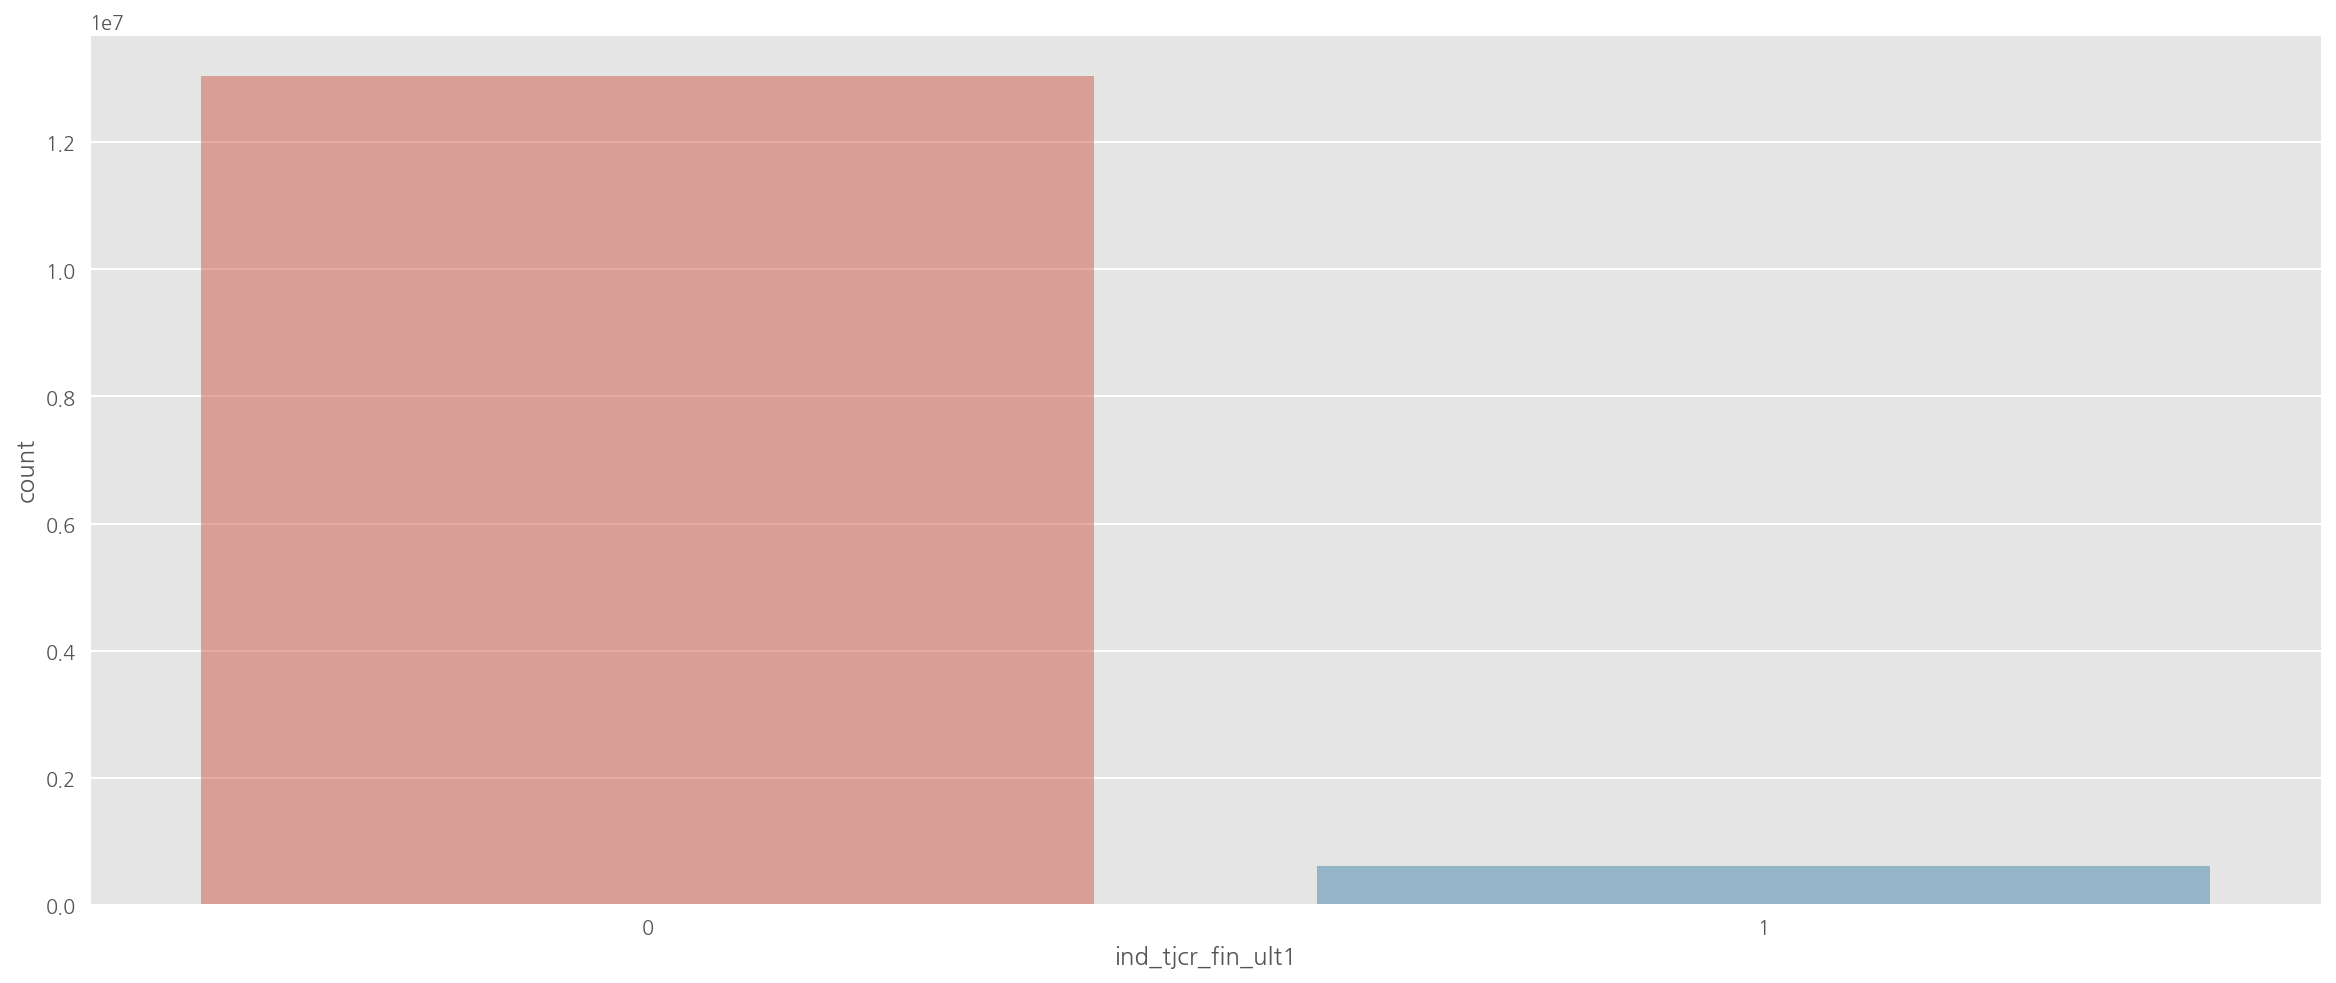

--------------------------------------------------
col :  ind_valo_fin_ult1


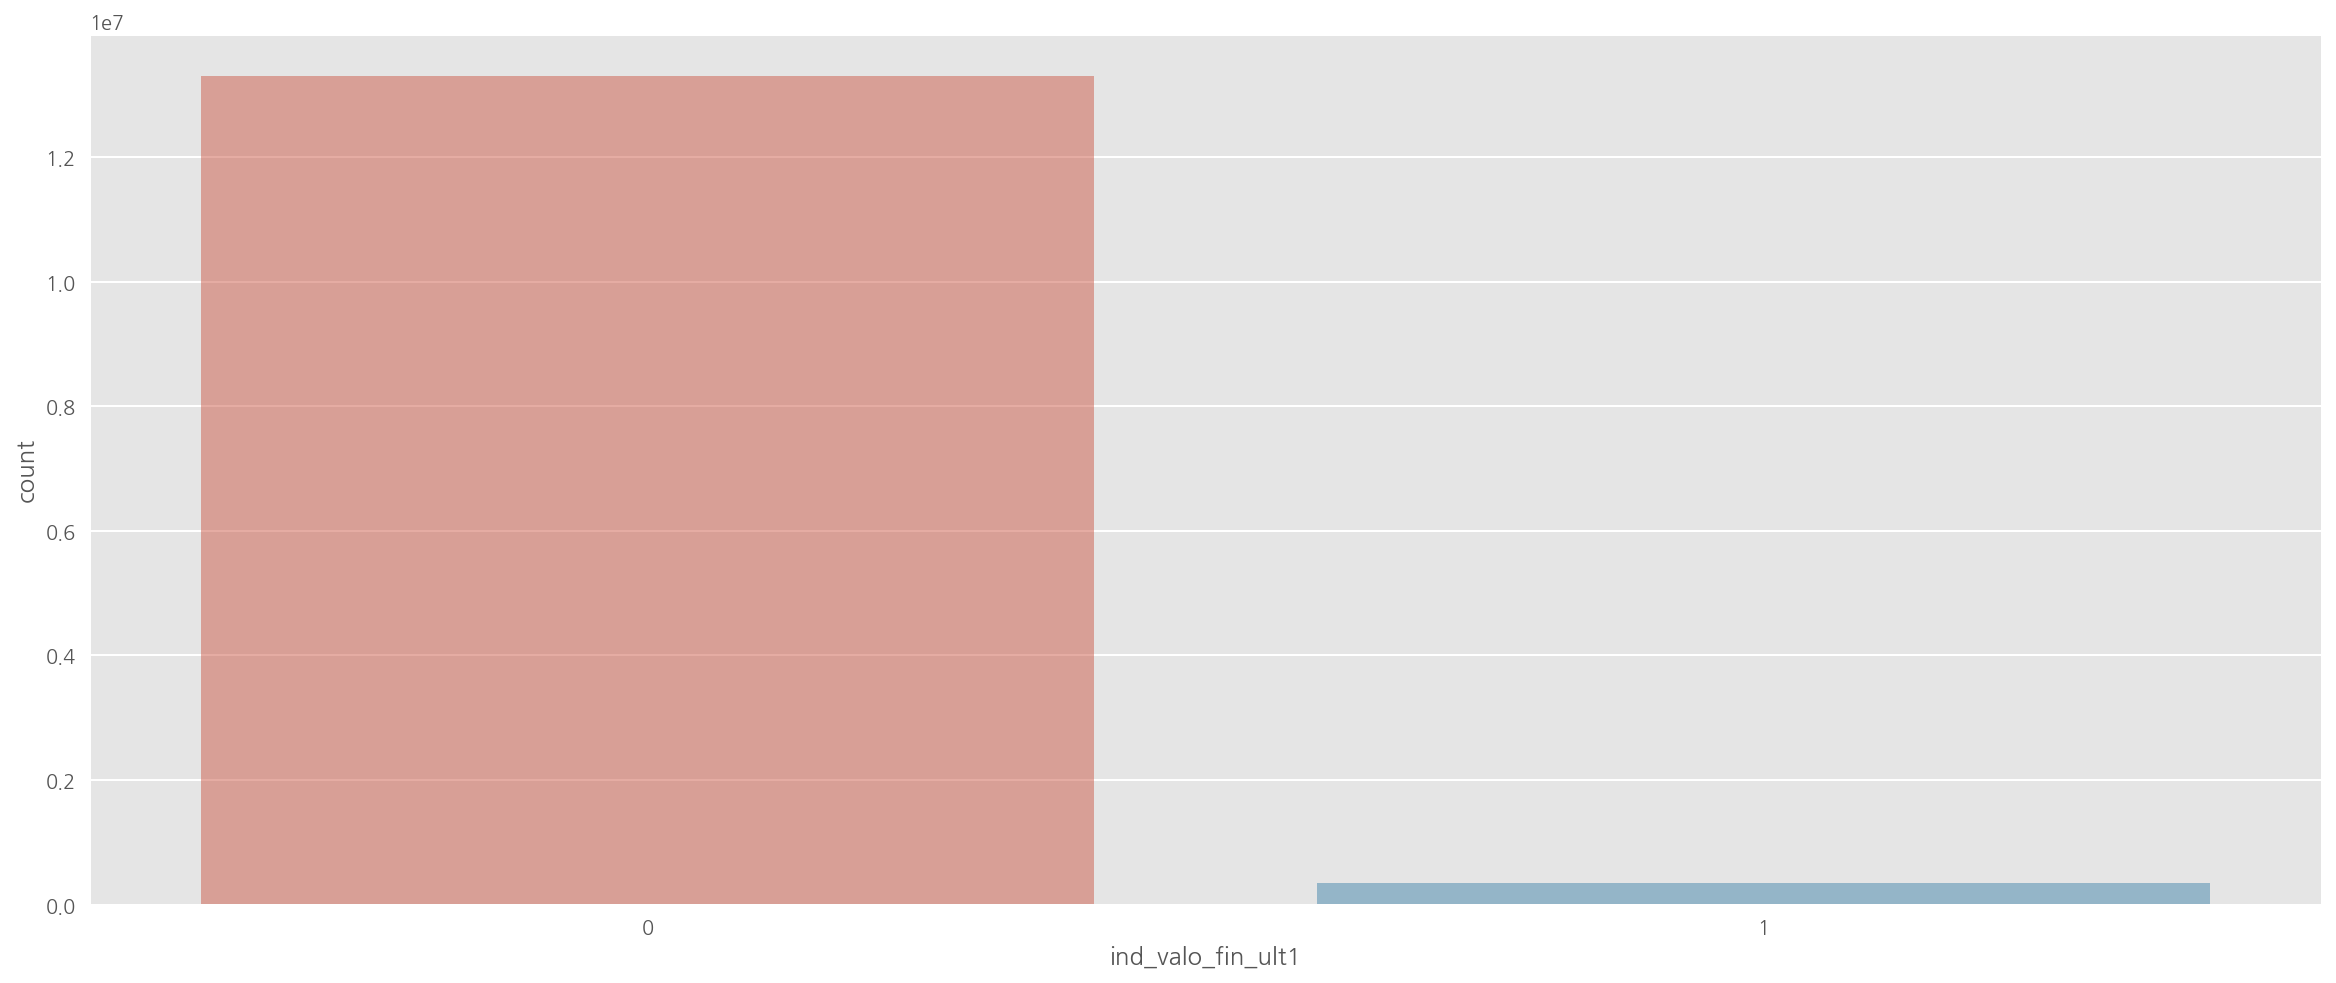

--------------------------------------------------
col :  ind_viv_fin_ult1


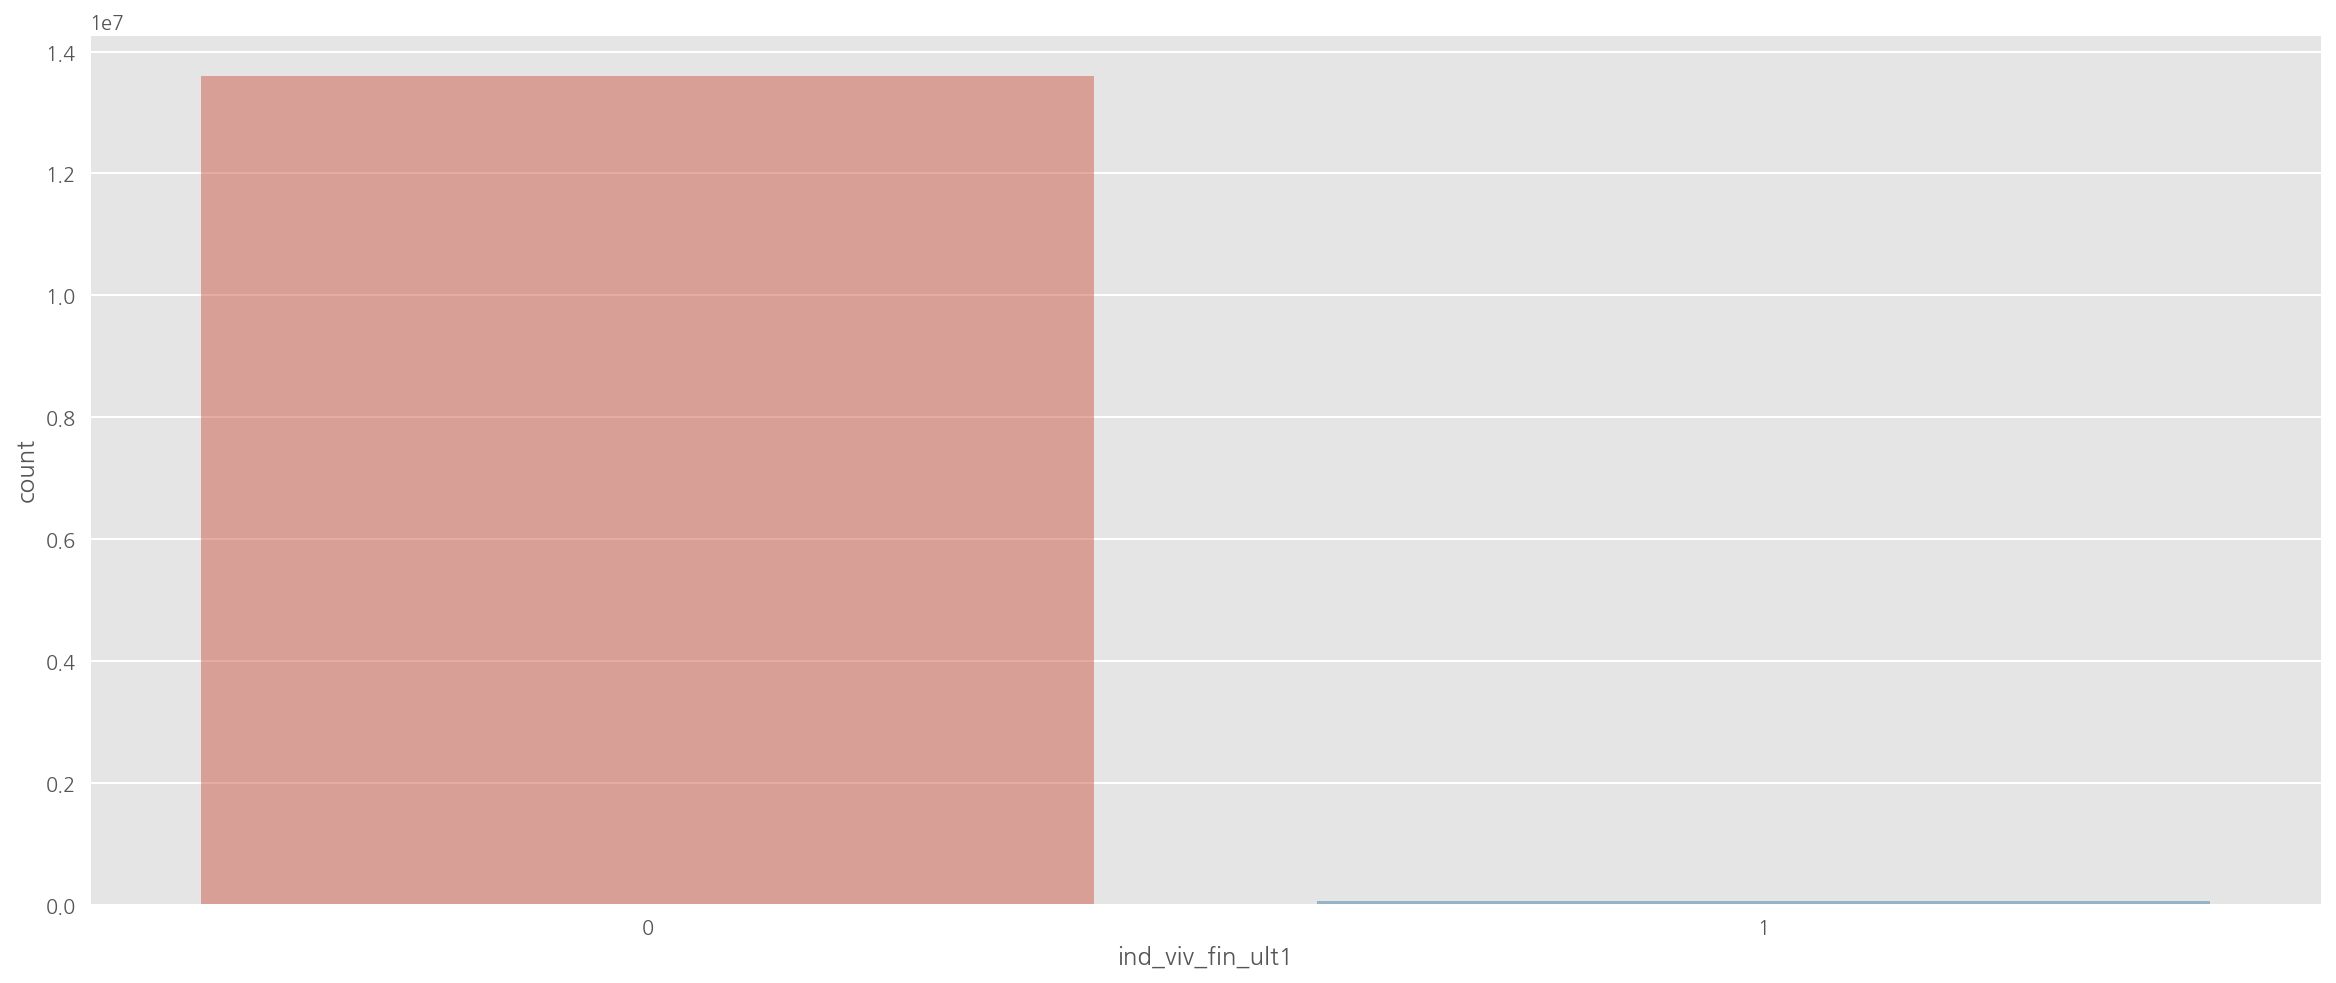

--------------------------------------------------
col :  ind_nomina_ult1


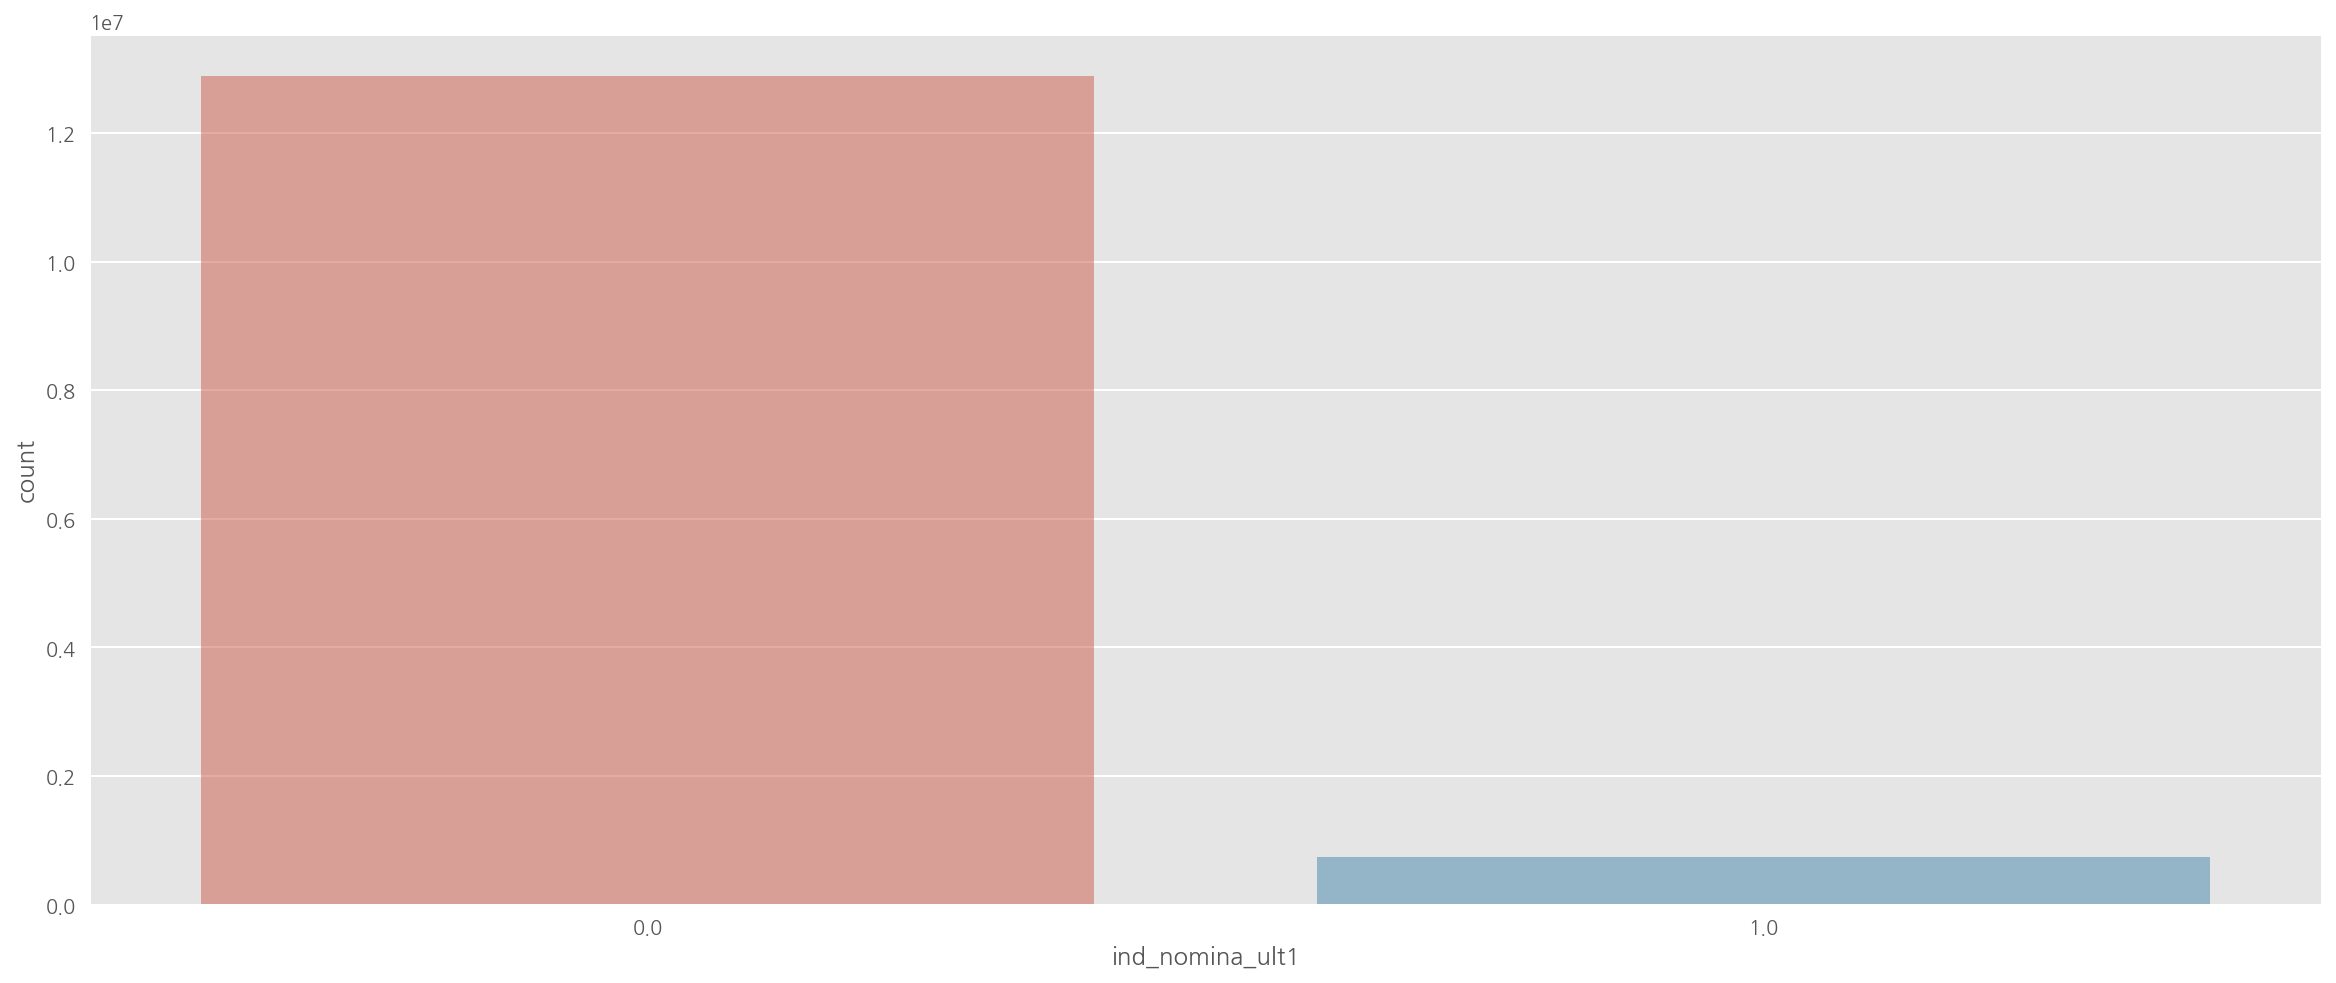

--------------------------------------------------
col :  ind_nom_pens_ult1


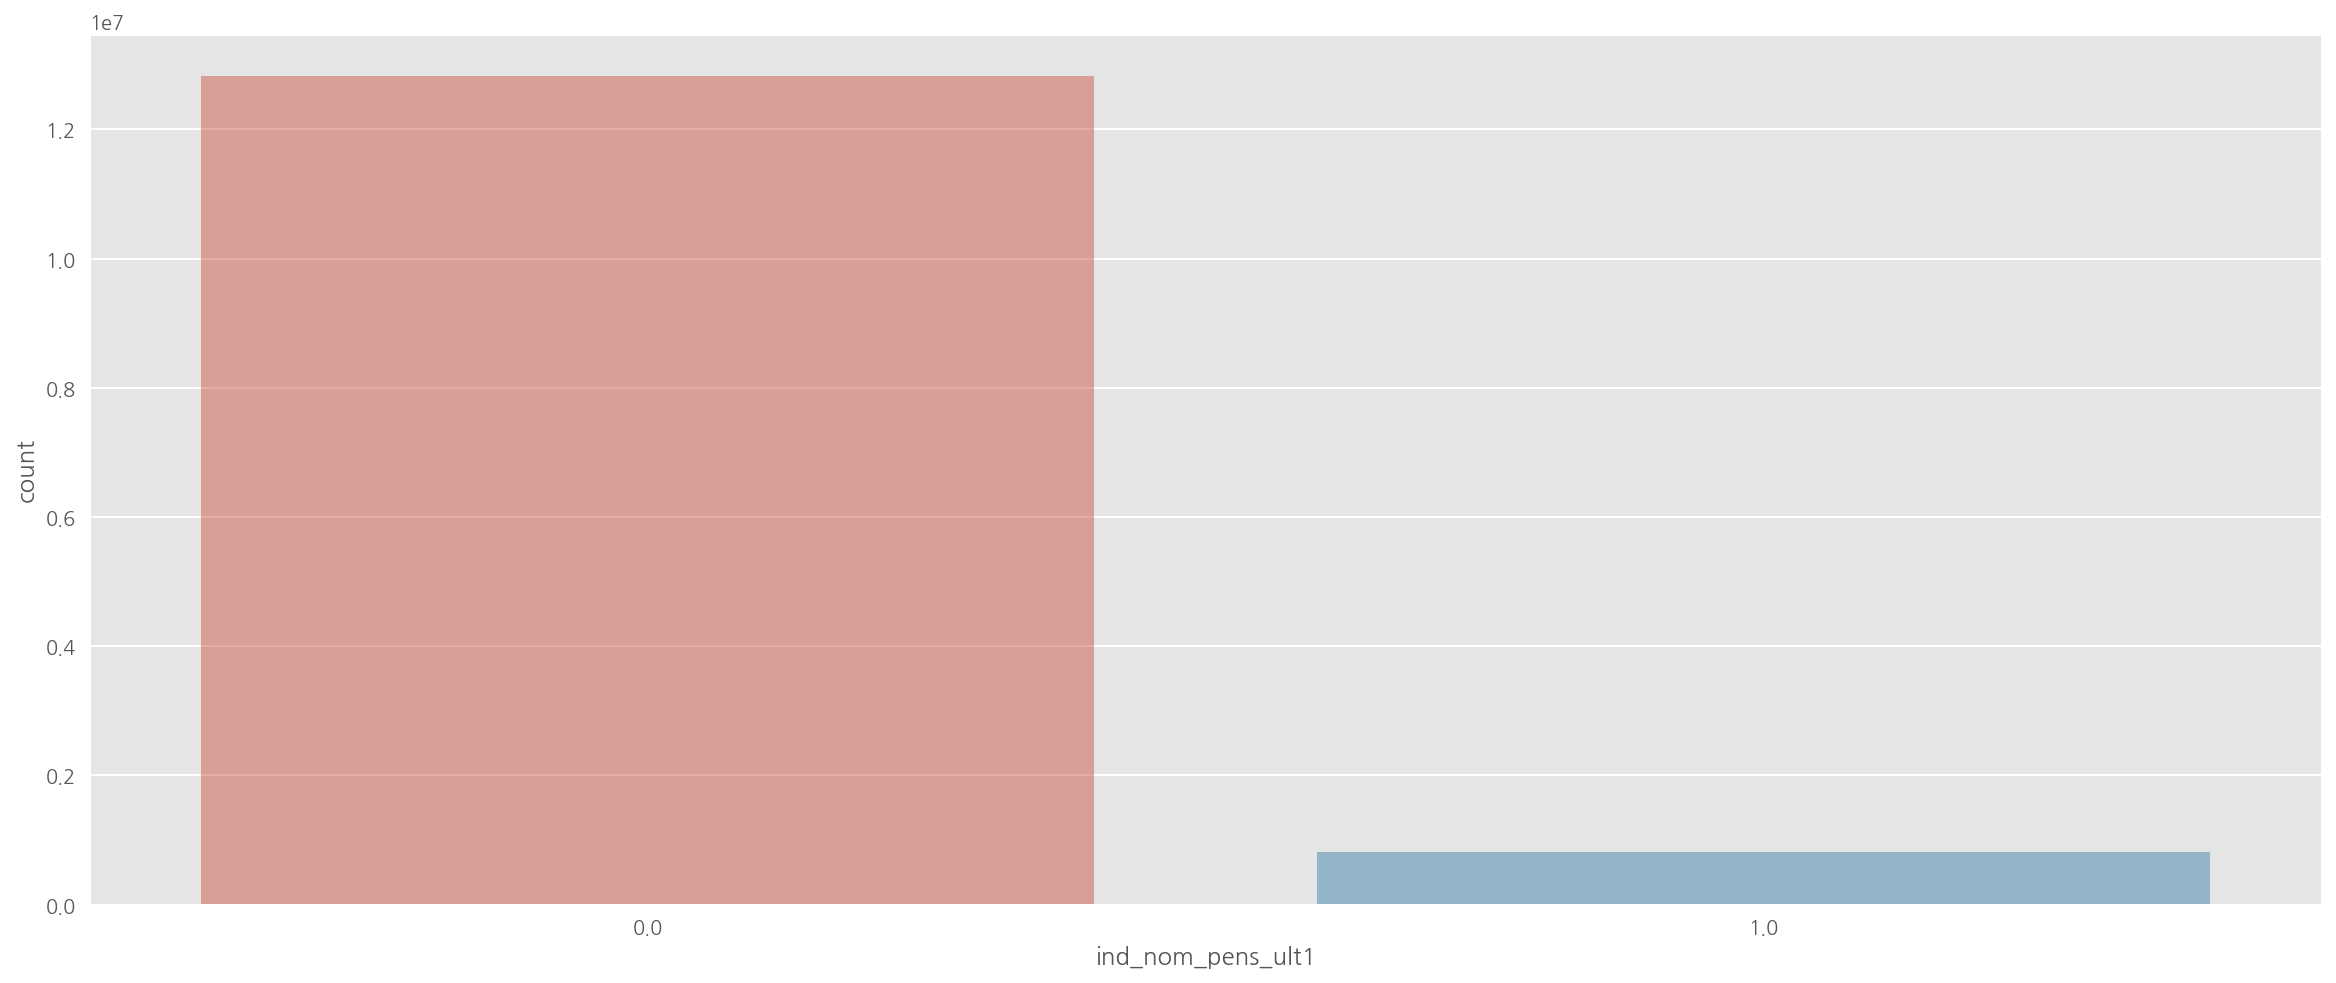

--------------------------------------------------
col :  ind_recibo_ult1


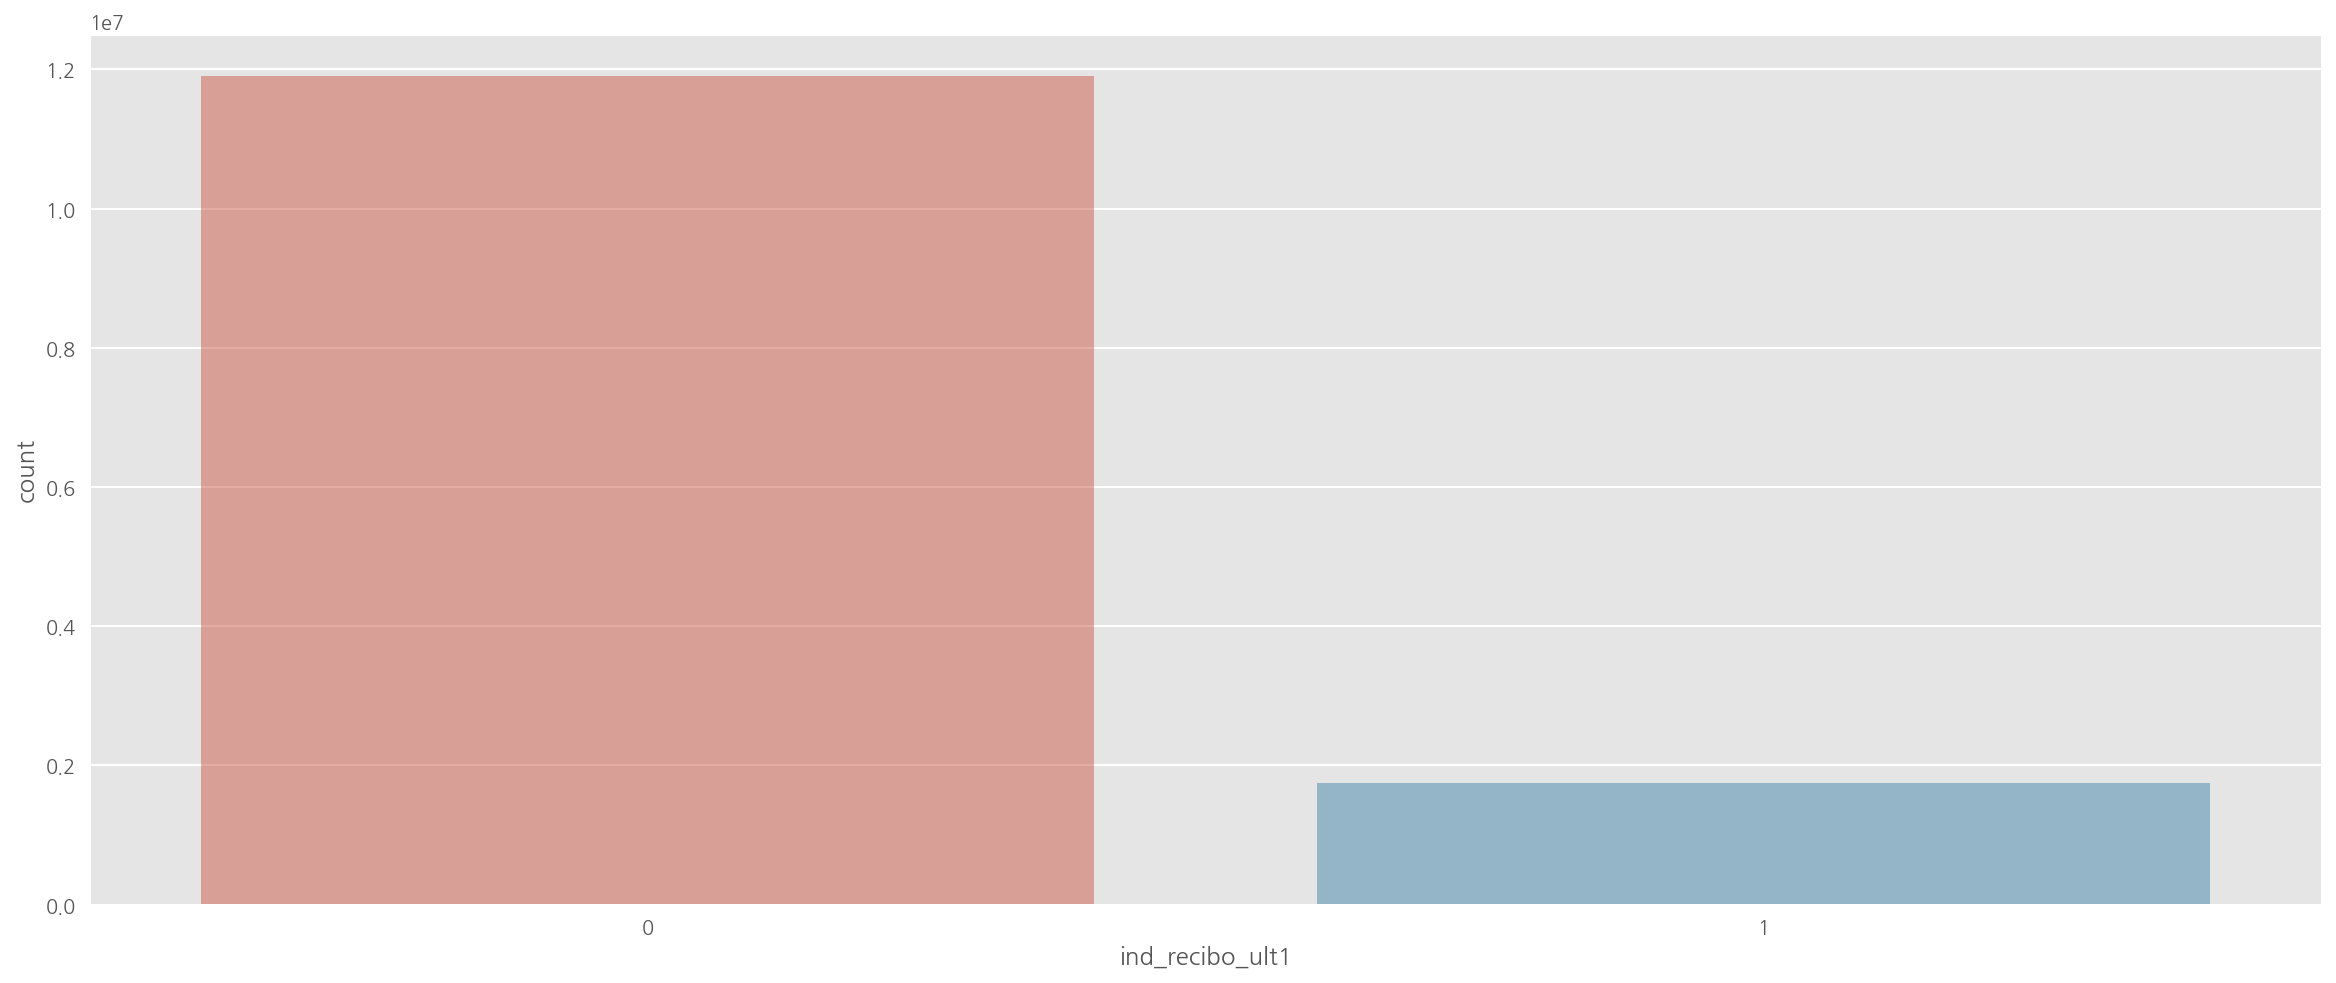

In [20]:
skip_cols = ['ncodpers','renta']  # 시간이 너무 오래걸리는 두 변수는 제외한다

for col in trn.columns:
    # skip_cols은 제외(******************** 꿀팁)
    if col in skip_cols:
    continue

    # 보기 편하게 영역 구분과 변수명을 출력한다.
    print('-'*50)
    print('col : ', col)

    # 그래프 크기를 설정한다 : 가로폭을 키워서 피처값을 잘 보이게 한다
    f, ax = plt.subplots(figsize=(20, 8))

    # seaborn을 이용하여 막대그래프를 만든다
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()

월별 금융 상품 보유 데이터를 누적 막대그래프로 시각화

In [0]:
# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터를 별도로 추출한다.
months = trn['fecha_dato'].unique().tolist()

# 제품 변수 24개를 추출한다.
label_cols = trn.columns[24:].tolist()

In [0]:
label_over_time = []
for i in range(len(label_cols)):
    # 매월 각 제품의 총합을 계산하여 label_sum에 저장한다.
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())

In [0]:
label_sum_over_time = []
for i in range(len(label_cols)):
  # 누적 막대그래프를 시각화하기 위하여 n번째 제품의 총합을 1~n번째 제품의 총합으로 만든다.
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

In [0]:
# 시각화 색깔 지정
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

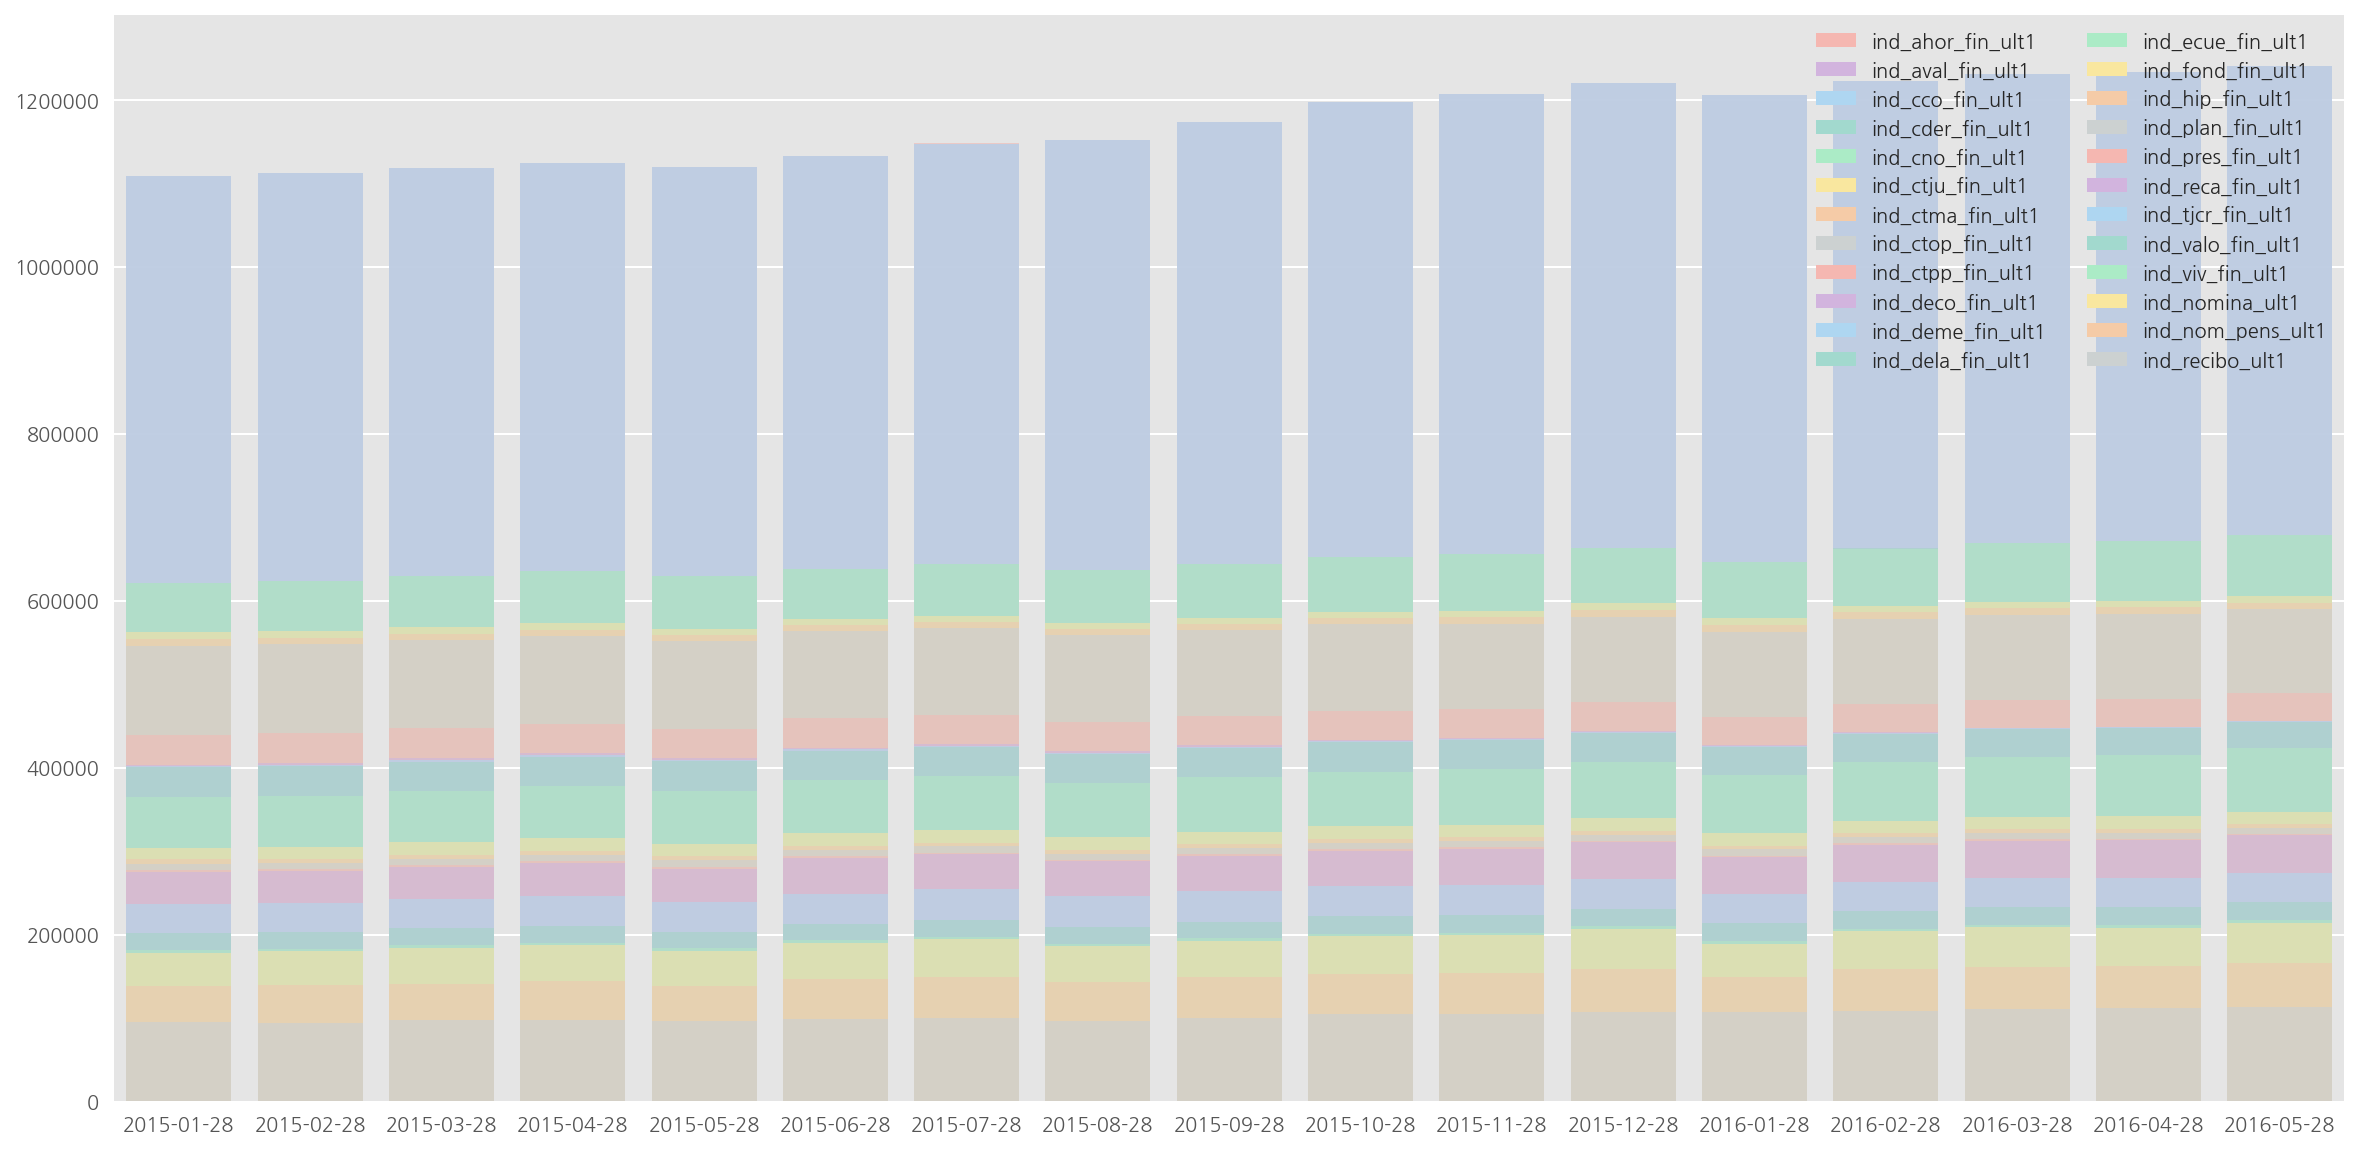

In [25]:
# 그림 크기를 사전에 정한다.
f, ax = plt.subplots(figsize=(20,10))
for i in range(len(label_cols)):
    # 24개 제품 히스토그램을 그린다. 
    # x축은 월 데이터, y축은 누적 총합, 색깔은 8개를 번갈아 사용
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)

# 우측 상단에 legend를 추가한다
plt.legend([plt.Rectangle((0,0),1,1,
                          fc=color_list[i%8],
                          edgecolor='none')
            for i in range(len(label_cols))],
           label_cols,
           loc=1,
           ncol=2,
           prop={'size':10})

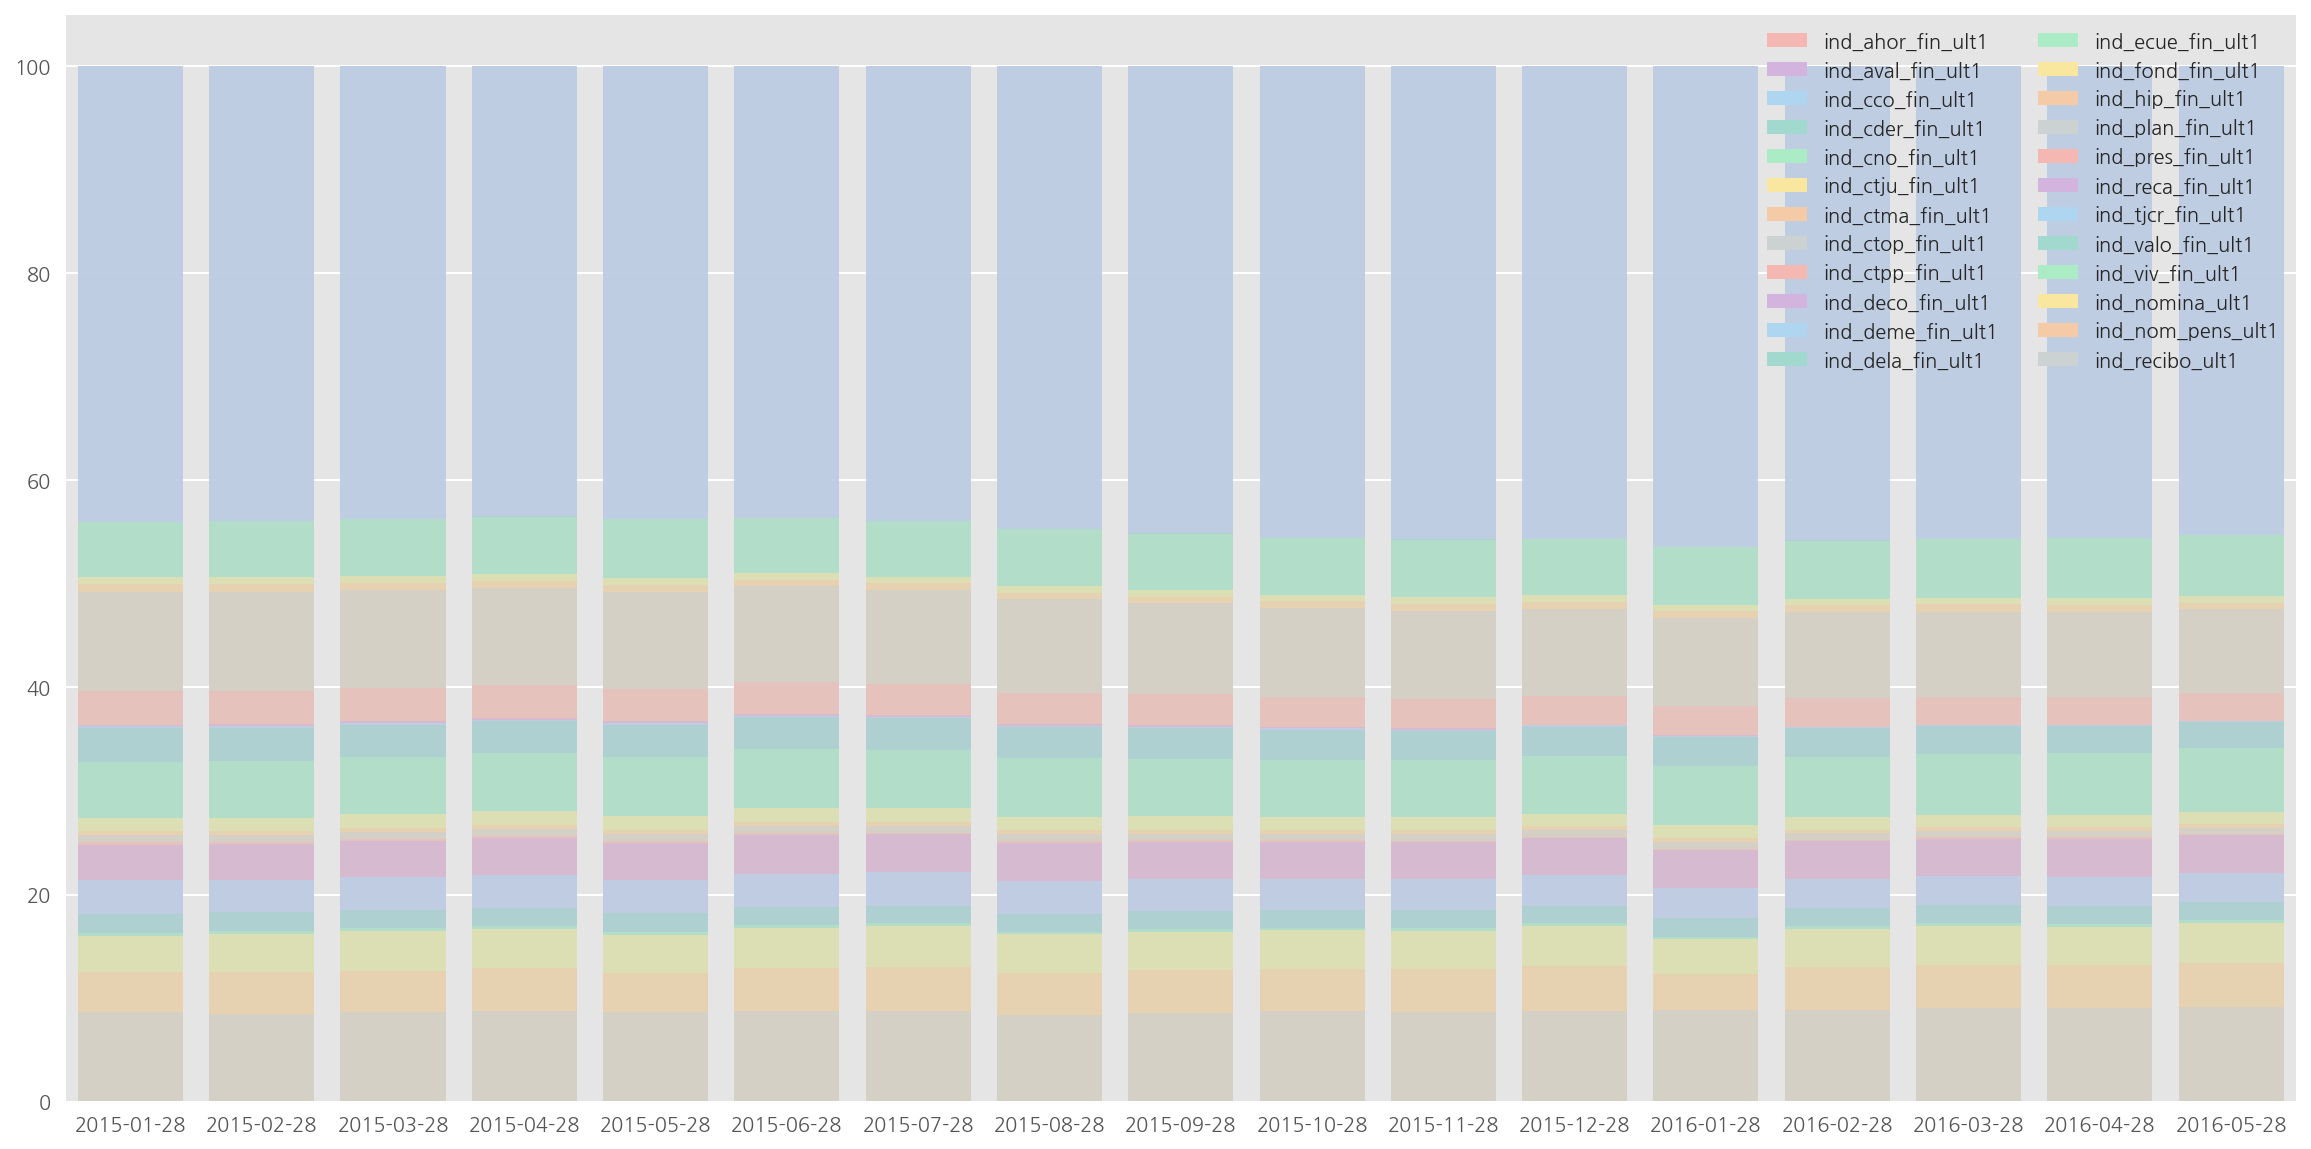

In [26]:
# 상대값으로 표현하기
# label_sum_over_time의 값을 퍼센트로 변환한다. 월마다 최댓값으로 나누고 100을 곱한다.
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

# 그림 크기를 사전에 정한다.
f, ax = plt.subplots(figsize=(20,10))
for i in range(len(label_cols)):
    # 24개 제품 히스토그램을 그린다. 
    # x축은 월 데이터, y축은 누적 총합, 색깔은 8개를 번갈아 사용
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)

# 우측 상단에 legend를 추가한다
plt.legend([plt.Rectangle((0,0),1,1,
                          fc=color_list[i%8],
                          edgecolor='none')
            for i in range(len(label_cols))],
           label_cols,
           loc=1,
           ncol=2,
           prop={'size':10})